In [1]:
import ssl

def bypass_ssl_certificates():
    ssl._create_default_https_context = ssl._create_unverified_context

bypass_ssl_certificates()

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import os
import json
import numpy as np

In [3]:
categories = ['automobile', 'beverages']
excel_folders_path = '/Users/viru/Documents/MP_I/data/excel_folders/'

In [19]:
category_brand_influencer_dict = {}

for category in categories:
    curr_category_path = os.path.join(excel_folders_path, category)
    brands_lists =  os.listdir(curr_category_path)
    brands_lists = [brand for brand in brands_lists if not brand.endswith('.xlsx') and brand != '.DS_Store']

    category_brand_influencer_dict[category] = {}

    for brand in brands_lists:
        curr_brand_path = os.path.join(curr_category_path, brand)
        curr_brand_influencers = os.listdir(curr_brand_path)
        category_brand_influencer_dict[category][brand] = curr_brand_influencers

# Save the dictionary to a JSON file
with open('/Users/viru/Documents/MP_I/data/category-brand-influencer-list.json', 'w') as json_file:
    json.dump(category_brand_influencer_dict, json_file, indent=4)

In [4]:
influencer_list = None

with open('/Users/viru/Documents/MP_I/data/category-brand-influencer-list.json', '+r') as json_file:
    influencer_list = json.load(json_file)


In [53]:
import re

new_base_path = '/Users/viru/Documents/MP_I/data/captions_folders'

def remove_hashtags_and_mentions(captions):
    cleaned_captions = []
    for caption in captions:
        if isinstance(caption, str):
            # Remove hashtags and mentions using regex
            cleaned_caption = re.sub(r'[@#]\w+', '', caption)
            # Remove extra whitespace
            cleaned_caption = ' '.join(cleaned_caption.split())
            cleaned_captions.append(cleaned_caption)
        else:
            cleaned_captions.append('')
    return cleaned_captions

for category, brands in influencer_list.items():
    print(f"Category: {category}")
    curr_category_path = os.path.join(excel_folders_path, category)

    for brand, influencers in brands.items():
        print(f"Brand: {brand}")
        curr_brand_path = os.path.join(curr_category_path, brand)

        for influencer in influencers:
            if influencer != ".DS_Store":
                print(f"Influencer: {influencer}")
                cur_influencer_path = os.path.join(curr_brand_path, influencer)
                df = pd.read_excel(cur_influencer_path)
                captions = df['caption'].iloc[:50]
                captions.fillna('', inplace=True)

                new_influencer_name = influencer.split('.xlsx')[0]

                # Create the new path preserving the directory structure
                new_category_path = os.path.join(new_base_path, category)
                new_brand_path = os.path.join(new_category_path, brand)
                new_influencer_path = os.path.join(new_brand_path, influencer)

                # Ensure the directory exists
                os.makedirs(new_brand_path, exist_ok=True)

                # Save the captions to a new file
                captions_file_path = os.path.join(new_brand_path, f"{new_influencer_name}_captions.xlsx")
                captions.to_excel(captions_file_path, index=False, header=['caption'])

                print(f"Saved captions to {captions_file_path}")

Category: automobile
Brand: skodaindia
Influencer: madhura__balaji.xlsx
Saved captions to /Users/viru/Documents/MP_I/data/captions_folders/automobile/skodaindia/madhura__balaji_captions.xlsx
Influencer: globalncap.xlsx
Saved captions to /Users/viru/Documents/MP_I/data/captions_folders/automobile/skodaindia/globalncap_captions.xlsx
Influencer: prithwi.xlsx
Saved captions to /Users/viru/Documents/MP_I/data/captions_folders/automobile/skodaindia/prithwi_captions.xlsx
Influencer: arppithaandaa.xlsx
Saved captions to /Users/viru/Documents/MP_I/data/captions_folders/automobile/skodaindia/arppithaandaa_captions.xlsx
Influencer: rachit.hirani.xlsx
Saved captions to /Users/viru/Documents/MP_I/data/captions_folders/automobile/skodaindia/rachit.hirani_captions.xlsx
Influencer: gayathryrajiv.xlsx
Saved captions to /Users/viru/Documents/MP_I/data/captions_folders/automobile/skodaindia/gayathryrajiv_captions.xlsx
Influencer: rohitmane93.xlsx
Saved captions to /Users/viru/Documents/MP_I/data/captions

In [19]:
new_base_images_folder_path = '/Users/viru/Documents/MP_I/data/image_url_folders'

for category, brands in influencer_list.items():
    print(f"Category: {category}")
    curr_category_path = os.path.join(excel_folders_path, category)

    for brand, influencers in brands.items():
        print(f"Brand: {brand}")
        curr_brand_path = os.path.join(curr_category_path, brand)

        for influencer in influencers:
            if influencer != ".DS_Store":
                print(f"Influencer: {influencer}")
                cur_influencer_path = os.path.join(curr_brand_path, influencer)
                df = pd.read_excel(cur_influencer_path)
                images_urls = df['url']

                new_influencer_name = influencer.split('.xlsx')[0]

                # Create the new path preserving the directory structure
                new_category_path = os.path.join(new_base_images_folder_path, category)
                new_brand_path = os.path.join(new_category_path, brand)
                new_influencer_path = os.path.join(new_brand_path, influencer)

                # Ensure the directory exists
                os.makedirs(new_brand_path, exist_ok=True)

                # Save the captions to a new file
                image_urls_file_path = os.path.join(new_brand_path, f"{new_influencer_name}_url.xlsx")
                images_urls.to_excel(image_urls_file_path, index=False, header=['image_urls'])

                print(f"Saved captions to {image_urls_file_path}")

Category: automobile
Brand: skodaindia
Influencer: madhura__balaji.xlsx
Saved captions to /Users/viru/Documents/MP_I/data/image_url_folders/automobile/skodaindia/madhura__balaji_url.xlsx
Influencer: globalncap.xlsx
Saved captions to /Users/viru/Documents/MP_I/data/image_url_folders/automobile/skodaindia/globalncap_url.xlsx
Influencer: prithwi.xlsx
Saved captions to /Users/viru/Documents/MP_I/data/image_url_folders/automobile/skodaindia/prithwi_url.xlsx
Influencer: arppithaandaa.xlsx
Saved captions to /Users/viru/Documents/MP_I/data/image_url_folders/automobile/skodaindia/arppithaandaa_url.xlsx
Influencer: rachit.hirani.xlsx
Saved captions to /Users/viru/Documents/MP_I/data/image_url_folders/automobile/skodaindia/rachit.hirani_url.xlsx
Influencer: gayathryrajiv.xlsx
Saved captions to /Users/viru/Documents/MP_I/data/image_url_folders/automobile/skodaindia/gayathryrajiv_url.xlsx
Influencer: rohitmane93.xlsx
Saved captions to /Users/viru/Documents/MP_I/data/image_url_folders/automobile/sko

In [5]:
automobile_imp_topics = [
    "Drive", "Car", "Adventure", "Speed", "Luxury", "Road", "Performance", "Passion", "Journey", "Automotive",
    "Life", "Style", "Explore", "Dream", "Experience", "Open", "Travel", "Classic", "Ride", "Precision",
    "Power", "Engine", "Thrill", "Custom", "Future", "Freedom", "Design", "Technology", "Lifestyle", "Elegance",
    "High", "Off-road", "Performance", "Detail", "Manual", "Built", "Electric", "Craftsmanship", "Innovation",
    "City", "Journey", "Enthusiast", "Engineering", "Powerful", "Roar", "Personal", "Fuel", "Explore", "Miles", 
    "Modern"
]

# Remove duplicates from the list
automobile_imp_topics = list(set(automobile_imp_topics))

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def extract_keywords(captions):
    # Combine all captions into a single text
    combined_text = ' '.join(captions)
    # Use CountVectorizer to extract keywords (or terms)
    vectorizer = CountVectorizer(vocabulary=automobile_imp_topics, binary=True)
    vectorizer.fit([combined_text])
    # Create a vector of keyword presence
    keywords_vector = vectorizer.transform([combined_text]).toarray()
    return keywords_vector

def compute_similarity(vector1, vector2):
    # Compute cosine similarity between two vectors
    similarity = cosine_similarity(vector1, vector2)
    return similarity[0][0]

# Path to the folder containing influencer captions
influencer_captions_path = '/Users/viru/Documents/MP_I/data/captions_folders/automobile/ashokleyland_official/frank_highway_captions.xlsx'

# Read the influencer captions
df = pd.read_excel(influencer_captions_path)
captions = df['caption'].fillna('')

# Extract keywords vector for influencer captions
influencer_keywords_vector = extract_keywords(captions)

# Create a dummy vector for important keywords (presence of all important keywords)
important_keywords_vector = [1] * len(automobile_imp_topics)
important_keywords_vector = [important_keywords_vector]

# Compute the similarity
quality_score = compute_similarity(influencer_keywords_vector, important_keywords_vector)

print(f"Quality Score: {quality_score:.2f}")

Quality Score: 0.00


/Users/viru/Documents/MP_I/.venv/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:1366: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


### **Extracting Basic Text Features**

In [4]:
def preprocess_text(caption):
    # Remove punctuation, numbers, and special characters, keeping only words
    caption = re.sub(r'[^a-zA-Z\s]', '', caption)
    # Convert to lowercase
    caption = caption.lower()
    # Remove extra whitespace
    caption = ' '.join(caption.split())
    return caption

def countWords(caption):
    wordList = caption.split(' ')
    return len(wordList)

def characterCount(caption):
    text = caption.replace(" ", "")
    characters = [char for char in text]
    return len(characters)

def sentenceCount(caption):
    # Using regular expression to split the caption into sentences
    sentences = re.split(r'[.!?]', caption)

    sentences = [sentence for sentence in sentences if sentence.strip()]

    return len(sentences)

def calculateAvgWordLen(caption):
    wordList = caption.split(' ')
    totalLen = 0
    for word in wordList:
        totalLen += len(word)
    
    return totalLen/len(wordList)

def calculateAvgSentLen(caption):
    sentences = re.split(r'[.!?]', caption)
    wps = 0
    for sentence in sentences:
        if sentence.strip():
            words = sentence.split()
            wps += len(words)
    
    return wps/len(sentences)

### **Extracting Lingustic Features**

In [15]:
import spacy

# Load the spaCy English language model
nlp = spacy.load("en_core_web_sm")

def extract_pos_tags(caption):
    # Process the caption
    doc = nlp(caption)

    # Extract the POS tags
    pos_tags = [(token.text, token.pos_) for token in doc]

    return pos_tags

def extract_named_entity(caption):
    # Process the caption
    doc = nlp(caption)

    # Extract named entities
    entities = [(ent.text, ent.label_) for ent in doc.ents]

    return entities

def rearrangePosTags(captions):
    tags = {}
    for caption in captions:
        for word, pos_tag in caption:
            if pos_tag in tags:
                tags[pos_tag] += 1
            else:
                tags[pos_tag] = 1
    
    return tags

def rearrangeNamedEntityTags(captions):
    tags = {}
    for caption in captions:
        for name, entity in caption:
            if entity in tags:
                tags[entity] += 1
            else:
                tags[entity] = 1
    
    return tags

### **Extracting Semantic Features**

### **Flesch Reading Ease Score**

This score rates text on a 100-point scale. The higher the score, the easier it is to understand the text. For example:

90-100: Easily understandable by an average 11-year-old student.

60-70: Easily understandable by 13-15-year-old students.

0-30: Best understood by university graduates.

The formula for the Flesch Reading Ease score is:

206.835 − 1.015 * ( total sentences / total words ) * −84.6 * ( total words / total syllables )

-----

### **Flesch-Kincaid Grade Level**

This score translates the 0-100 scale into a U.S. school grade level, making it easier for teachers, parents, librarians, and others to judge the readability level of various books and texts. For example:

5.0: Easily understood by 5th graders. 

10.0: Easily understood by 10th graders.

12.0: Easily understood by 12th graders (high school seniors).

The formula for the Flesch-Kincaid Grade Level is:

0.39 * ( total words / total sentences ) + 11.8 *( total syllables / total words ) − 15.59

In [3]:
import textstat
from textblob import TextBlob
from collections import Counter
from textblob import TextBlob
import numpy as np

def calculate_sentiment(captions):
    scores = []
    for caption in captions:
        blob = TextBlob(caption)
        sentiment = blob.sentiment.polarity
        # Normalize sentiment score from range [-1, 1] to [0, 1]
        normalized_sentiment = (sentiment + 1) / 2
        scores.append(normalized_sentiment)
    
    normalized_score = np.mean(scores)
    return normalized_score

def calculate_subjectivity(caption):
    blob = TextBlob(caption)
    subjectivity_scores = blob.sentiment.subjectivity

    return subjectivity_scores

def calculate_readability_scores(captions):
    readability_scores = []
    for caption in captions:
        reading_ease = textstat.flesch_reading_ease(caption)

        # Ensure scores are within the 0-100 range
        if reading_ease < 0:
            reading_ease = 0
        elif reading_ease > 100:
            reading_ease = 100

        # Normalize the readability score to 0-1 range
        normalized_reading_ease = reading_ease / 100
        readability_scores.append(normalized_reading_ease)

    reading_ease_score_mean = np.mean(readability_scores)
        
    return reading_ease_score_mean

def calculate_lexical_diversity(captions):
    scores = []
    for caption in captions:
        tokens = caption.split()
        num_tokens = len(tokens)
        num_types = len(set(tokens))
        ttr = num_types / num_tokens if num_tokens != 0 else 0
        scores.append(ttr)
    
    score = np.mean(scores)

    return score

# Function to calculate overall quality score
def calculate_overall_quality(readability, lexical_diversity, sentiment, weights=(0.4, 0.3, 0.3)):
    readability_weight, lexical_diversity_weight, sentiment_weight = weights
    overall_score = (
        readability_weight * readability +
        lexical_diversity_weight * lexical_diversity +
        sentiment_weight * sentiment
    )
    return overall_score

def get_overall_captions_quality(captions):
    # Calculate overall quality scores for each caption
    overall_quality_scores = calculate_overall_quality(calculate_readability_scores(captions), calculate_lexical_diversity(captions), calculate_sentiment(captions))

    # Calculate the final overall quality score for the influencer
    final_overall_quality_score = np.mean(overall_quality_scores)

    return final_overall_quality_score

### **Main Code**

In [38]:

import re
import os
import numpy as np

basic_features = []

categories = [
    'Automobile',
    'Beverages',
    'Clothing',
    'Electronics',
    'Entertainment',
    'Food',
    'Jewellery',
    'Makeup',
    'Non-profit',
    'Shoes',
]
quadrant = [
    'HF-HE',
    'HF-LE',
    'LF-HE',
    'LF-LE',
]
for category in categories:
    for quad in quadrant: 

        caption_folder_path = f'D://Study//Project//Major project//{category}//{category}_{quad}_captions.xlsx'

        df = pd.read_excel(caption_folder_path)

        preprocessedCaptions = df['Captions'].apply(preprocess_text)

        # COUNT NUMBER OF WORDS IN CAPTIONS
        captionsWords = preprocessedCaptions.apply(countWords)

        # COUNT NUMBER OF CHARACTERS IN CAPTIONS
        captionsChars = preprocessedCaptions.apply(characterCount)

        # COUNT NUMBER OF SENTENCES IN CAPTIONS
        sentCount =  df['Captions'].apply(sentenceCount)

        # COUNT AVERAGE WORD LENGTHS
        averageWordLen = preprocessedCaptions.apply(calculateAvgWordLen)

        # COUNT AVERAGE SENTENCE LENGTH --> NUMBER OF WORD PER SENTENCE
        averageSentLen = df['Captions'].apply(calculateAvgSentLen)

        # EXTRACT THE POS TAGS
        pos_tags = df['Captions'].apply(extract_pos_tags)

        # EXTRACT NAME-ENTITY
        named_entity_tags = preprocessedCaptions.apply(extract_named_entity)

        top_50_cap_pos_tags = rearrangePosTags(pos_tags)
        top_50_cap_named_entity_tags = rearrangeNamedEntityTags(named_entity_tags)

        subjectivity_score = df['Captions'].apply(calculate_subjectivity)

        avgCapWords = captionsWords.mean()
        avgCapChar = captionsChars.mean()
        avgCapSentCount = sentCount.mean()
        avgCapAvgWordLen = averageWordLen.mean()
        avgCapAvgSentLen = averageSentLen.mean()
        avgCapSubjScore = subjectivity_score.mean()

        read_ease_score = calculate_readability_scores(list(df['Captions']))
        lexical_diversity_score = calculate_lexical_diversity(list(df['Captions']))
        sentiment_score = calculate_sentiment(list(df['Captions']))
        overall_score = get_overall_captions_quality(list(df['Captions']))

        curr = {
            'Quadrant': quad,
            'Category': category,
            'read_ease_score': read_ease_score,
            'lexical_diversity_score': lexical_diversity_score,
            'sentiment_score': sentiment_score,
            'overall_caption_score': overall_score,
            'Average Words': avgCapWords,
            'Average Characters': avgCapChar,
            'Average Sentence Count': avgCapSentCount,
            'Average Word Length': avgCapAvgWordLen,
            'Average Sentence Length': avgCapAvgSentLen,
            'Top 50 Captions Pos Tags': top_50_cap_pos_tags,
            'Top 50 Captions Named Entity Tags': top_50_cap_named_entity_tags,
            'Average Subjectivity Score': avgCapSubjScore
        }

        basic_features.append(curr)

In [39]:
basic_features

[{'Quadrant': 'HF-HE',
  'Category': 'Automobile',
  'read_ease_score': 0.42440506329113925,
  'lexical_diversity_score': 0.9253217654966442,
  'sentiment_score': 0.6294010046739478,
  'overall_caption_score': 0.6361788563676333,
  'Average Words': 42.962025316455694,
  'Average Characters': 260.55696202531647,
  'Average Sentence Count': 3.8354430379746836,
  'Average Word Length': 6.093637467289976,
  'Average Sentence Length': 12.119181872979341,
  'Top 50 Captions Pos Tags': {'VERB': 373,
   'ADP': 366,
   'DET': 286,
   'PROPN': 671,
   'CCONJ': 85,
   'PUNCT': 467,
   'NOUN': 925,
   'SPACE': 261,
   'ADJ': 246,
   'PRON': 250,
   'PART': 74,
   'ADV': 111,
   'SYM': 410,
   'X': 84,
   'AUX': 119,
   'NUM': 71,
   'SCONJ': 24,
   'INTJ': 1},
  'Top 50 Captions Named Entity Tags': {'ORDINAL': 7,
   'FAC': 4,
   'GPE': 14,
   'PERSON': 30,
   'NORP': 7,
   'LAW': 3,
   'ORG': 30,
   'DATE': 28,
   'TIME': 2,
   'CARDINAL': 10,
   'QUANTITY': 1},
  'Average Subjectivity Score': 0.4

In [40]:
caption_quality_score_df2 = pd.DataFrame(basic_features)
caption_quality_score_df2.head()

Quadrant    Category  read_ease_score  lexical_diversity_score  \
0    HF-HE  Automobile         0.424405                 0.925322   
1    HF-LE  Automobile         0.396859                 0.904362   
2    LF-HE  Automobile         0.404425                 0.903097   
3    LF-LE  Automobile         0.308361                 0.909704   
4    HF-HE   Beverages         0.507616                 0.888605   

   sentiment_score  overall_caption_score  Average Words  Average Characters  \
0         0.629401               0.636179      42.962025          260.556962   
1         0.617686               0.615358      47.381503          301.008092   
2         0.634299               0.622988      43.780242          270.647177   
3         0.644645               0.589649      56.454545          392.242424   
4         0.626349               0.657533      43.834171          250.306533   

   Average Sentence Count  Average Word Length  Average Sentence Length  \
0                3.835443             6.093637                12.119182   
1                4.271676             6.607730                11.376014   
2                4.409274             6.636256                 9.738362   
3                4.666667             7.014457                12.313069   
4                4.321608             6.011408                10.637742   

                            Top 50 Captions Pos Tags  \
0  {'VERB': 373, 'ADP': 366, 'DET': 286, 'PROPN':...   
1  {'NOUN': 11352, 'PART': 804, 'VERB': 4637, 'AD...   
2  {'PROPN': 4320, 'VERB': 2528, 'PRON': 1522, 'A...   
3  {'VERB': 246, 'ADP': 202, 'NOUN': 542, 'PUNCT'...   
4  {'PRON': 658, 'ADJ': 596, 'NOUN': 2301, 'PUNCT...   

                   Top 50 Captions Named Entity Tags  \
0  {'ORDINAL': 7, 'FAC': 4, 'GPE': 14, 'PERSON': ...   
1  {'NORP': 95, 'DATE': 374, 'PERSON': 532, 'ORG'...   
2  {'GPE': 156, 'DATE': 201, 'TIME': 32, 'ORG': 1...   
3  {'LOC': 3, 'ORG': 20, 'DATE': 15, 'PERSON': 25...   
4  {'CARDINAL': 25, 'ORG': 92, 'TIME': 10, 'DATE'...   

   Average Subjectivity Score  
0                    0.470428  
1                    0.433823  
2                    0.472685  
3                    0.453800  
4                    0.479975

In [41]:
caption_quality_score_df2.shape

(40, 14)

In [42]:
caption_quality_score_df2.to_excel('Engagement_caption_analysis_newest.xlsx', index=False)

In [8]:
df2 = pd.read_excel('/Users/viru/Documents/MP_I/data/caption_quality_scores_df2.xlsx')
automobile_engagement_df = pd.read_excel("/Users/viru/Documents/MP_I/data/Engagement_automobile.xlsx")
beverage_engagement_df = pd.read_excel("/Users/viru/Documents/MP_I/data/Final_engagement_Beverages.xlsx")

In [9]:
automobile_engagement_df.head()

Influencers    1D    2D    3D    4D    5D    6D    7D   Likes  \
0        littleshilpa   2.0   2.0   2.0   2.0   2.0   2.0   2.0   586.0   
1        sk_rendition   9.0   9.0  11.0  11.0  11.0  11.0  11.0   448.0   
2  stokpalaceheritage   0.0   0.0   1.0   1.0   1.0   1.0   1.0   911.0   
3    wheels_and_vibes  10.0  10.0  10.0  10.0  10.0  10.0  10.0  7303.0   
4          NHSwebsite   8.0  13.0  14.0  14.0  14.0  14.0  14.0  6882.0   

   Followers  ...  Unnamed: 14  Unnamed: 15  Unnamed: 16  Unnamed: 17  \
0       5002  ...     0.117553     0.117553     0.117553          NaN   
1       5005  ...     0.091708     0.091708     0.091708          NaN   
2       5023  ...     0.181565     0.181565     0.181565          NaN   
3       5028  ...     1.454455     1.454455     1.454455          NaN   
4       5030  ...     1.370974     1.370974     1.370974     0.435569   

   Unnamed: 18  Unnamed: 19  Unnamed: 20  Unnamed: 21  Unnamed: 22  \
0          NaN          NaN          NaN          NaN          NaN   
1          NaN          NaN          NaN          NaN          NaN   
2          NaN          NaN          NaN          NaN          NaN   
3          NaN          NaN          NaN          NaN          NaN   
4     0.435698     0.435753     0.435785     0.435812      0.43583   

   Unnamed: 23  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4     0.435846  

[5 rows x 24 columns]

In [10]:
beverage_engagement_df.head()

Influencers        1D        2D        3D        4D        5D  \
0          ziglyforpets  0.000176  0.001492  0.002165  0.002370  0.002399   
1  aestheticswithpalkin  0.000316  0.001158  0.001896  0.004054  0.004791   
2       learningthrufun  0.000769  0.002380  0.003248  0.004933  0.005751   
3     the_petuk_bangali  0.000159  0.000752  0.001027  0.001157  0.001200   
4   barbiesbakeboutique  0.006909  0.011870  0.014409  0.020964  0.034310   

         6D        7D        Delta  
0  0.002487  0.003394  1833.333333  
1  0.005213  0.005529  1650.000000  
2  0.006768  0.008230   970.967742  
3  0.001302  0.001678   954.545455  
4  0.043935  0.050313   628.205128

In [11]:
beverage_engagement_df['1D'].isna().sum()

0

In [12]:
df2['engagement'] = pd.NA

for index, row in df2.iterrows():
    cur_influencer = row['influencer']

    auto_eng = automobile_engagement_df[automobile_engagement_df['Influencers'] == cur_influencer]['1D']
    bev_eng = beverage_engagement_df[beverage_engagement_df['Influencers'] == cur_influencer]['1D']
    
    if not auto_eng.empty:
        df2.at[index, 'engagement'] = auto_eng.values[0]
    elif not bev_eng.empty:
        df2.at[index, 'engagement'] = bev_eng.values[0]
    else:
        df2.at[index, 'engagement'] = pd.NA

In [13]:
df2['engagement'].isna().sum()

19

**Handling the Missing Engagement Rates of the Influencers**

In [14]:
# Calculate the mean engagement for the 'automobile' category
mean_engagement = df2[df2['category'] == 'automobile']['engagement'].mean()

# Create a mask to filter the rows where category is 'automobile' and engagement is missing
mask = (df2['category'] == 'automobile') & (df2['engagement'].isna())

# Fill the missing values in the engagement column for the 'automobile' category with the mean engagement
df2.loc[mask, 'engagement'] = mean_engagement

In [15]:
# Calculate the mean engagement for the 'automobile' category
mean_engagement = df2[df2['category'] == 'beverages']['engagement'].mean()

# Create a mask to filter the rows where category is 'automobile' and engagement is missing
mask = (df2['category'] == 'beverages') & (df2['engagement'].isna())

# Fill the missing values in the engagement column for the 'automobile' category with the mean engagement
df2.loc[mask, 'engagement'] = mean_engagement

In [16]:
# Automobile
auto_lower_engagement = df2[df2['category'] == 'automobile']['engagement'].quantile(0.25)
auto_higher_engagement = df2[df2['category'] == 'automobile']['engagement'].quantile(0.75)

auto_lower_engagement_df = df2[(df2['category'] == 'automobile') & (df2['engagement'] <= auto_lower_engagement)]
auto_higher_engagement_df = df2[(df2['category'] == 'automobile') & (df2['engagement'] >= auto_higher_engagement)]

print("Lower Engagements shape:", auto_lower_engagement_df.shape)
print("Higher Engagements shape:", auto_higher_engagement_df.shape)

Lower Engagements shape: (79, 17)
Higher Engagements shape: (79, 17)


In [17]:
import matplotlib.pyplot as plt

def plot_features_vs_engagement(df, features):
    for feature in features:
        plt.figure(figsize=(10, 6))
        plt.scatter(df[feature], df['engagement'], alpha=0.5)
        plt.title(f'{feature} vs Engagement')
        plt.xlabel(feature)
        plt.ylabel('Engagement')
        plt.grid(True)
        plt.show()


In [18]:
# Extracted features from captions
features = ['read_ease_score',
       'lexical_diversity_score', 'sentiment_score',
       'overall_caption_score', 'Average Words', 'Average Characters',
       'Average Sentence Count', 'Average Word Length',
       'Average Sentence Length', 'Average Subjectivity Score']

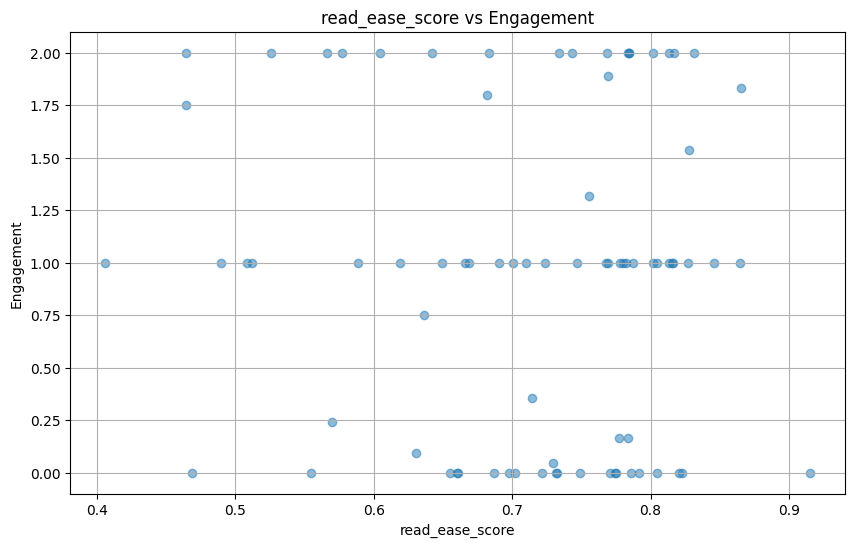

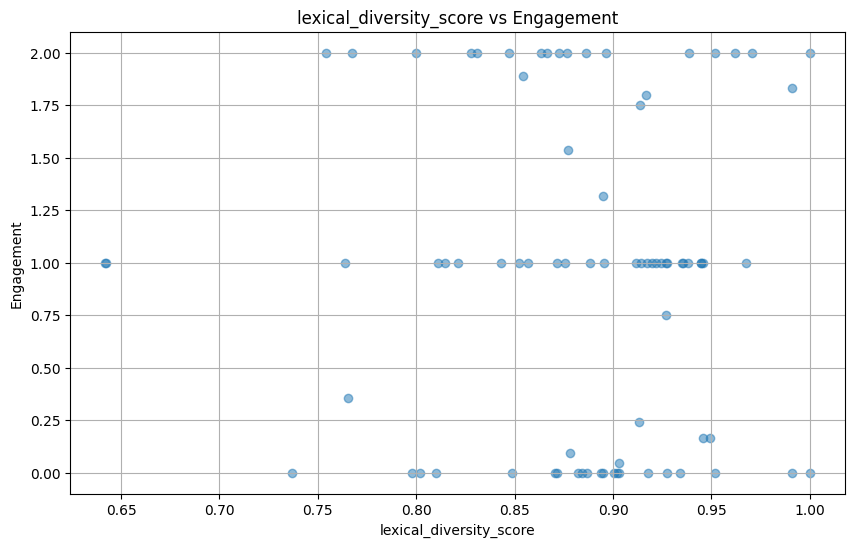

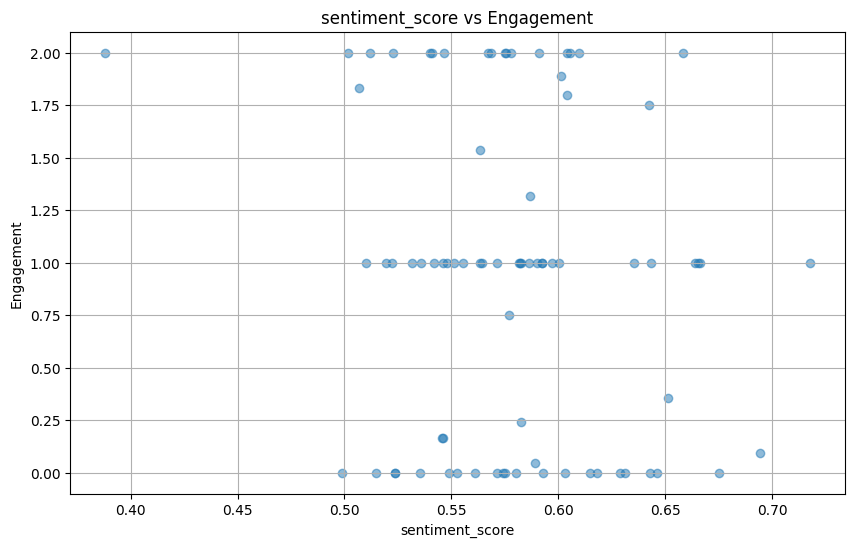

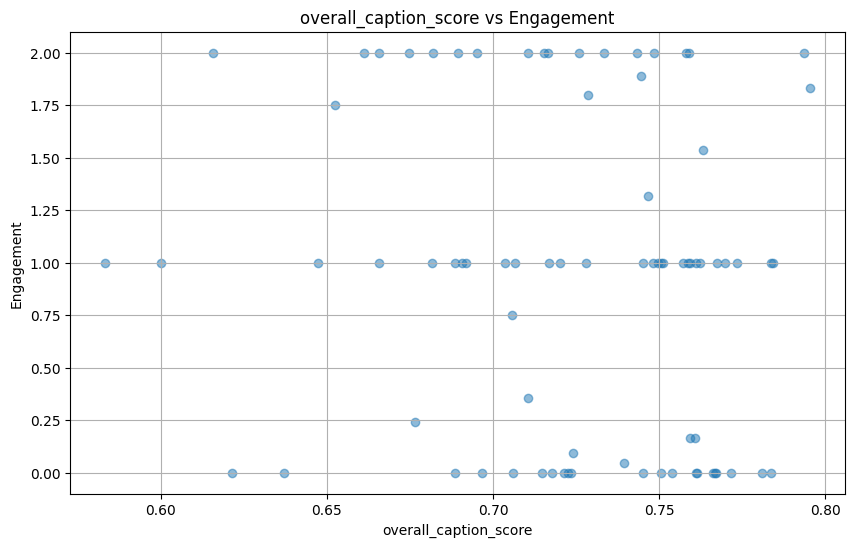

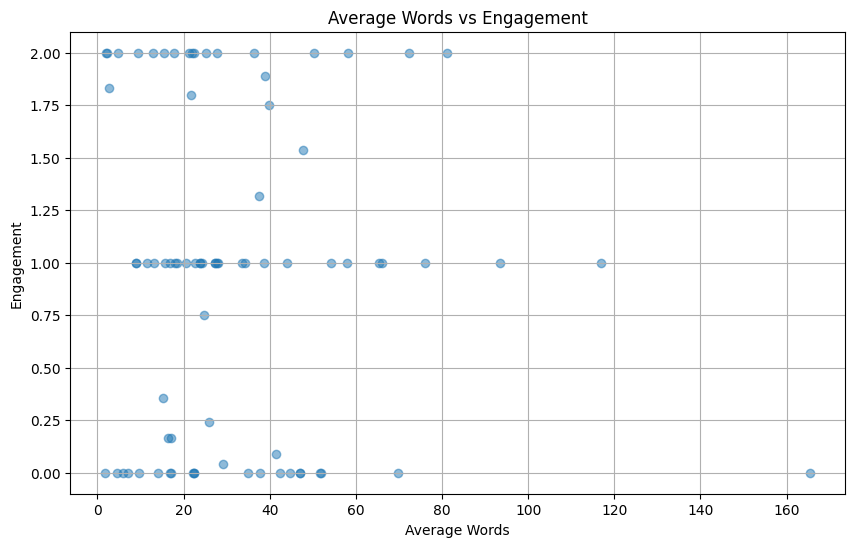

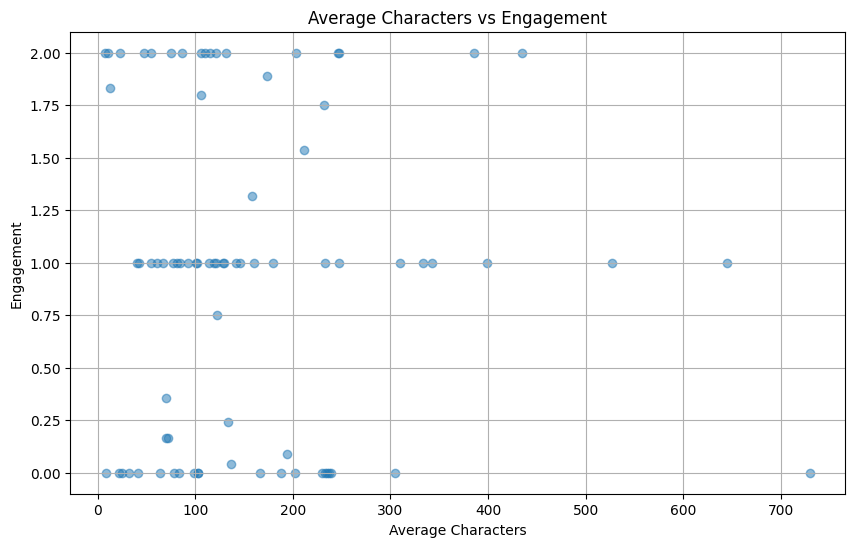

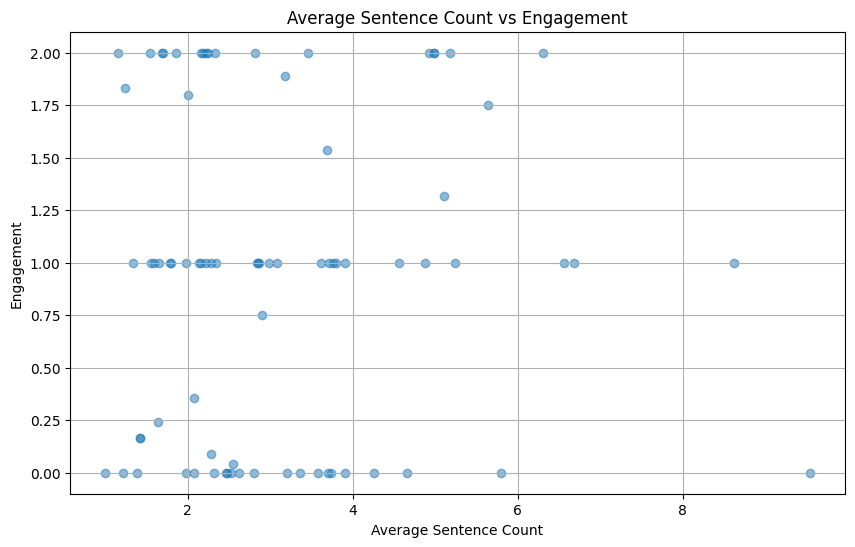

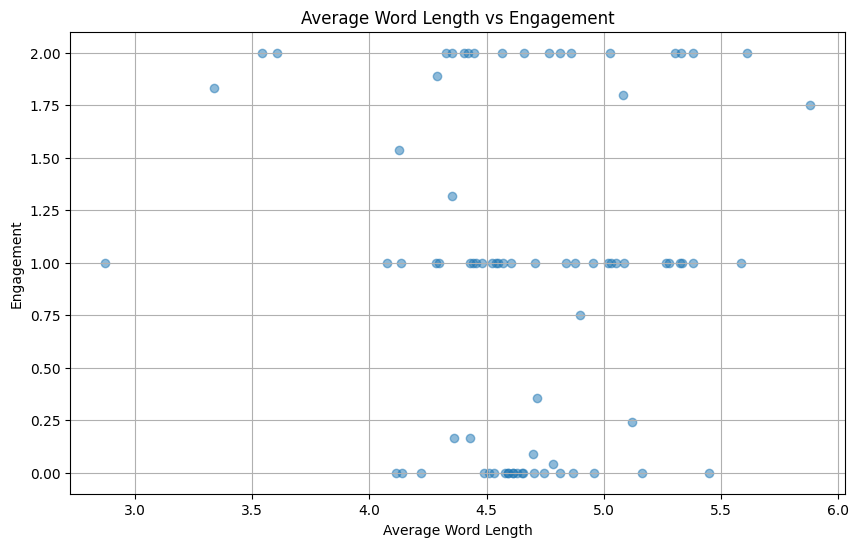

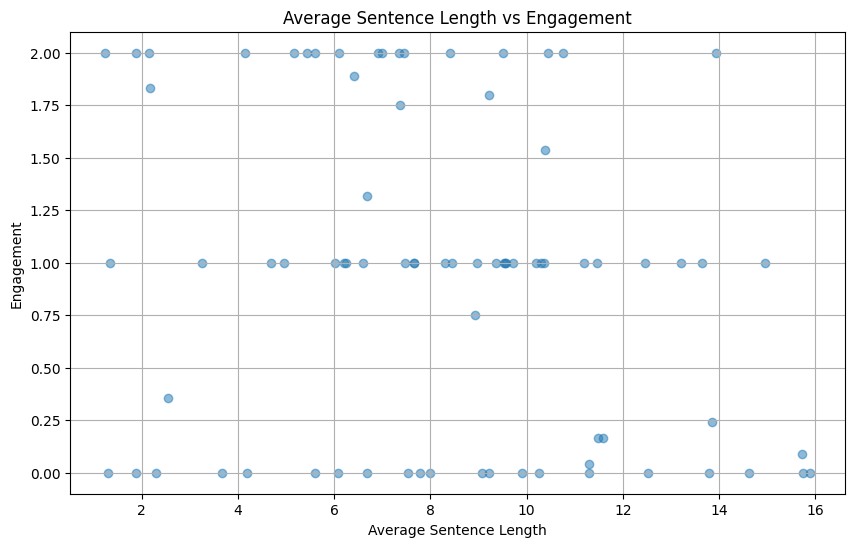

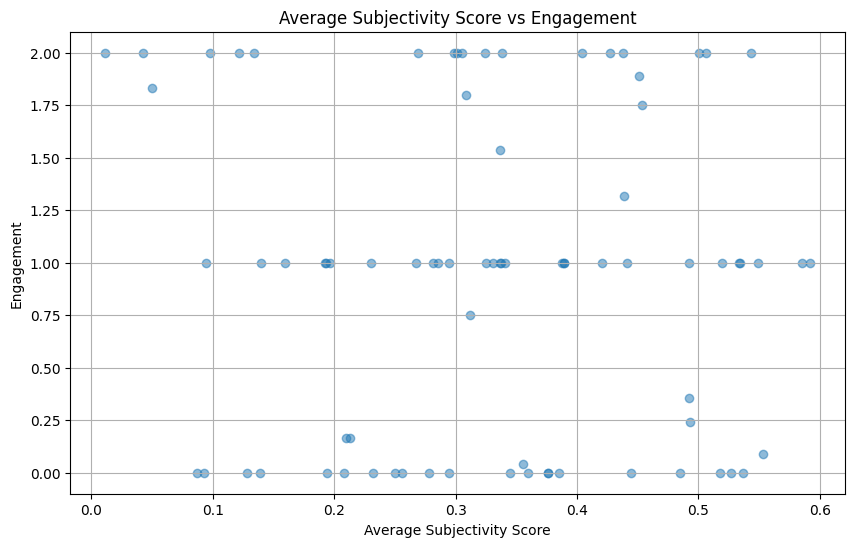

In [19]:
# For lower engagements rates
plot_features_vs_engagement(auto_lower_engagement_df, features)

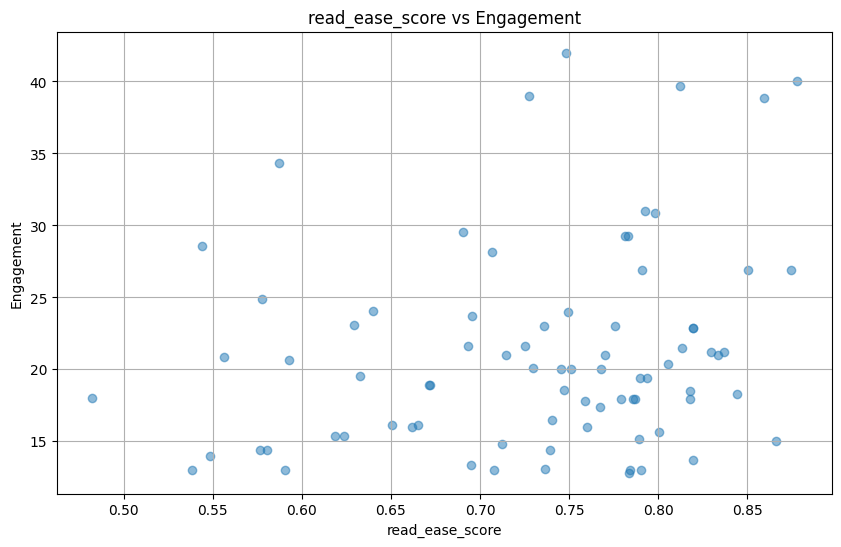

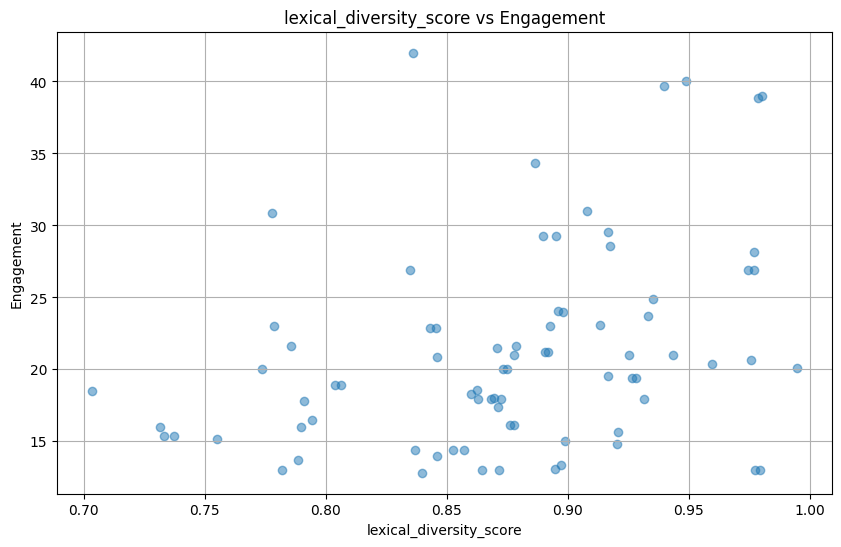

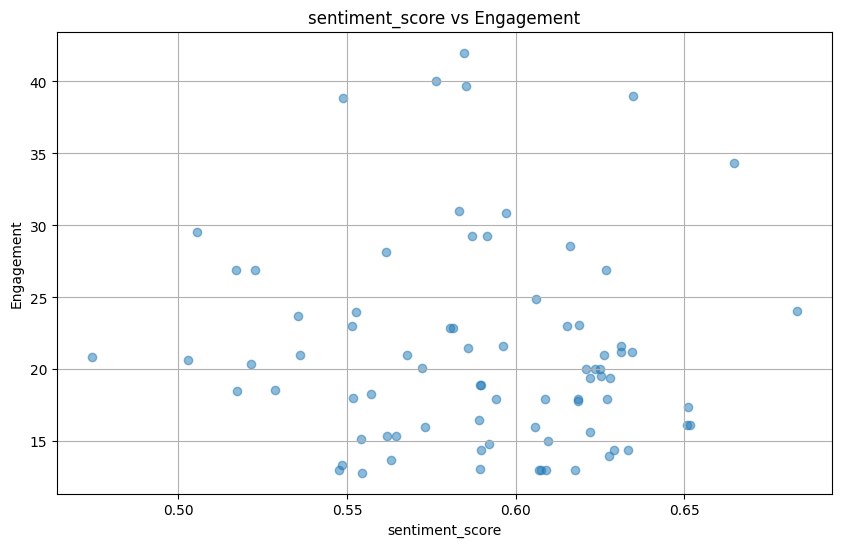

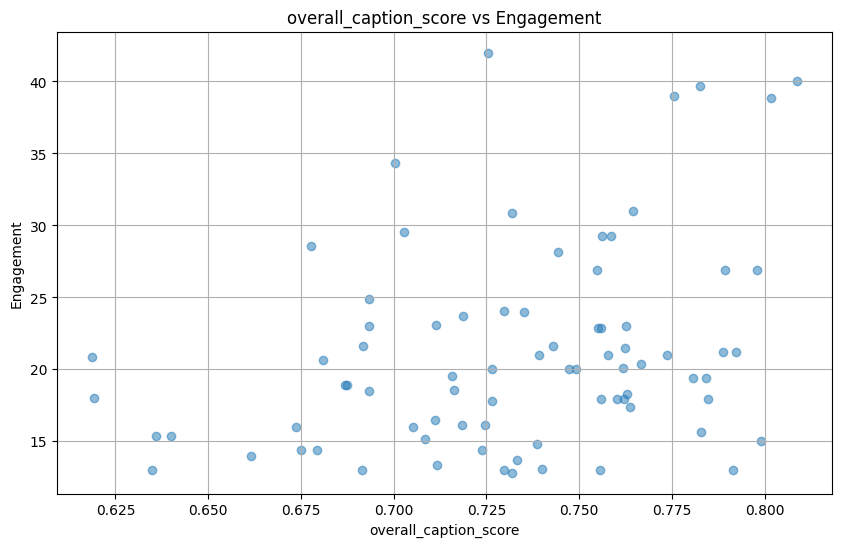

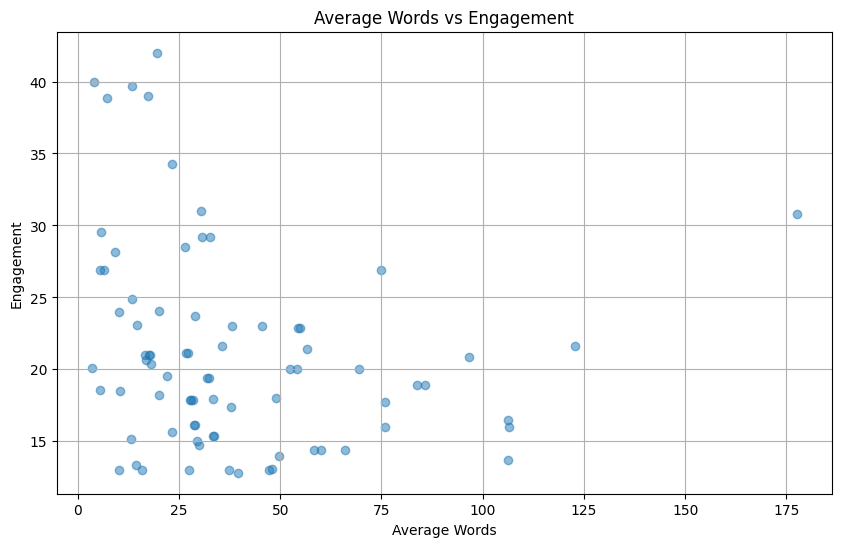

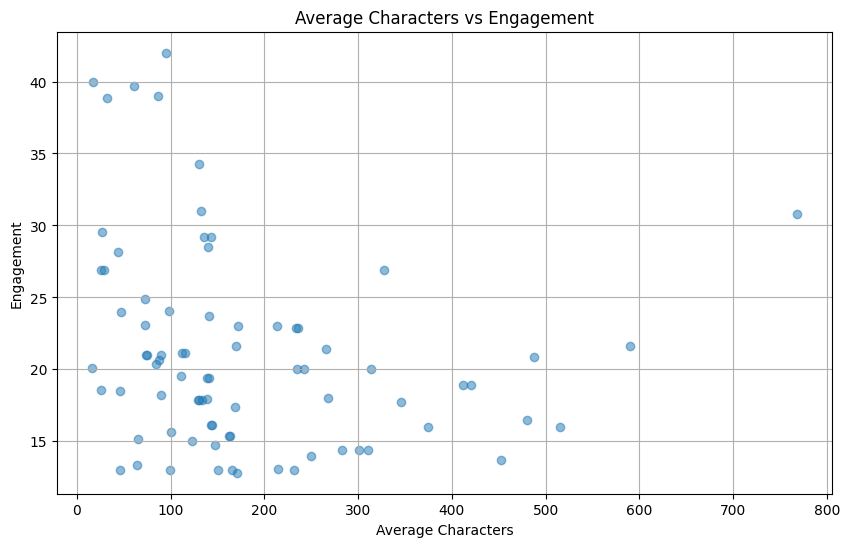

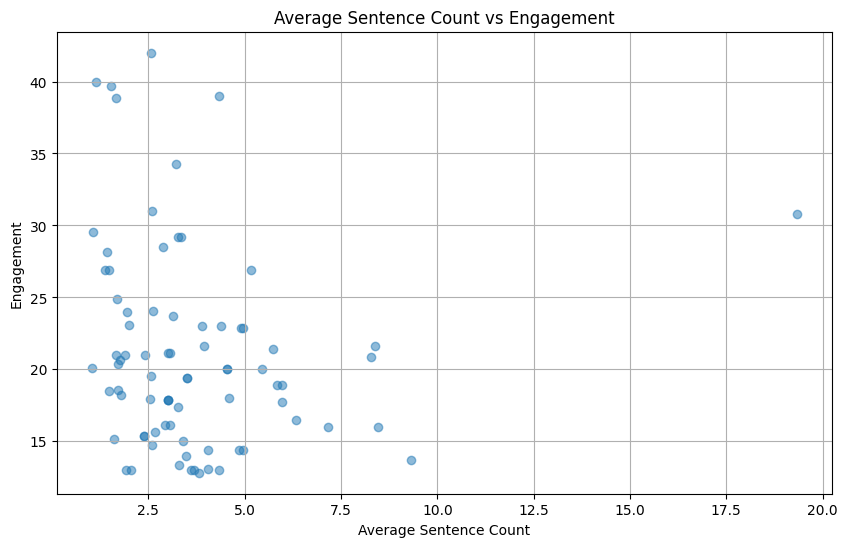

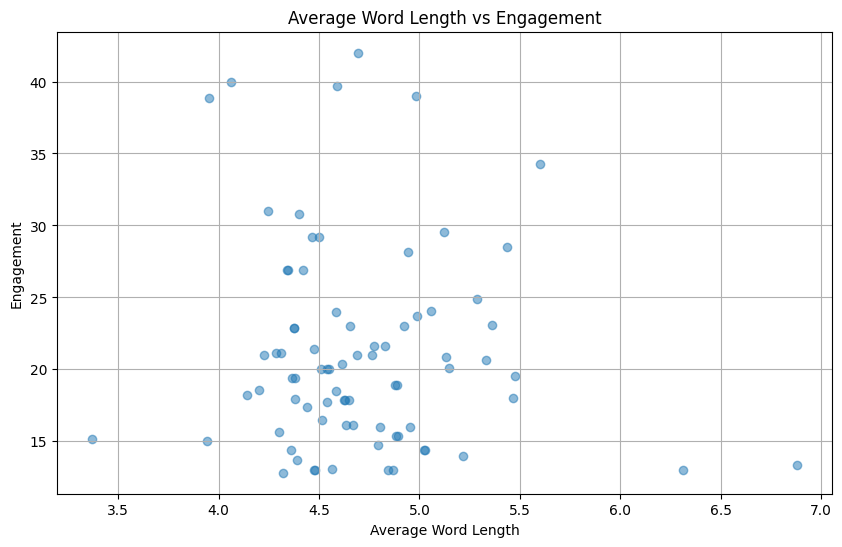

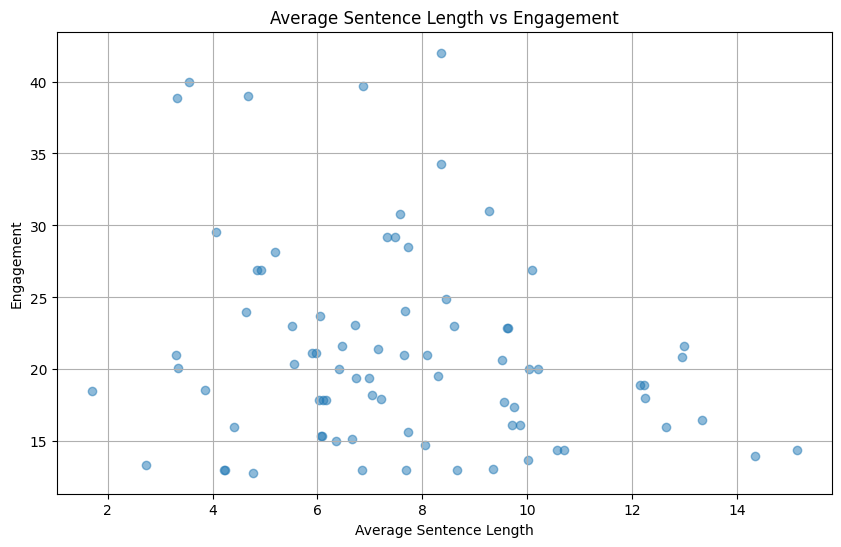

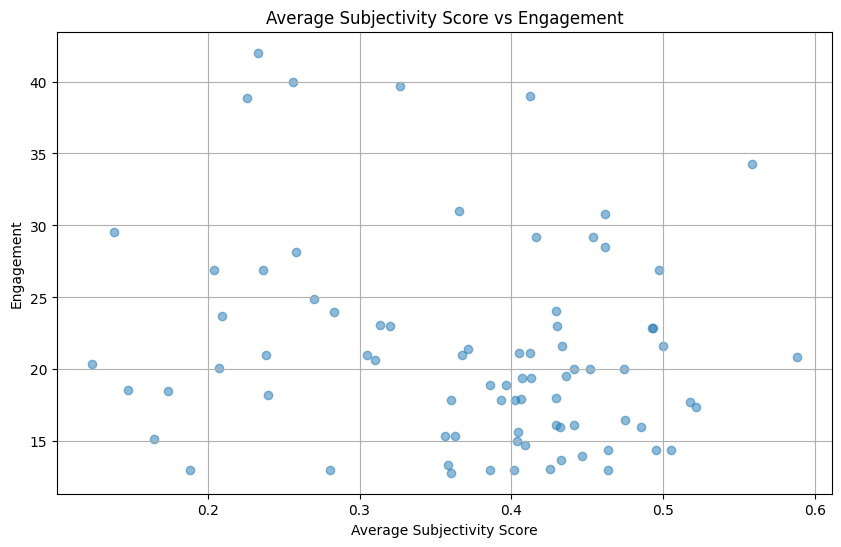

In [20]:
# For higher engagements rates
plot_features_vs_engagement(auto_higher_engagement_df, features)

In [21]:
# Beverages
bev_lower_engagement = df2[df2['category'] == 'beverages']['engagement'].quantile(0.25)
bev_higher_engagement = df2[df2['category'] == 'beverages']['engagement'].quantile(0.75)

bev_lower_engagement_df = df2[(df2['category'] == 'beverages') & (df2['engagement'] <= bev_lower_engagement)]
bev_higher_engagement_df = df2[(df2['category'] == 'beverages') & (df2['engagement'] >= bev_higher_engagement)]

print("Lower Engagements shape:", bev_lower_engagement_df.shape)
print("Higher Engagements shape:", bev_higher_engagement_df.shape)

Lower Engagements shape: (66, 17)
Higher Engagements shape: (66, 17)


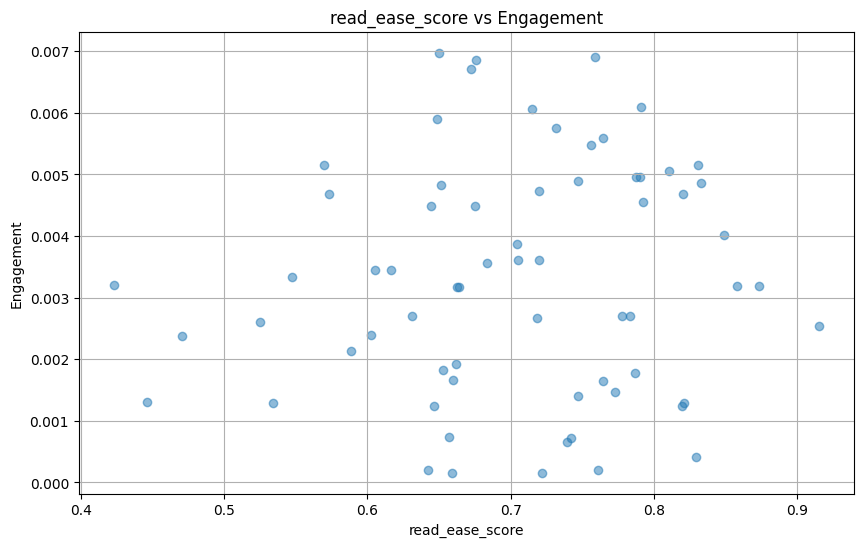

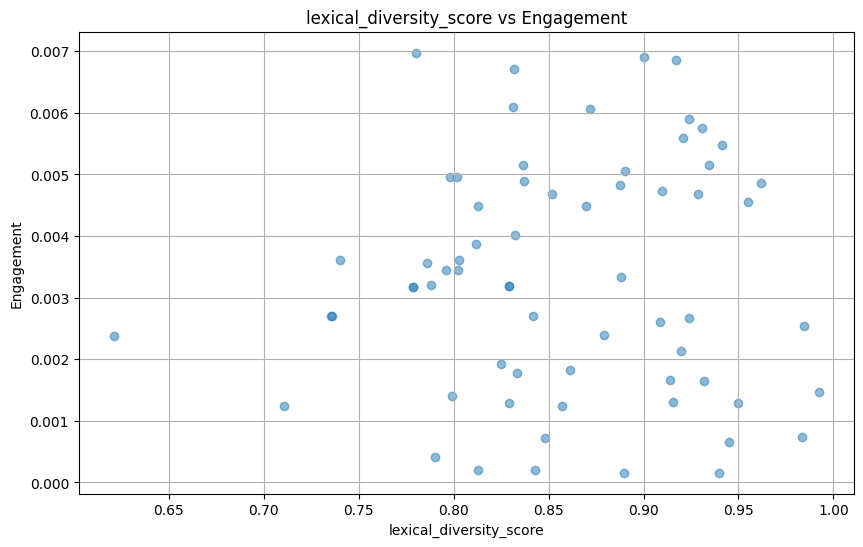

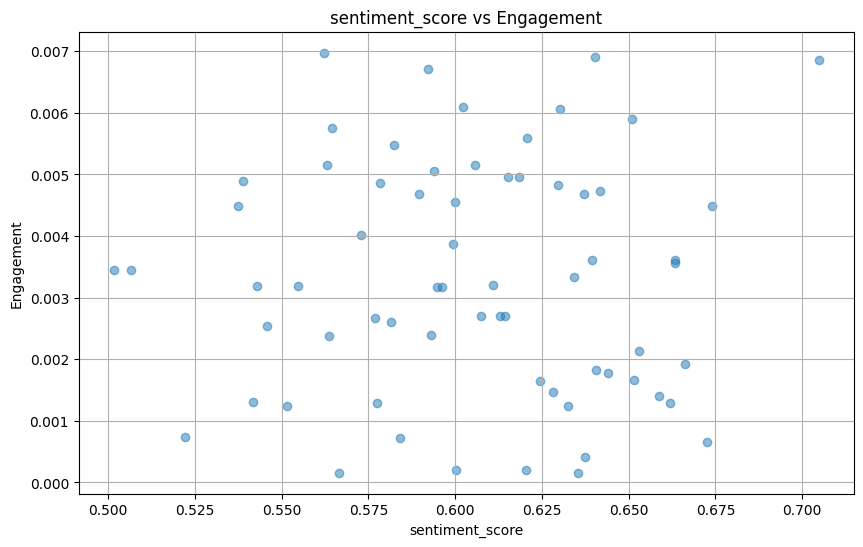

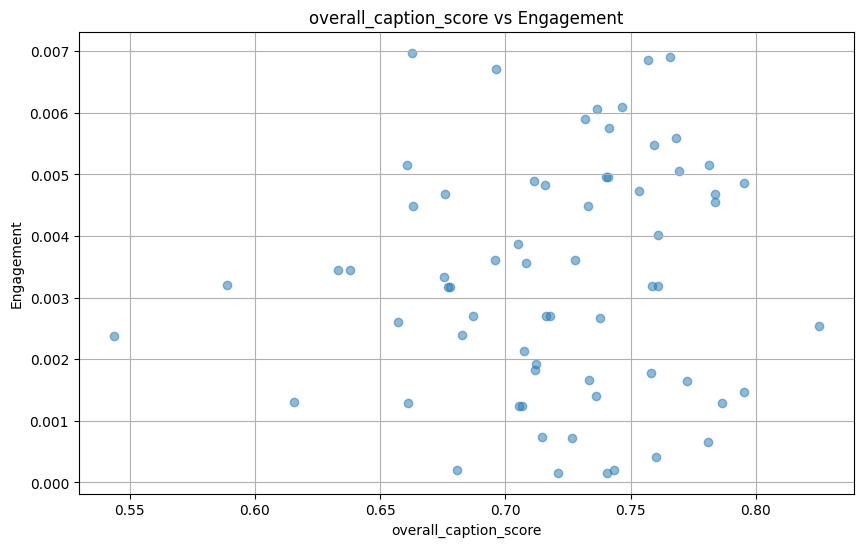

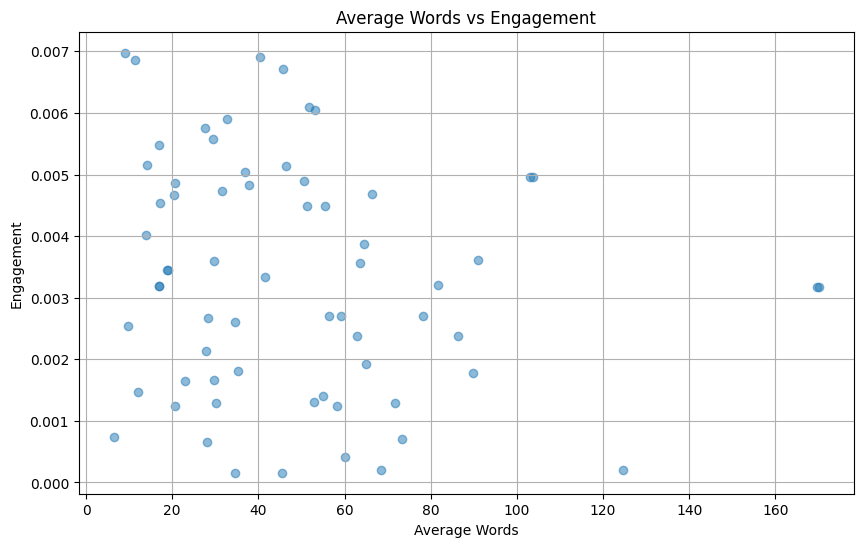

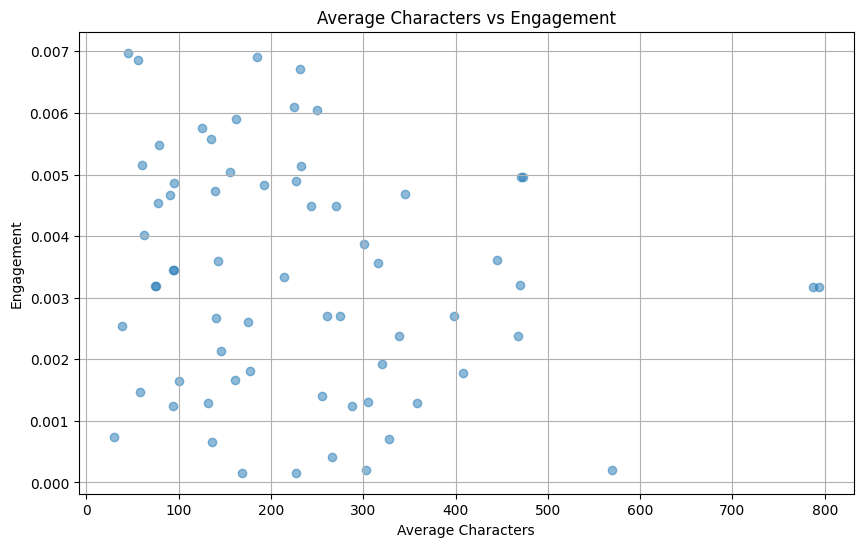

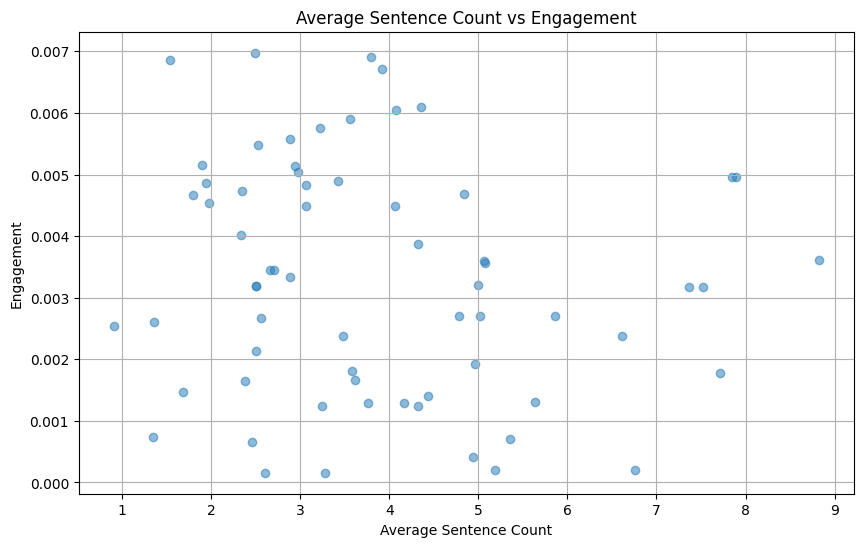

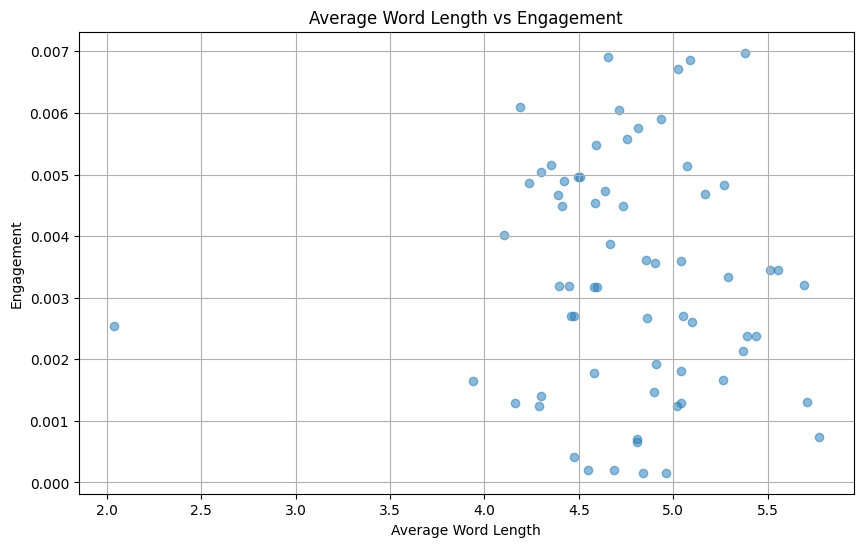

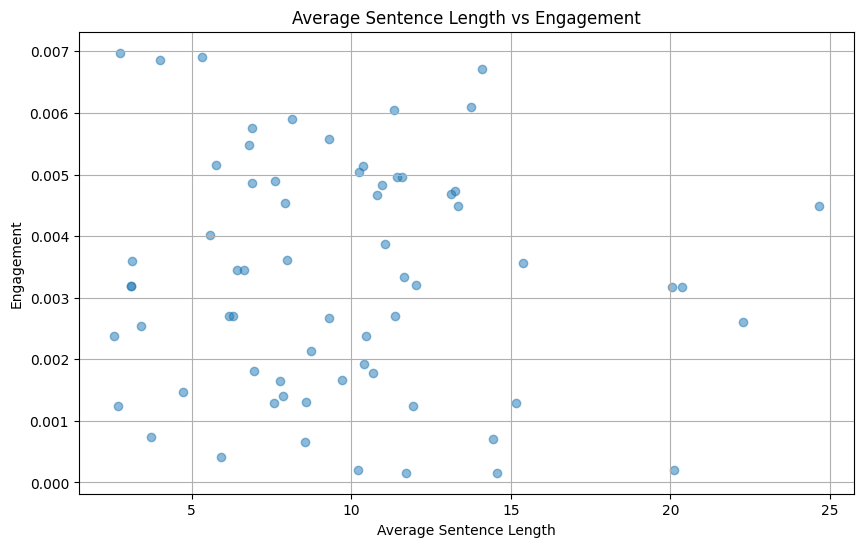

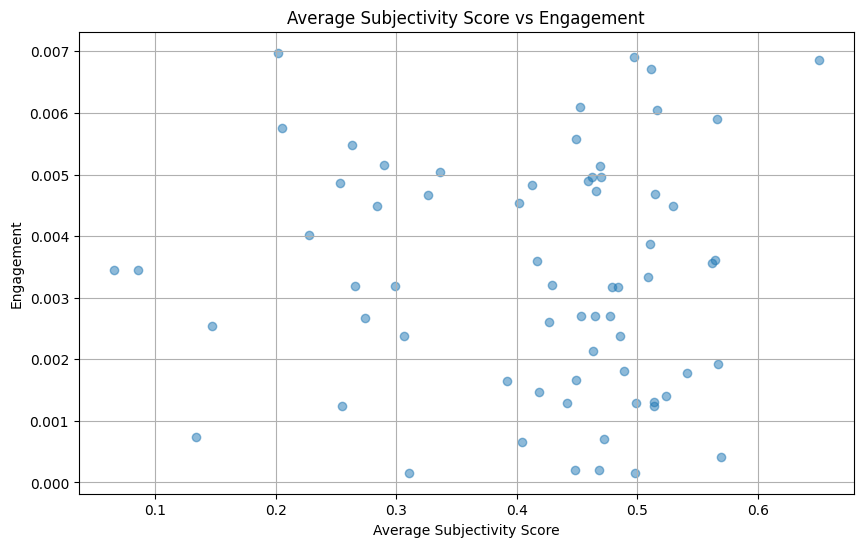

In [22]:
# For higher engagements rates
plot_features_vs_engagement(bev_lower_engagement_df, features)

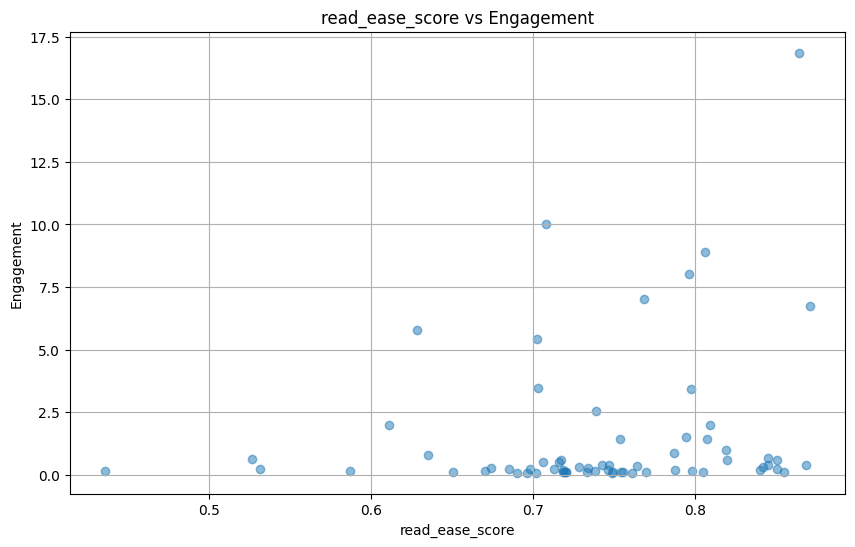

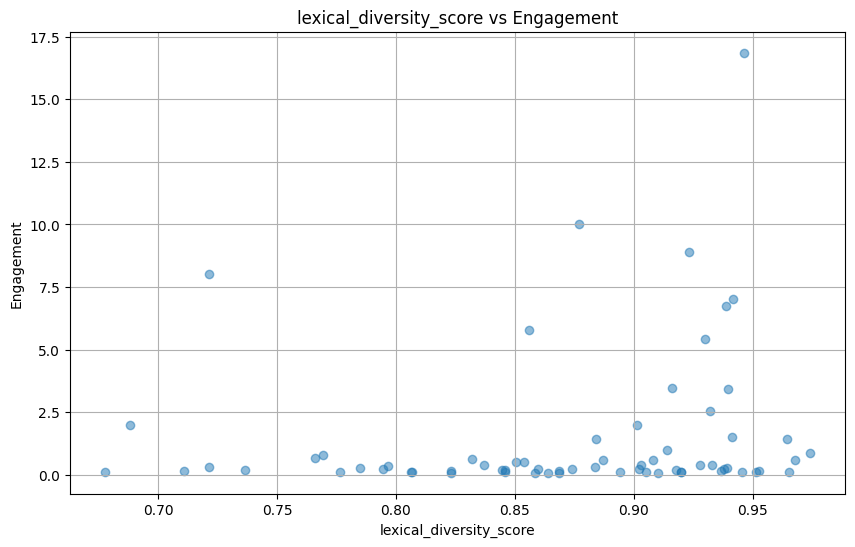

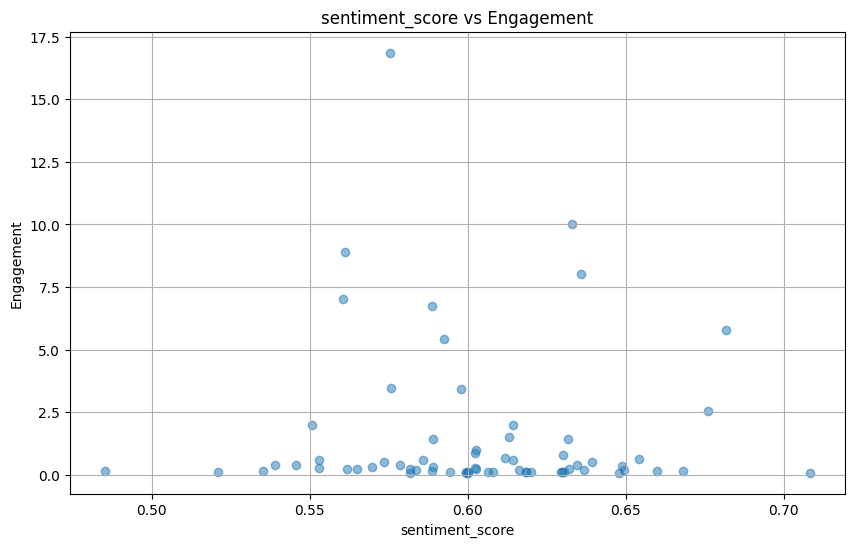

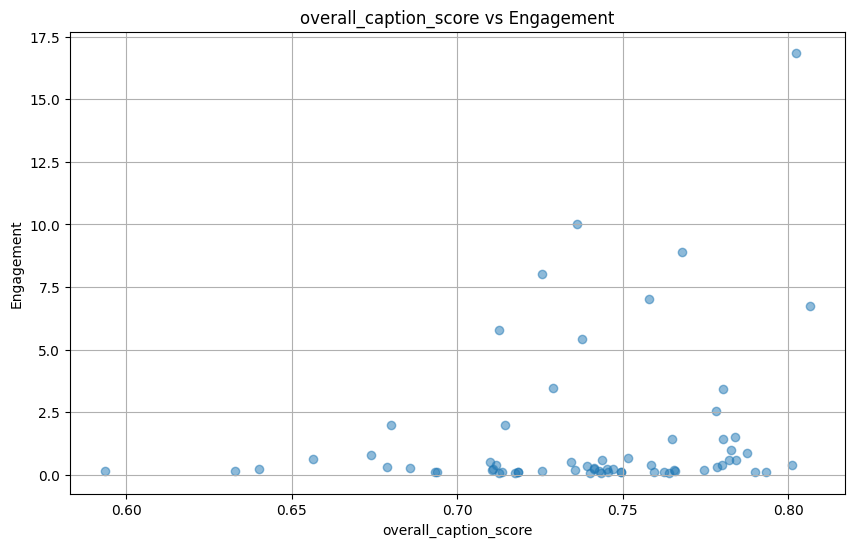

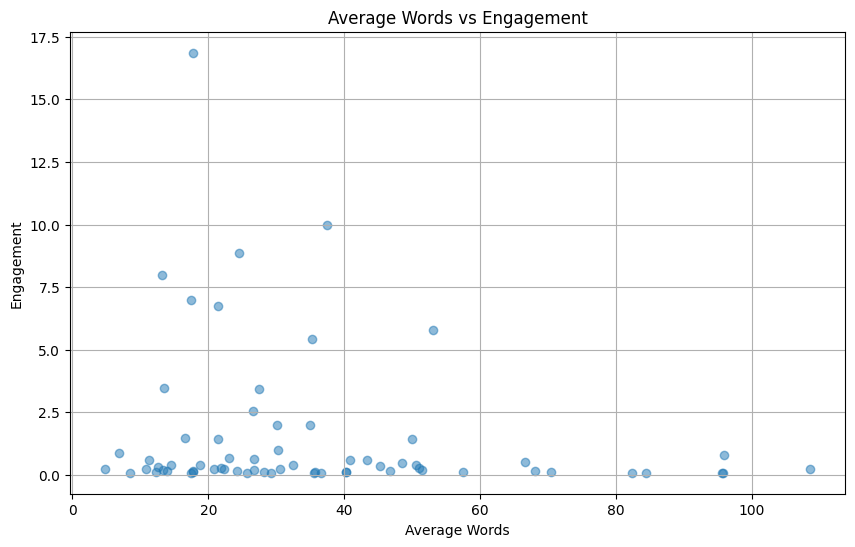

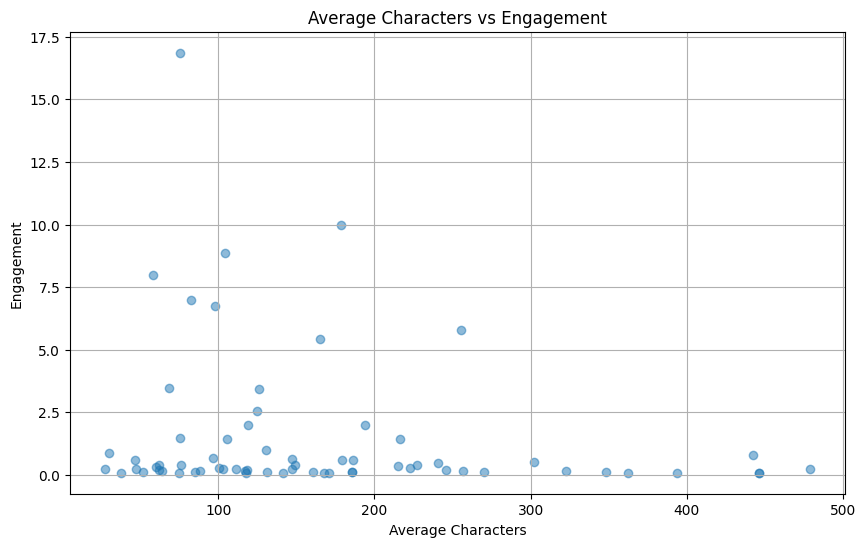

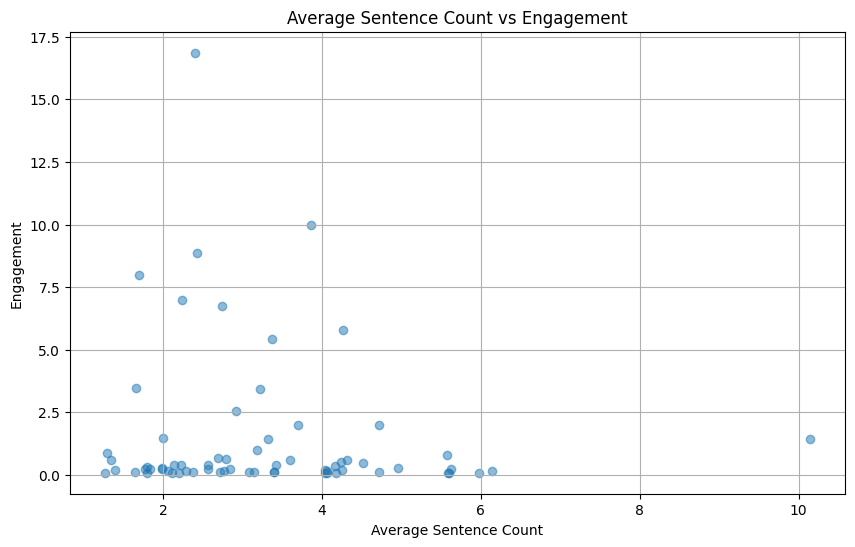

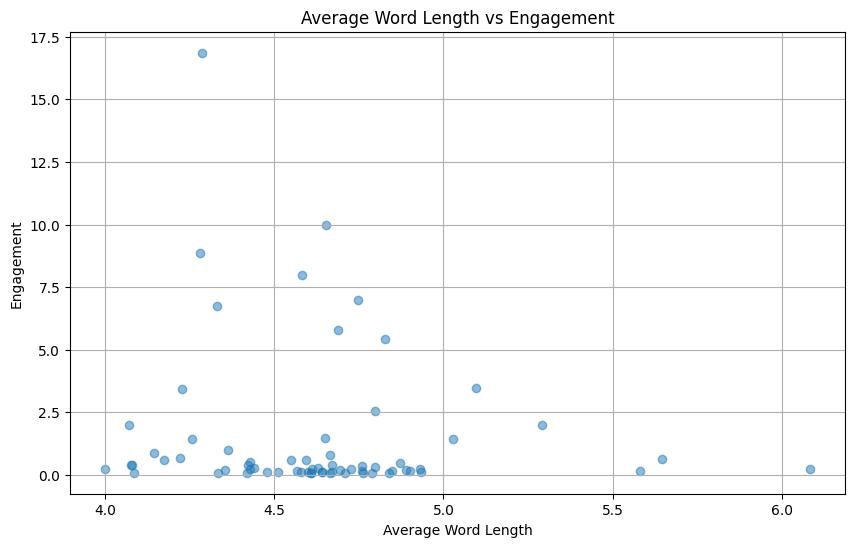

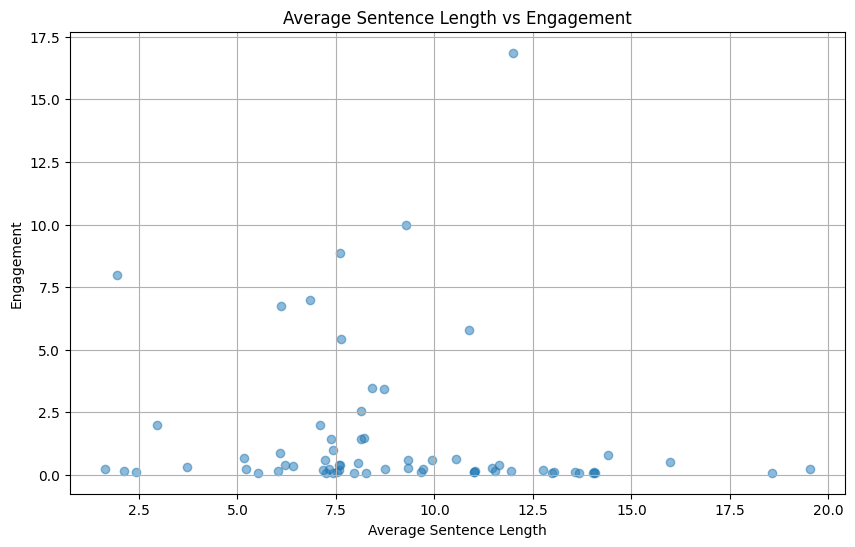

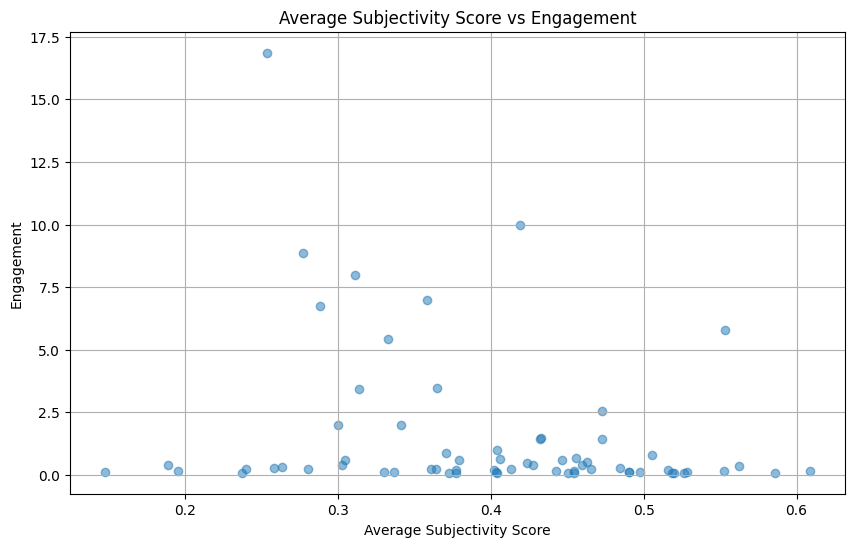

In [23]:
# For higher engagements rates
plot_features_vs_engagement(bev_higher_engagement_df, features)

In [24]:
auto_lower_engagement_df.columns.values

array(['Unnamed: 0', 'category', 'brand', 'influencer', 'read_ease_score',
       'lexical_diversity_score', 'sentiment_score',
       'overall_caption_score', 'Average Words', 'Average Characters',
       'Average Sentence Count', 'Average Word Length',
       'Average Sentence Length', 'Top 50 Captions Pos Tags',
       'Top 50 Captions Named Entity Tags', 'Average Subjectivity Score',
       'engagement'], dtype=object)

In [26]:
# auto_lower_engagement_df
# auto_higher_engagement_df

# bev_lower_engagement_df
# bev_higher_engagement_df

auto_lower_engagement_df['Top 50 Captions Named Entity Tags']

15     {'DATE': 25, 'NORP': 1, 'ORG': 6, 'CARDINAL': ...
21     {'DATE': 3, 'PERSON': 1, 'CARDINAL': 1, 'GPE': 1}
23     {'DATE': 7, 'PERSON': 13, 'ORG': 2, 'CARDINAL'...
31     {'CARDINAL': 4, 'ORG': 15, 'DATE': 17, 'GPE': ...
36     {'NORP': 6, 'PERSON': 3, 'DATE': 1, 'CARDINAL'...
                             ...                        
309    {'DATE': 24, 'ORDINAL': 10, 'CARDINAL': 21, 'P...
310    {'TIME': 3, 'PERSON': 8, 'DATE': 8, 'LOC': 1, ...
311    {'PERSON': 196, 'ORG': 39, 'GPE': 46, 'NORP': ...
312    {'CARDINAL': 2, 'DATE': 12, 'TIME': 3, 'LANGUA...
313    {'NORP': 2, 'CARDINAL': 9, 'PERSON': 7, 'DATE'...
Name: Top 50 Captions Named Entity Tags, Length: 79, dtype: object

In [44]:
import ast
def plotNamedEntityTagDist(df):
    namedEntityData = {}

    for index, row in df.iterrows():
        curr = row['Top 50 Captions Named Entity Tags']
        curr = ast.literal_eval(curr)

        for key, value in curr.items():
            if namedEntityData.get(key):
                namedEntityData[key] += value
            else :
                namedEntityData[key] = value
    
    minVal = df['engagement'].min()
    maxVal = df['engagement'].max()

    # Plotting
    plt.figure(figsize=(12, 8))
    plt.bar(namedEntityData.keys(), namedEntityData.values(), color='skyblue')
    plt.xlabel('Entity Types')
    plt.ylabel('Frequency')
    plt.title(f'Frequency of Different Entity Types (Engagement Rates Range {round(minVal, 4)} - {round(maxVal, 4)})')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    # Show plot
    plt.show()

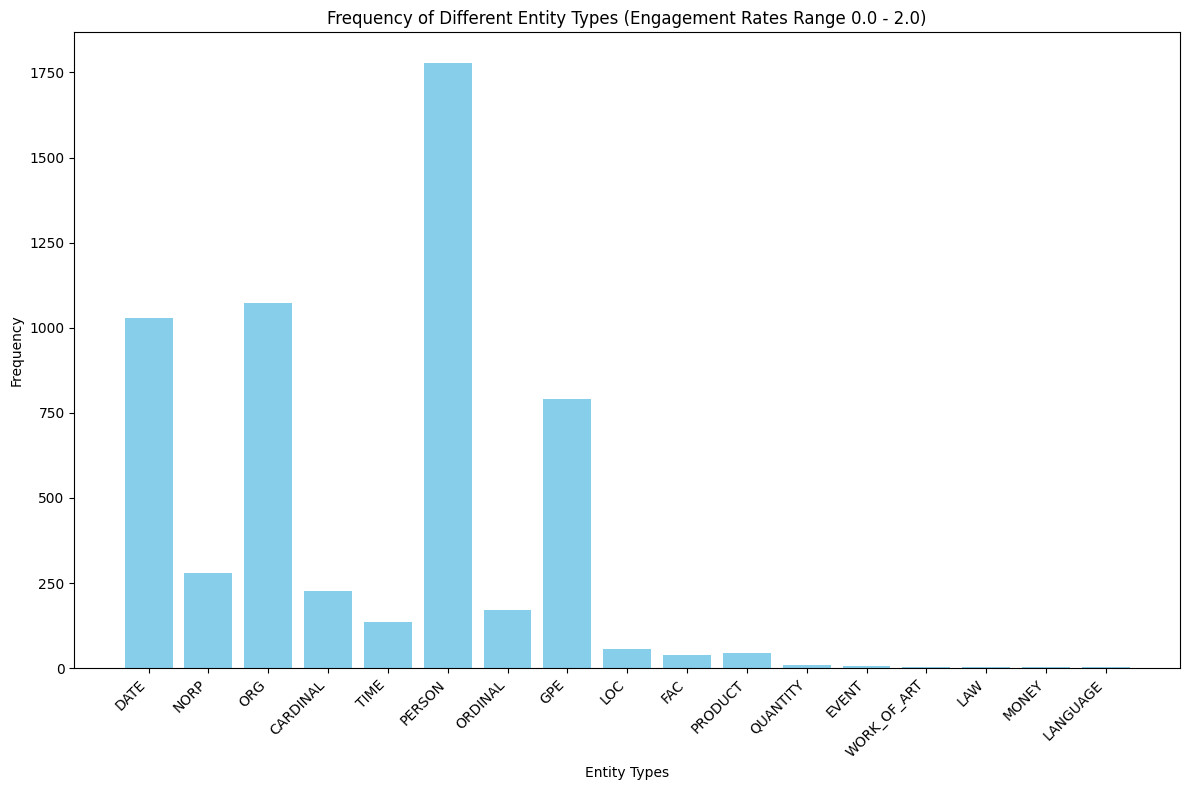

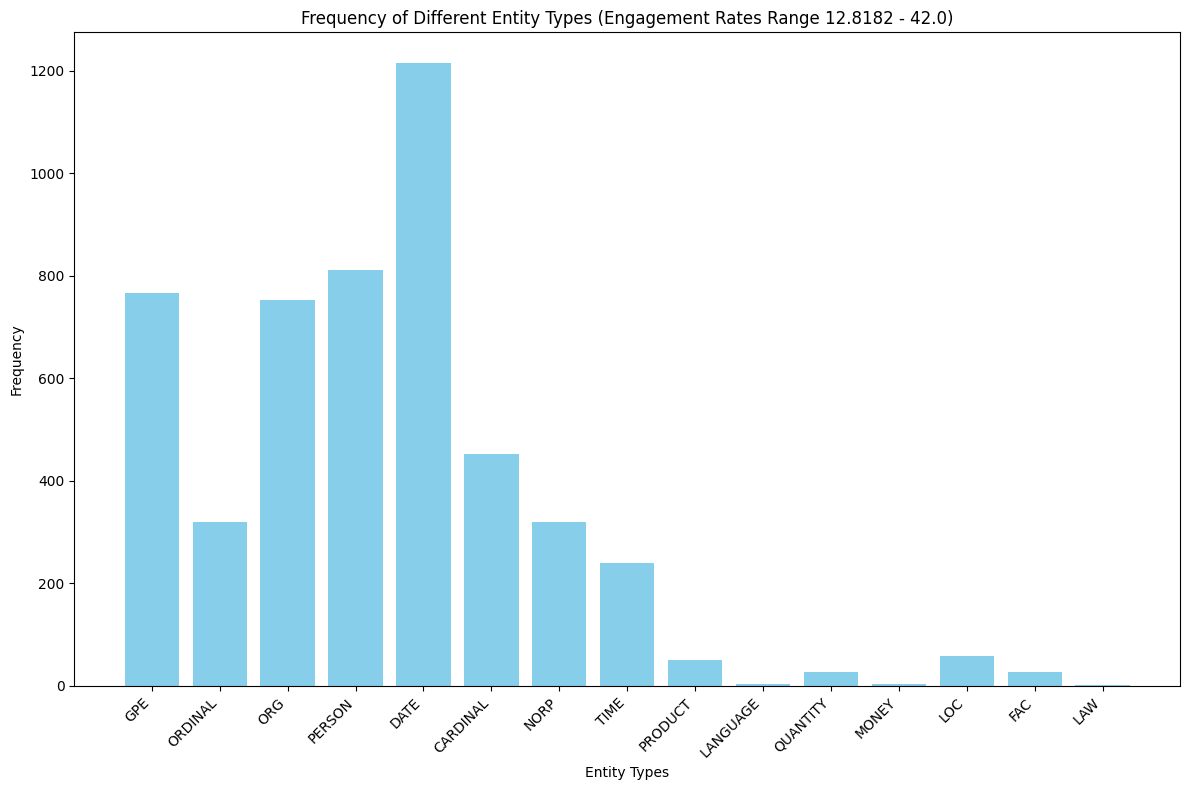

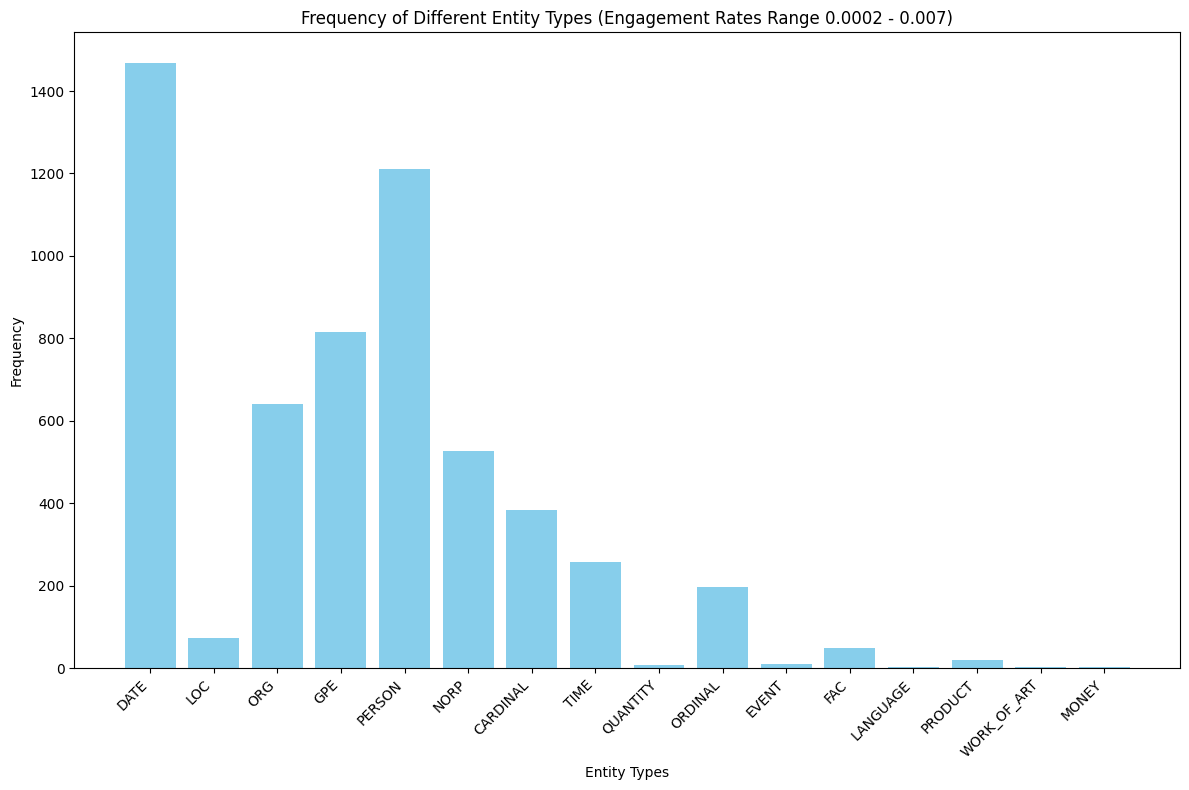

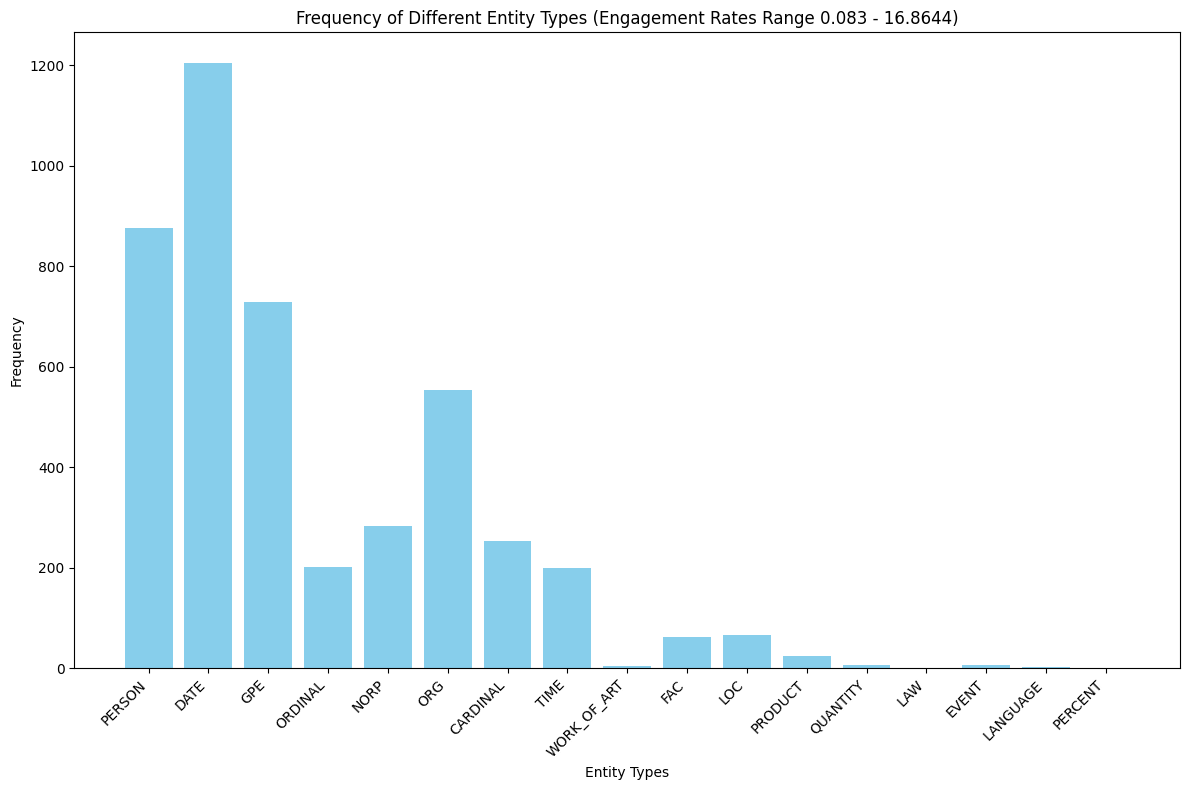

In [45]:
# Lower Engagement - Automobile
plotNamedEntityTagDist(auto_lower_engagement_df)

# Higher Engagement - Automobile
plotNamedEntityTagDist(auto_higher_engagement_df)

# Lower Engagement - Beverages
plotNamedEntityTagDist(bev_lower_engagement_df)

# Higher Engagement - Beverages
plotNamedEntityTagDist(bev_higher_engagement_df)

In [42]:
import ast
def plotPosTagsDist(df):
    posTagsData = {}

    for index, row in df.iterrows():
        curr = row['Top 50 Captions Pos Tags']
        curr = ast.literal_eval(curr)

        for key, value in curr.items():
            if posTagsData.get(key):
                posTagsData[key] += value
            else :
                posTagsData[key] = value
    
    minVal = df['engagement'].min()
    maxVal = df['engagement'].max()

    # Plotting
    plt.figure(figsize=(12, 8))
    plt.bar(posTagsData.keys(), posTagsData.values(), color='skyblue')
    plt.xlabel('POS Tags Types')
    plt.ylabel('Frequency')
    plt.title(f'Frequency of Different POS Tags (Engagement Rates Range {round(minVal, 4)} - {round(maxVal, 4)})')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    # Show plot
    plt.show()

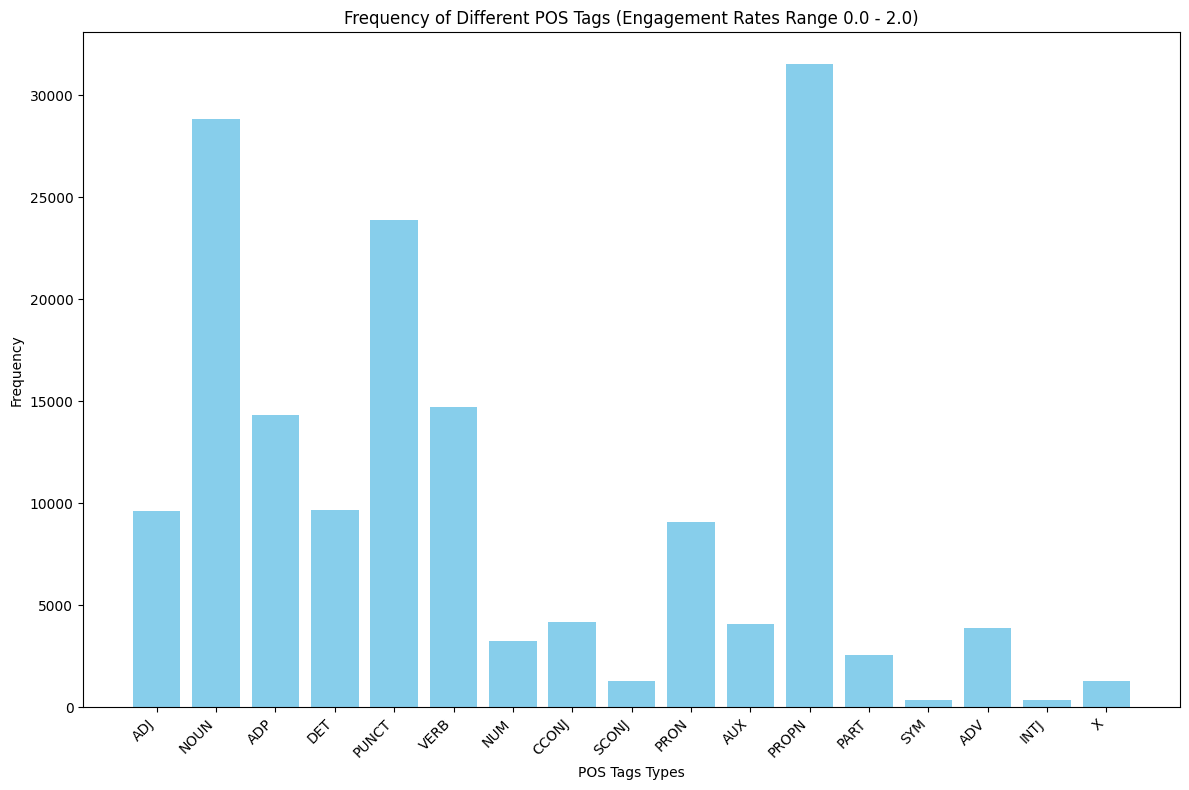

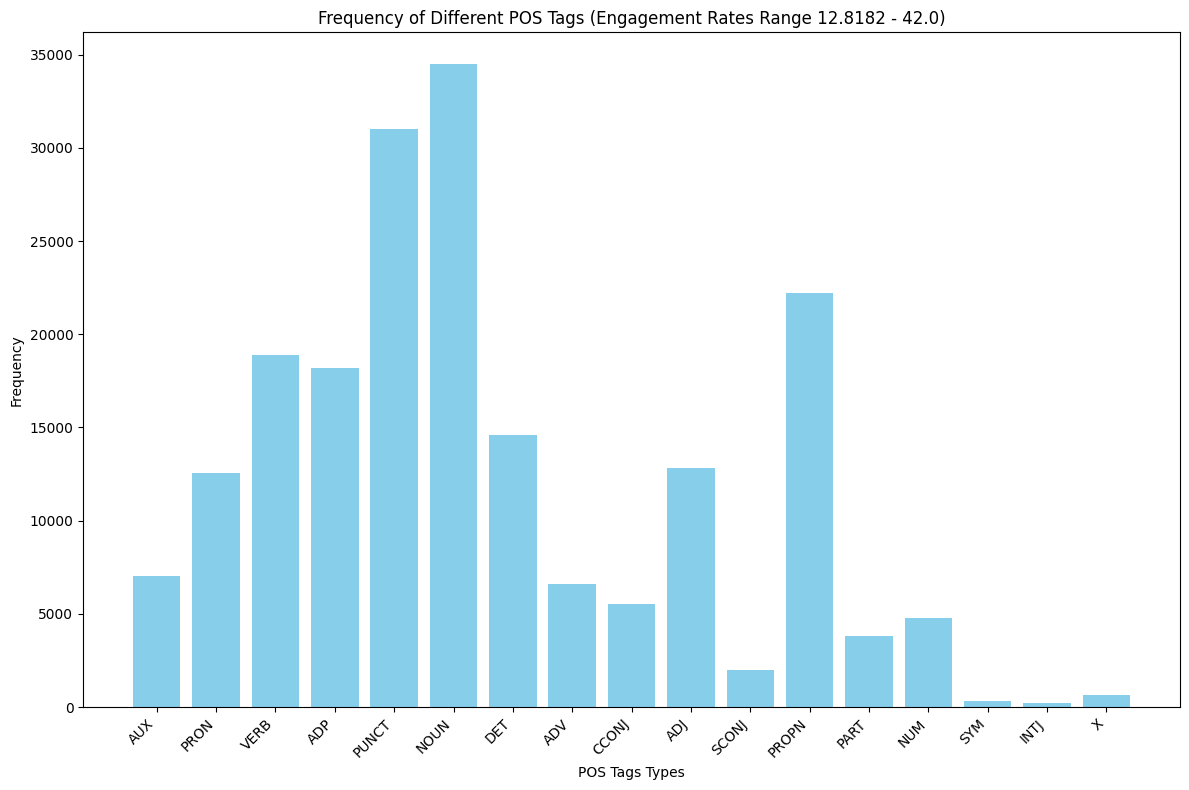

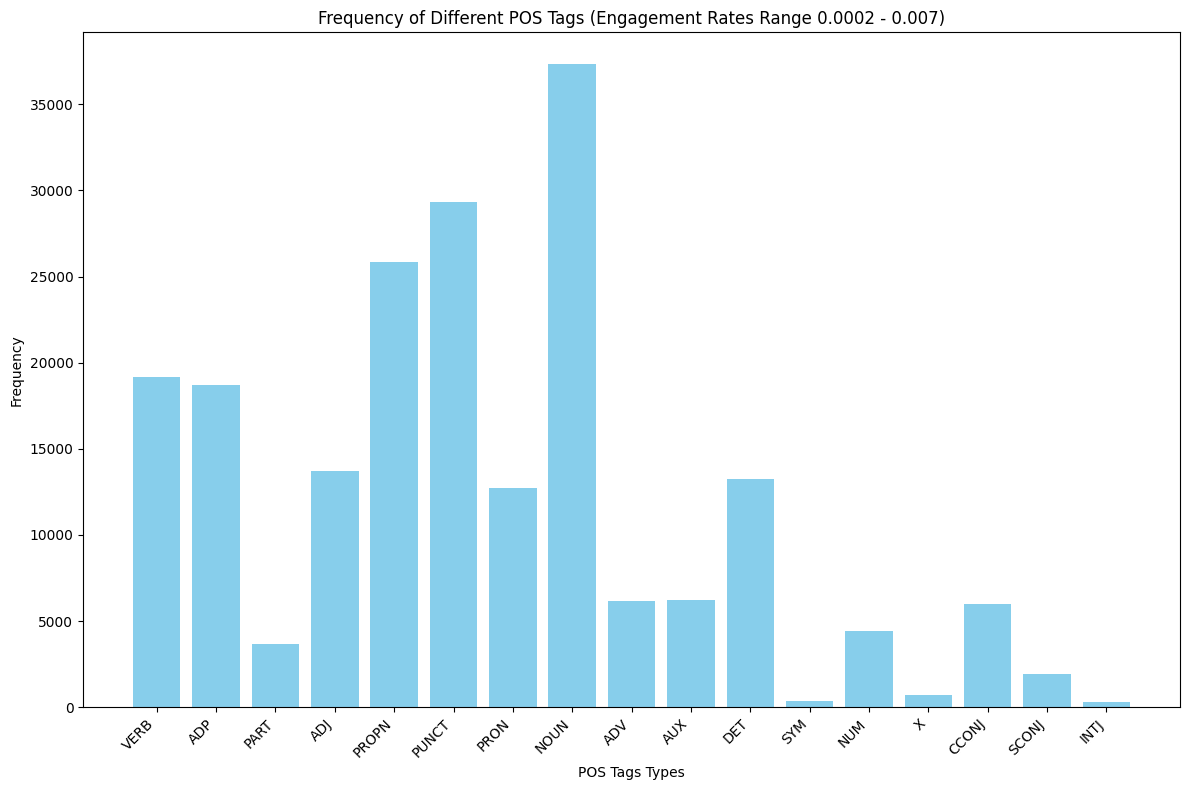

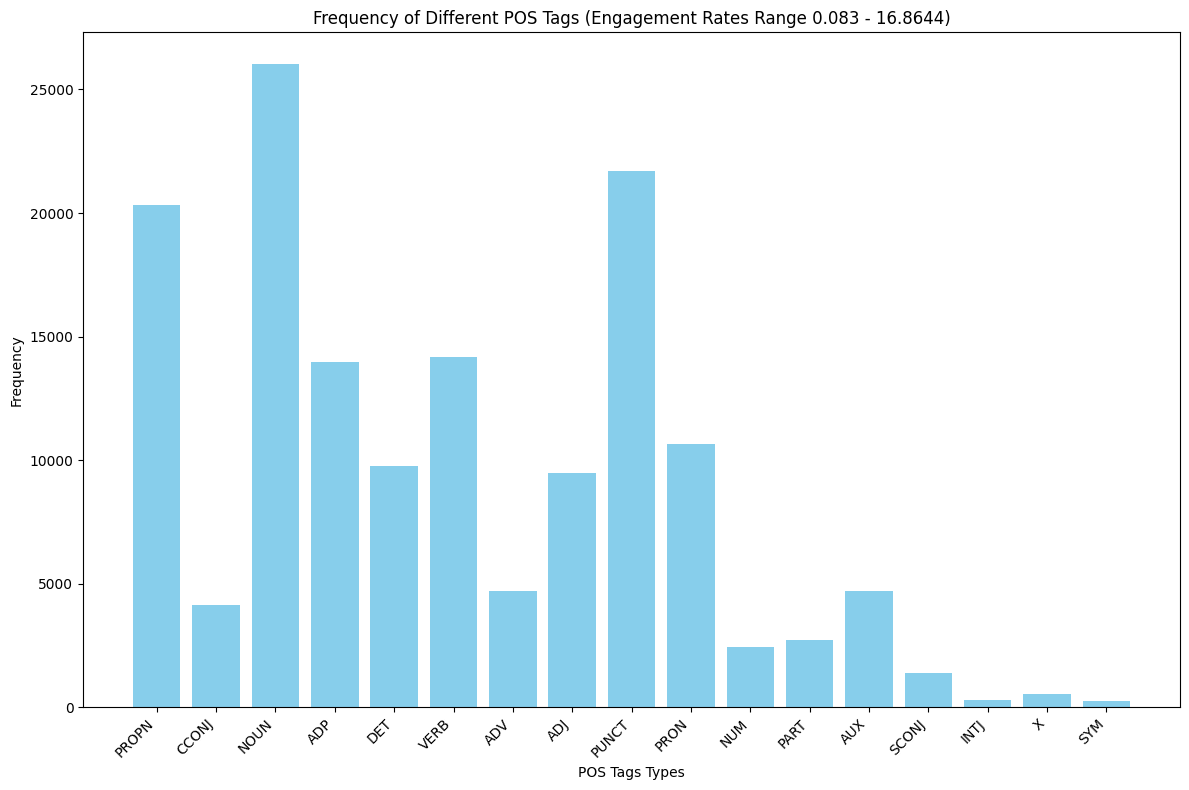

In [43]:
# Lower Engagement - Automobile
plotPosTagsDist(auto_lower_engagement_df)

# Higher Engagement - Automobile
plotPosTagsDist(auto_higher_engagement_df)

# Lower Engagement - Beverages
plotPosTagsDist(bev_lower_engagement_df)

# Higher Engagement - Beverages
plotPosTagsDist(bev_higher_engagement_df)

In [139]:
import ast
import seaborn as sns

def plotPosTags(df, tag):
    curr = []

    for index, row in df.iterrows():
        pos_tags = row['Top 50 Captions Pos Tags']
        pos_tags_dict = ast.literal_eval(pos_tags)
        d = {
            tag: pos_tags_dict.get(tag, 0),
            'engagement': row['engagement']
        }
        curr.append(d)

    engagement_adv_df = pd.DataFrame(curr)
    maxtag = engagement_adv_df[tag].max()
    maxtagEngagement = engagement_adv_df[engagement_adv_df[tag] == maxtag]['engagement']
    print(f"Max Value of current pos tag: {maxtag}, Associated engagement: {maxtagEngagement}")

    # Increase the size of the plot
    plt.figure(figsize=(15, 10))
    sns.barplot(x=tag, y='engagement', data=engagement_adv_df, ci=None)
    plt.xlabel(f'{tag} Count', fontsize=14)
    plt.ylabel('Engagement', fontsize=14)
    plt.title(f'Engagement vs. {tag} POS Tag Count', fontsize=16)
    plt.xticks(fontsize=6)
    plt.yticks(fontsize=6)
    plt.grid(True)  
    plt.show()

In [97]:
tags = set()

for index, row in auto_lower_engagement_df.iterrows():
    d = row['Top 50 Captions Pos Tags']
    for k, v in d.items():
        tags.add(k)

pos_tags = list(tags)

Max Value of current pos tag: 735, Associated engagement: 74    0.0
Name: engagement, dtype: float64


/var/folders/lp/thjl93cn1lg4b44b6kmtggvh0000gn/T/ipykernel_3503/2292812008.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=tag, y='engagement', data=engagement_adv_df, ci=None)


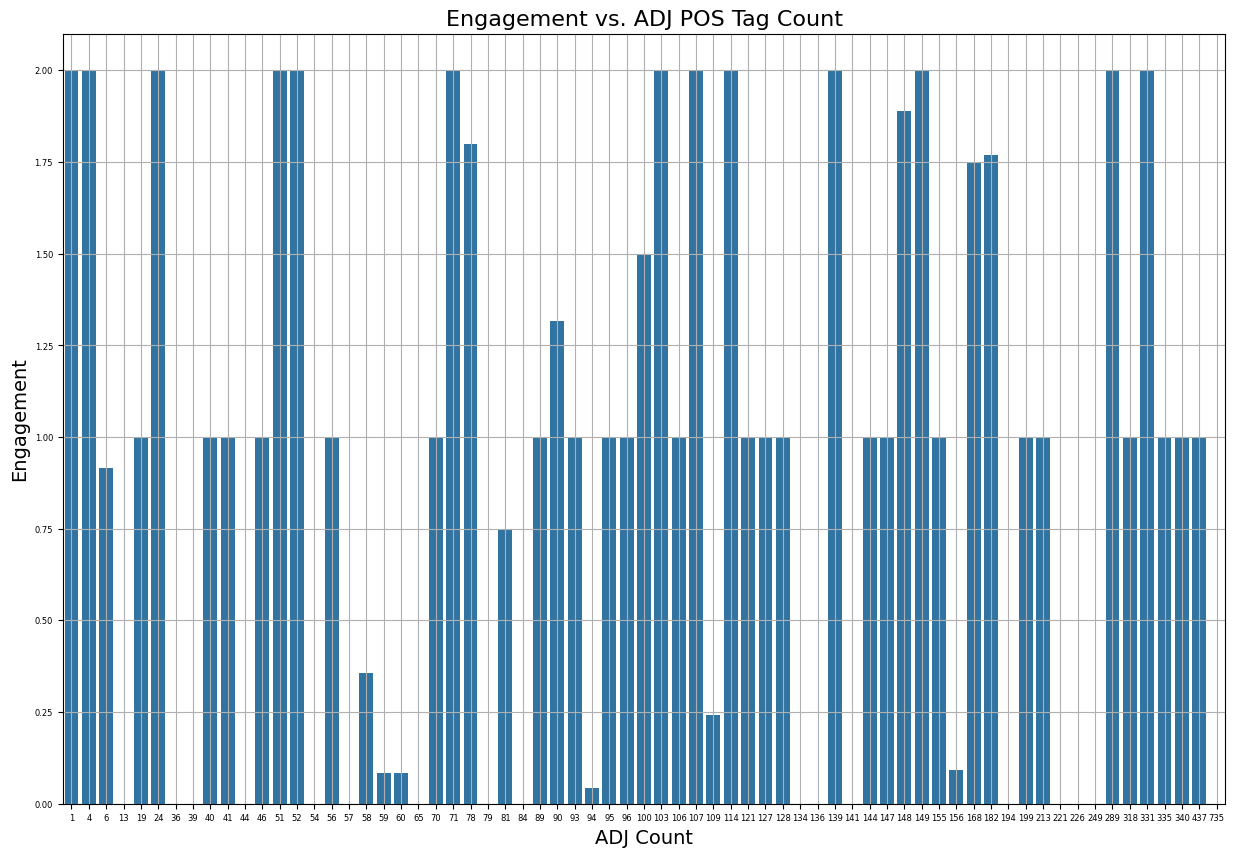

Max Value of current pos tag: 374, Associated engagement: 74    0.0
Name: engagement, dtype: float64


/var/folders/lp/thjl93cn1lg4b44b6kmtggvh0000gn/T/ipykernel_3503/2292812008.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=tag, y='engagement', data=engagement_adv_df, ci=None)


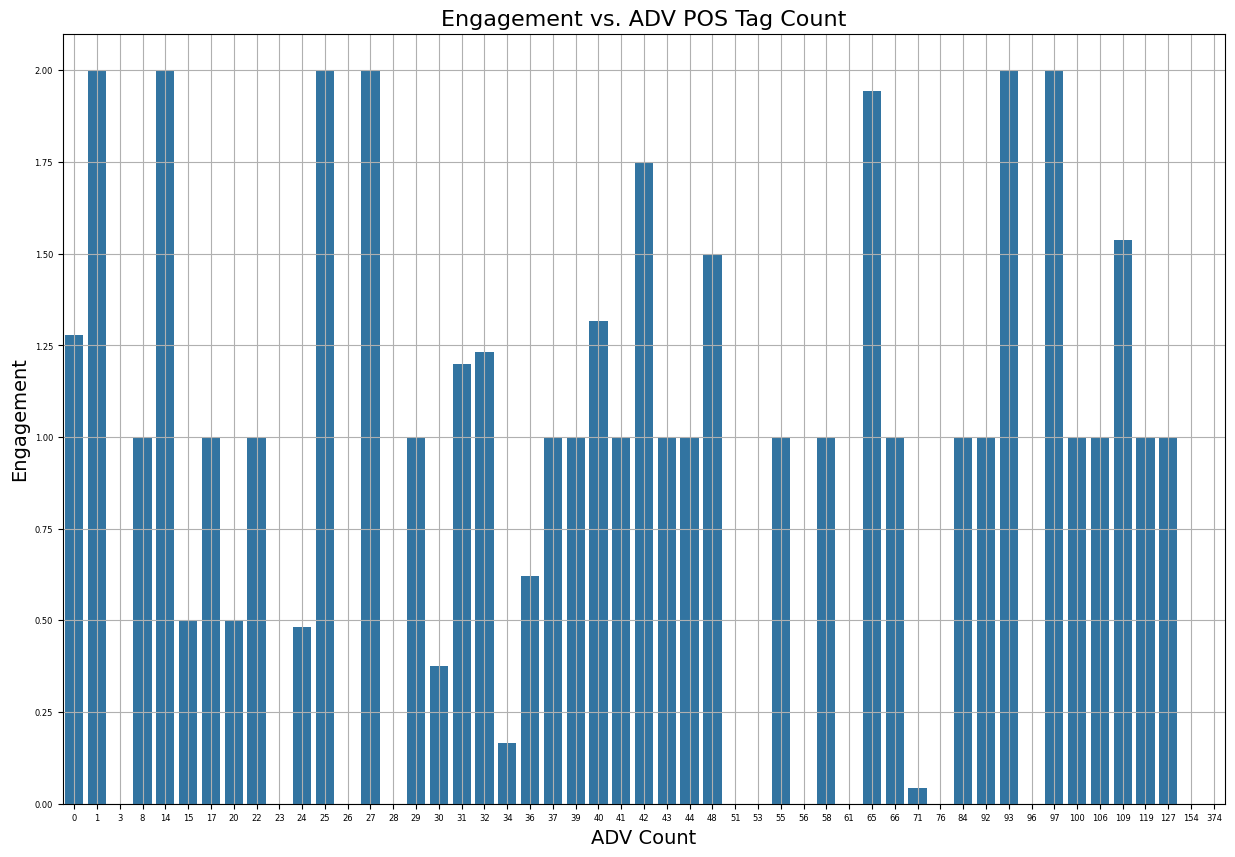

Max Value of current pos tag: 1145, Associated engagement: 74    0.0
Name: engagement, dtype: float64


/var/folders/lp/thjl93cn1lg4b44b6kmtggvh0000gn/T/ipykernel_3503/2292812008.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=tag, y='engagement', data=engagement_adv_df, ci=None)


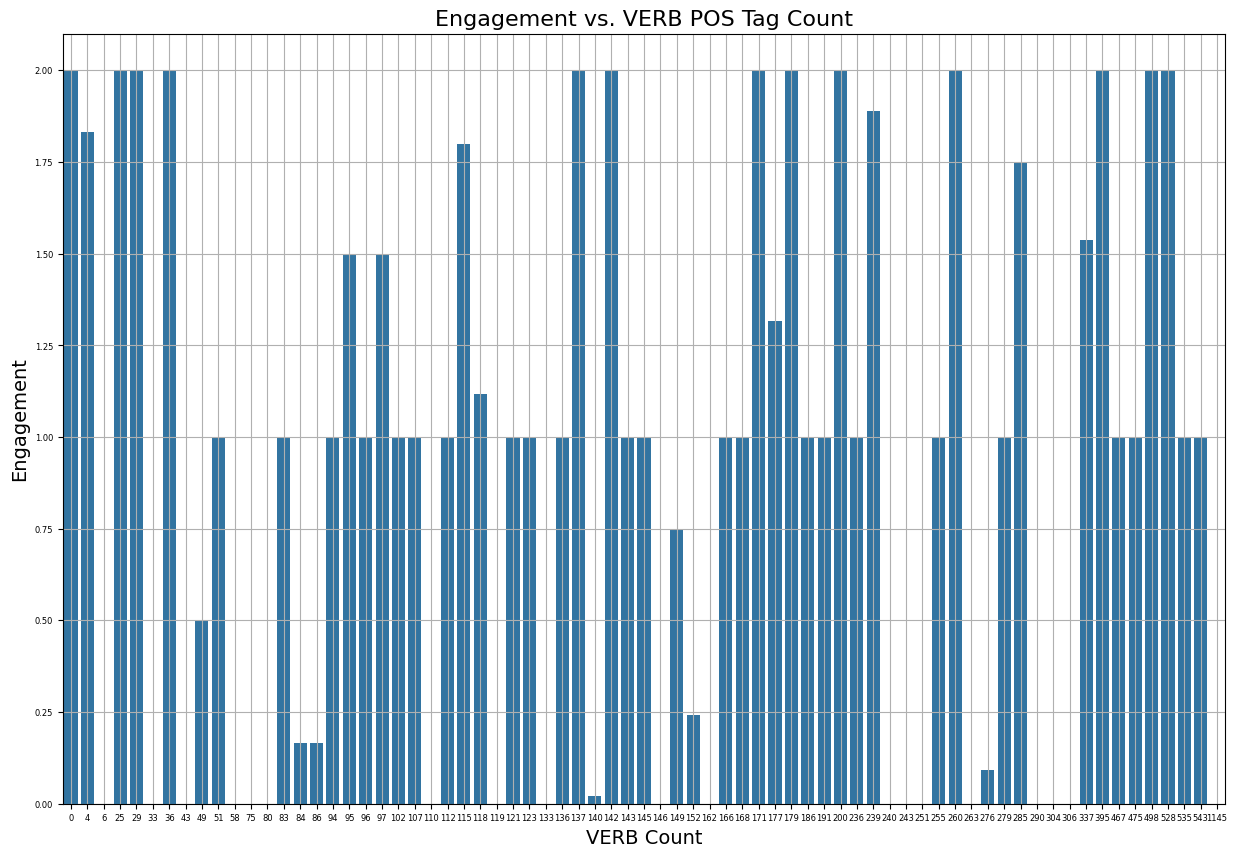

Max Value of current pos tag: 1093, Associated engagement: 74    0.0
Name: engagement, dtype: float64


/var/folders/lp/thjl93cn1lg4b44b6kmtggvh0000gn/T/ipykernel_3503/2292812008.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=tag, y='engagement', data=engagement_adv_df, ci=None)


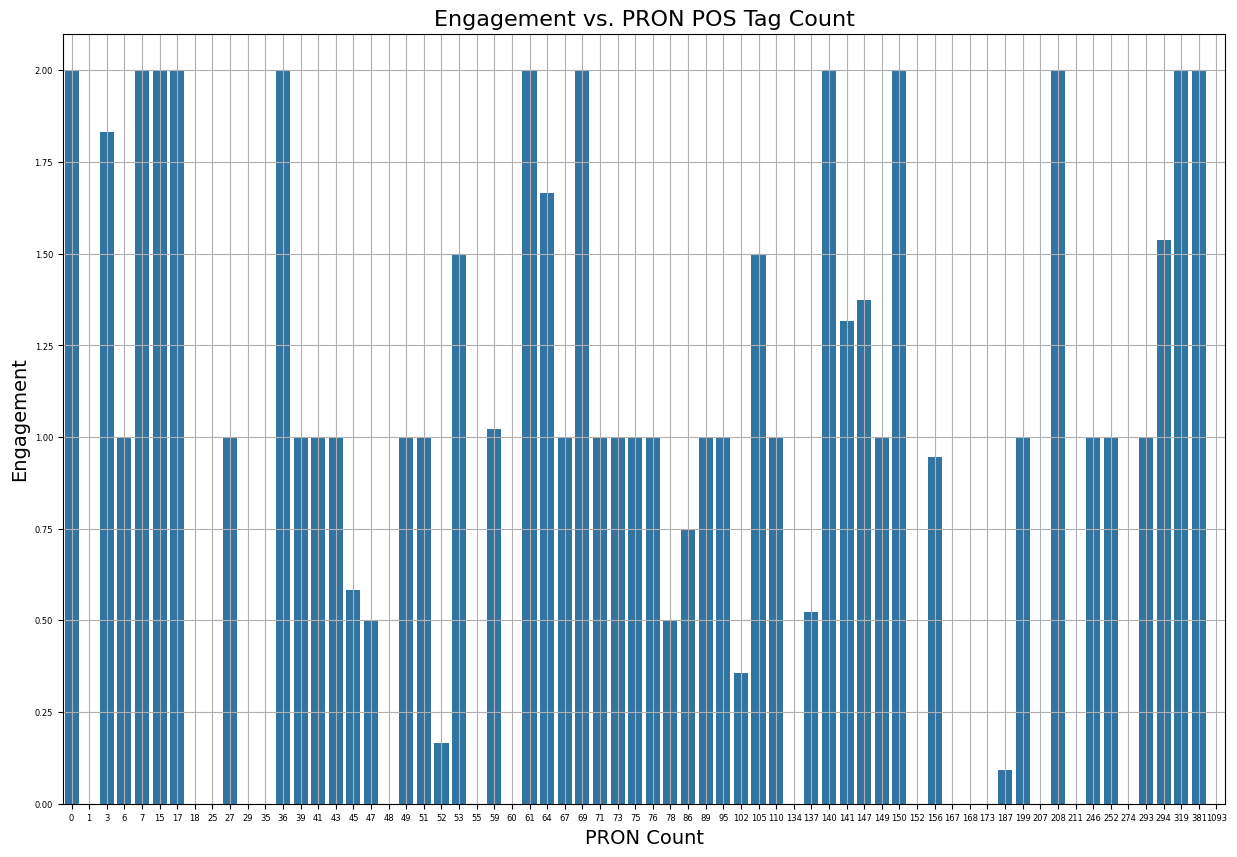

Max Value of current pos tag: 1000, Associated engagement: 45    1.0
Name: engagement, dtype: float64


/var/folders/lp/thjl93cn1lg4b44b6kmtggvh0000gn/T/ipykernel_3503/2292812008.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=tag, y='engagement', data=engagement_adv_df, ci=None)


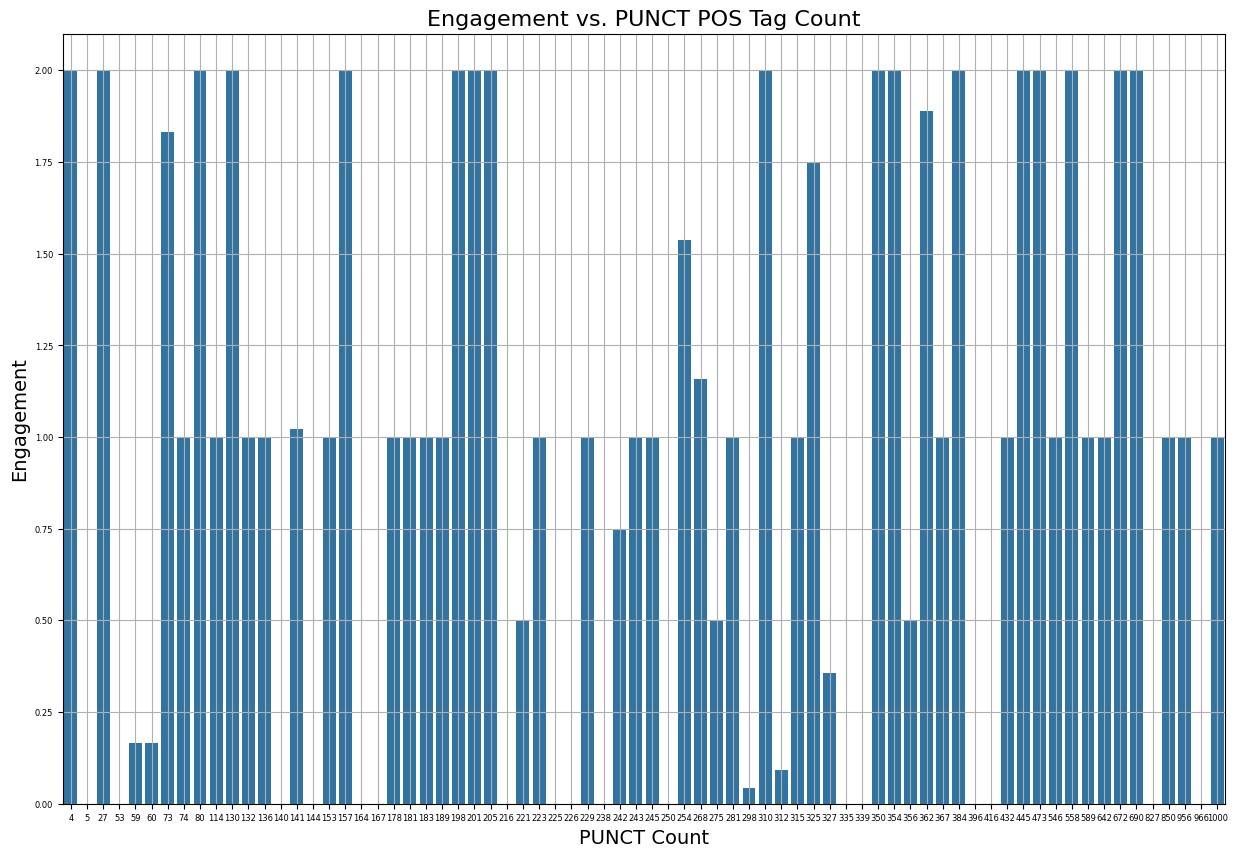

Max Value of current pos tag: 193, Associated engagement: 5    1.0
Name: engagement, dtype: float64


/var/folders/lp/thjl93cn1lg4b44b6kmtggvh0000gn/T/ipykernel_3503/2292812008.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=tag, y='engagement', data=engagement_adv_df, ci=None)


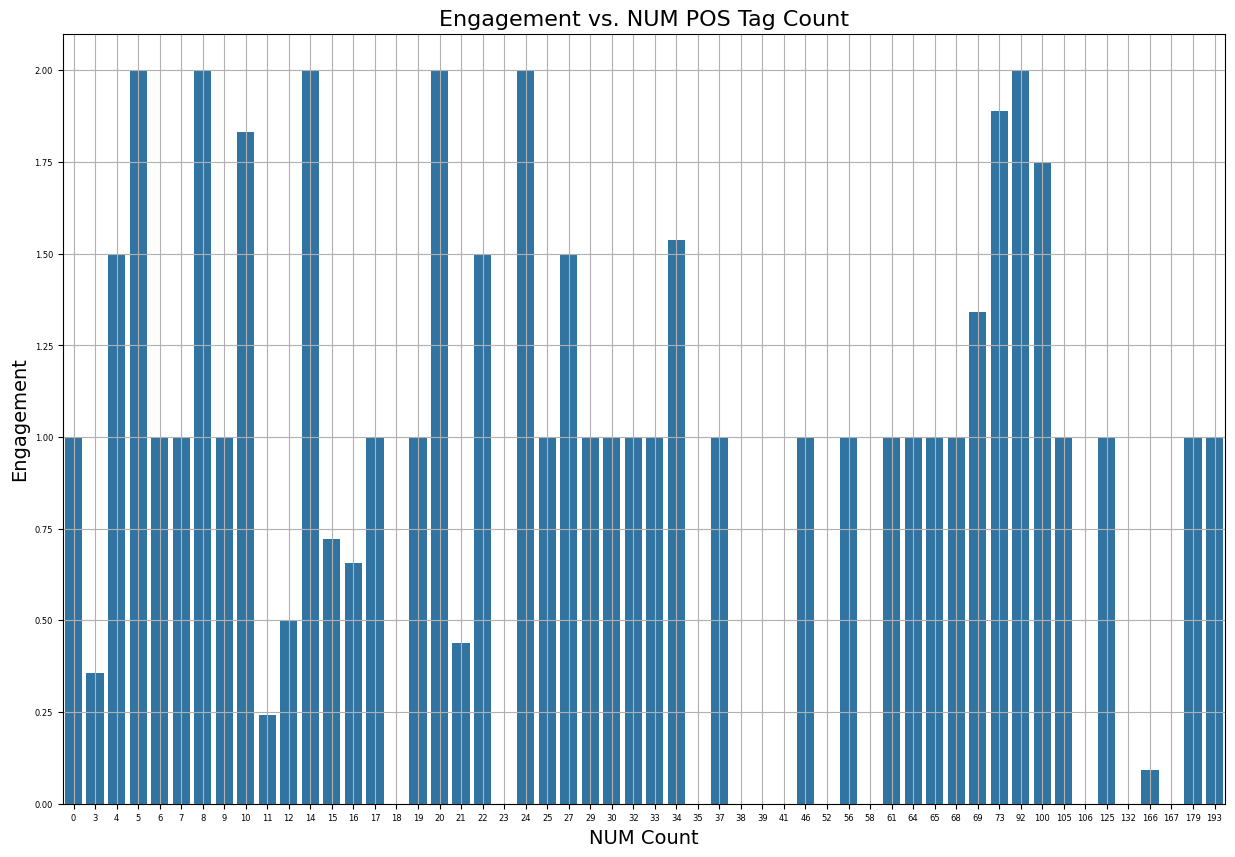

Max Value of current pos tag: 1779, Associated engagement: 74    0.0
Name: engagement, dtype: float64


/var/folders/lp/thjl93cn1lg4b44b6kmtggvh0000gn/T/ipykernel_3503/2292812008.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=tag, y='engagement', data=engagement_adv_df, ci=None)


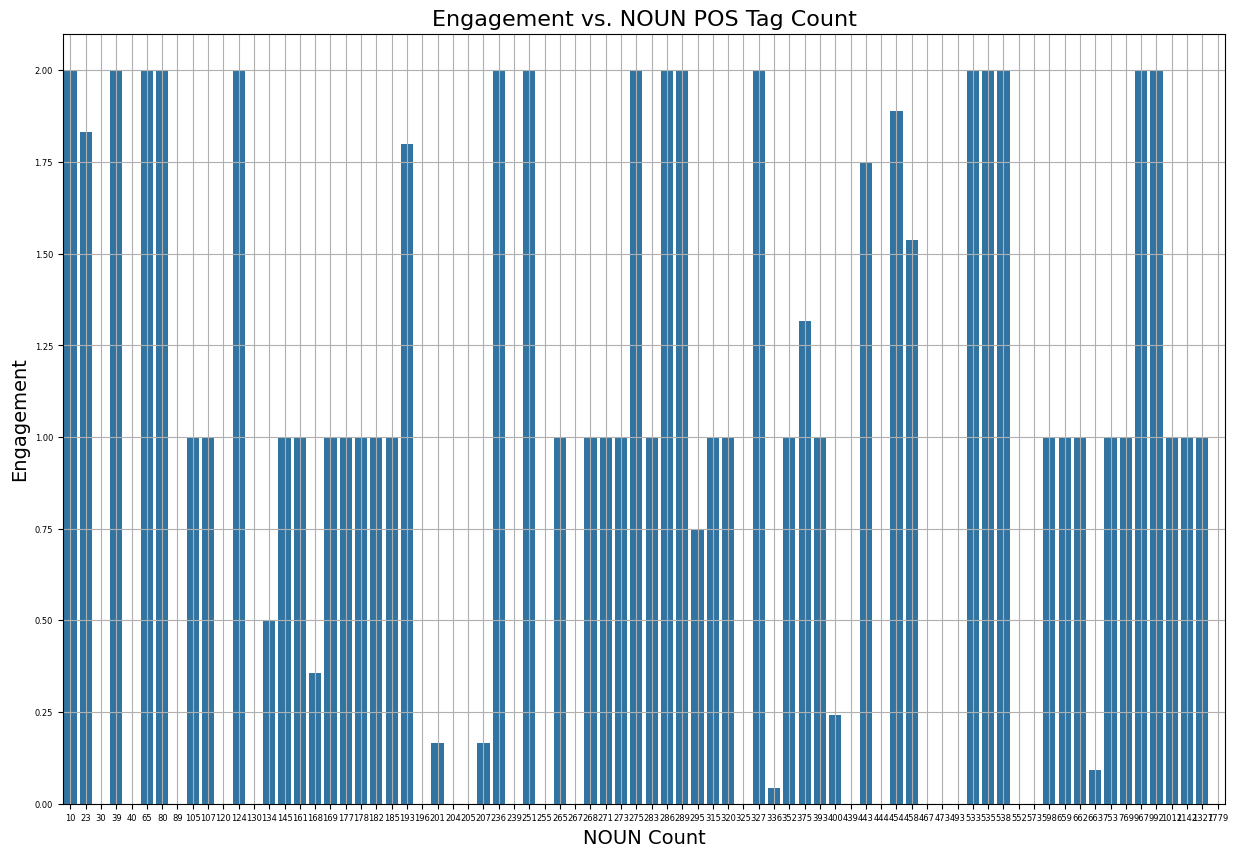

Max Value of current pos tag: 187, Associated engagement: 74    0.0
Name: engagement, dtype: float64


/var/folders/lp/thjl93cn1lg4b44b6kmtggvh0000gn/T/ipykernel_3503/2292812008.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=tag, y='engagement', data=engagement_adv_df, ci=None)


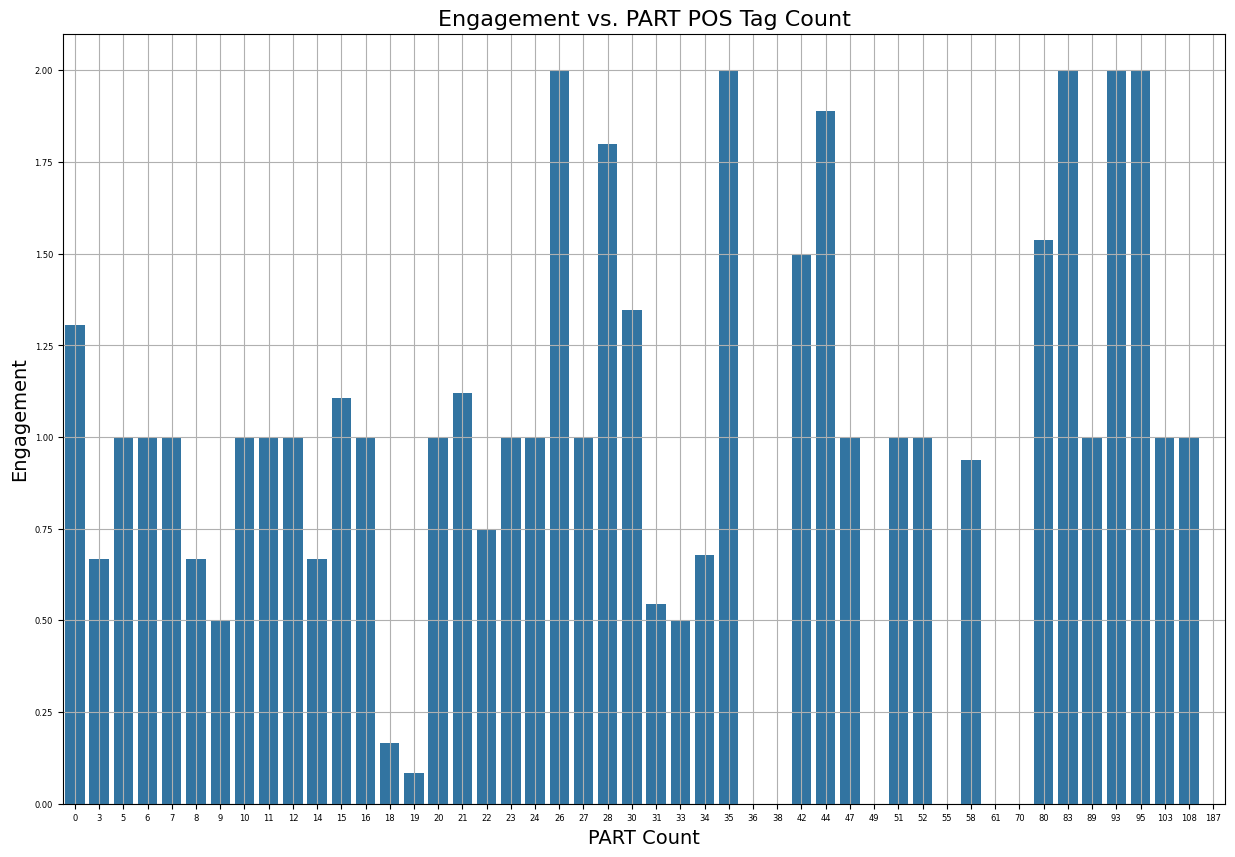

Max Value of current pos tag: 2377, Associated engagement: 76    0.0
Name: engagement, dtype: float64


/var/folders/lp/thjl93cn1lg4b44b6kmtggvh0000gn/T/ipykernel_3503/2292812008.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=tag, y='engagement', data=engagement_adv_df, ci=None)


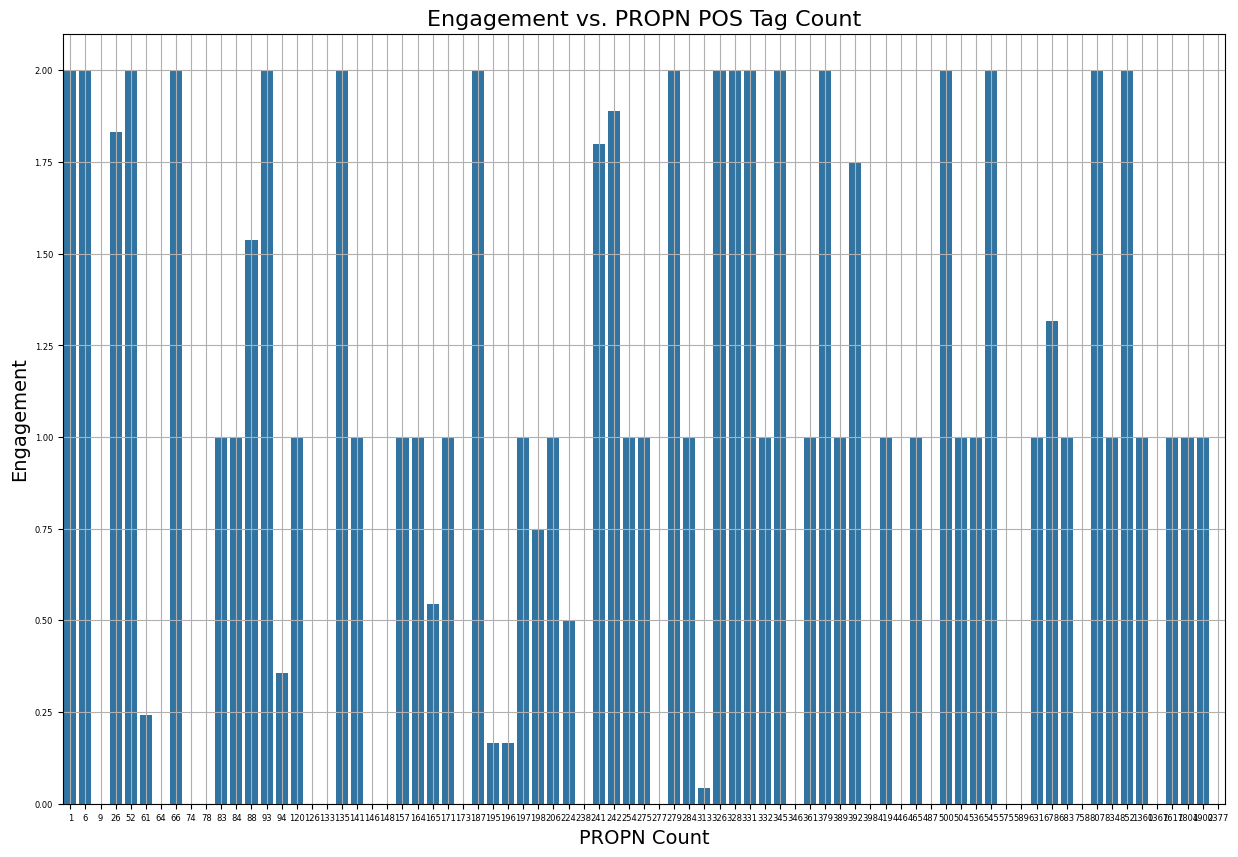

Max Value of current pos tag: 40, Associated engagement: 6    0.090909
Name: engagement, dtype: float64


/var/folders/lp/thjl93cn1lg4b44b6kmtggvh0000gn/T/ipykernel_3503/2292812008.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=tag, y='engagement', data=engagement_adv_df, ci=None)


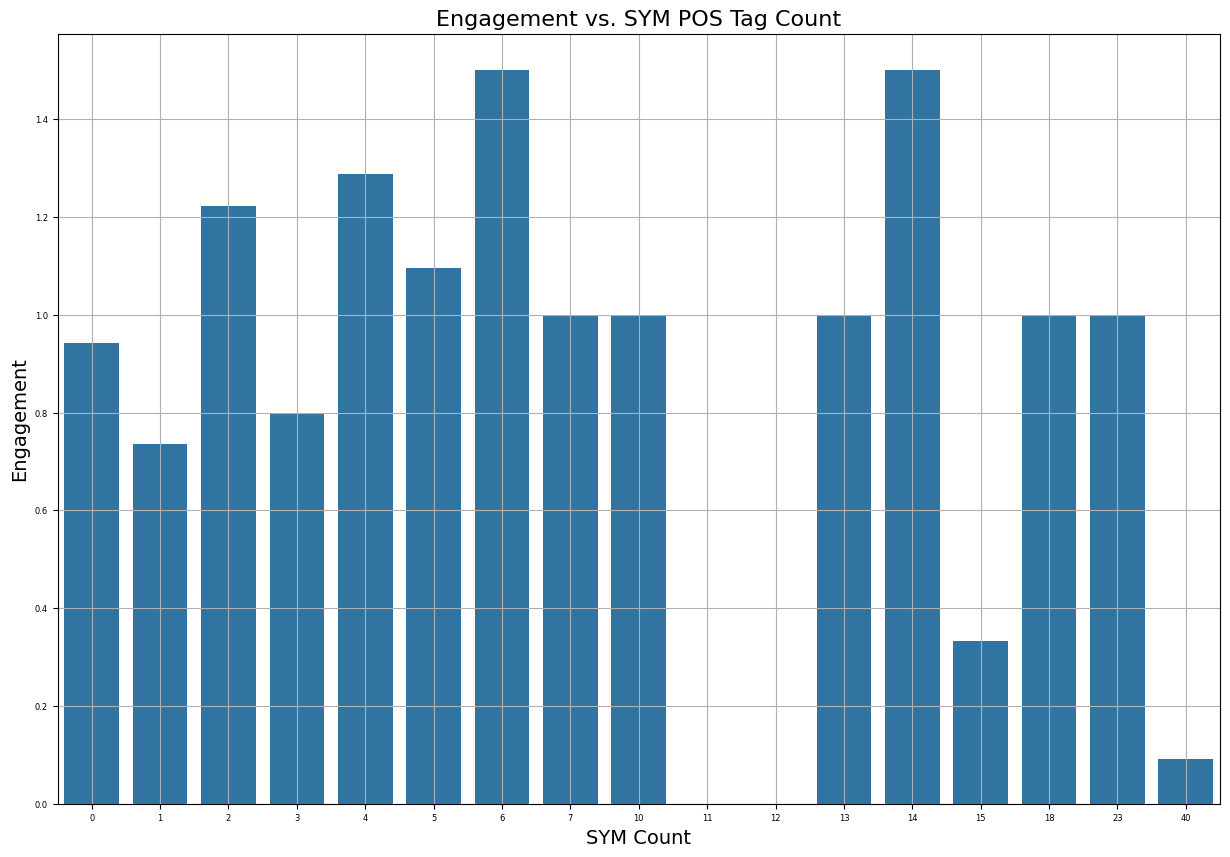

Max Value of current pos tag: 251, Associated engagement: 5    1.0
Name: engagement, dtype: float64


/var/folders/lp/thjl93cn1lg4b44b6kmtggvh0000gn/T/ipykernel_3503/2292812008.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=tag, y='engagement', data=engagement_adv_df, ci=None)


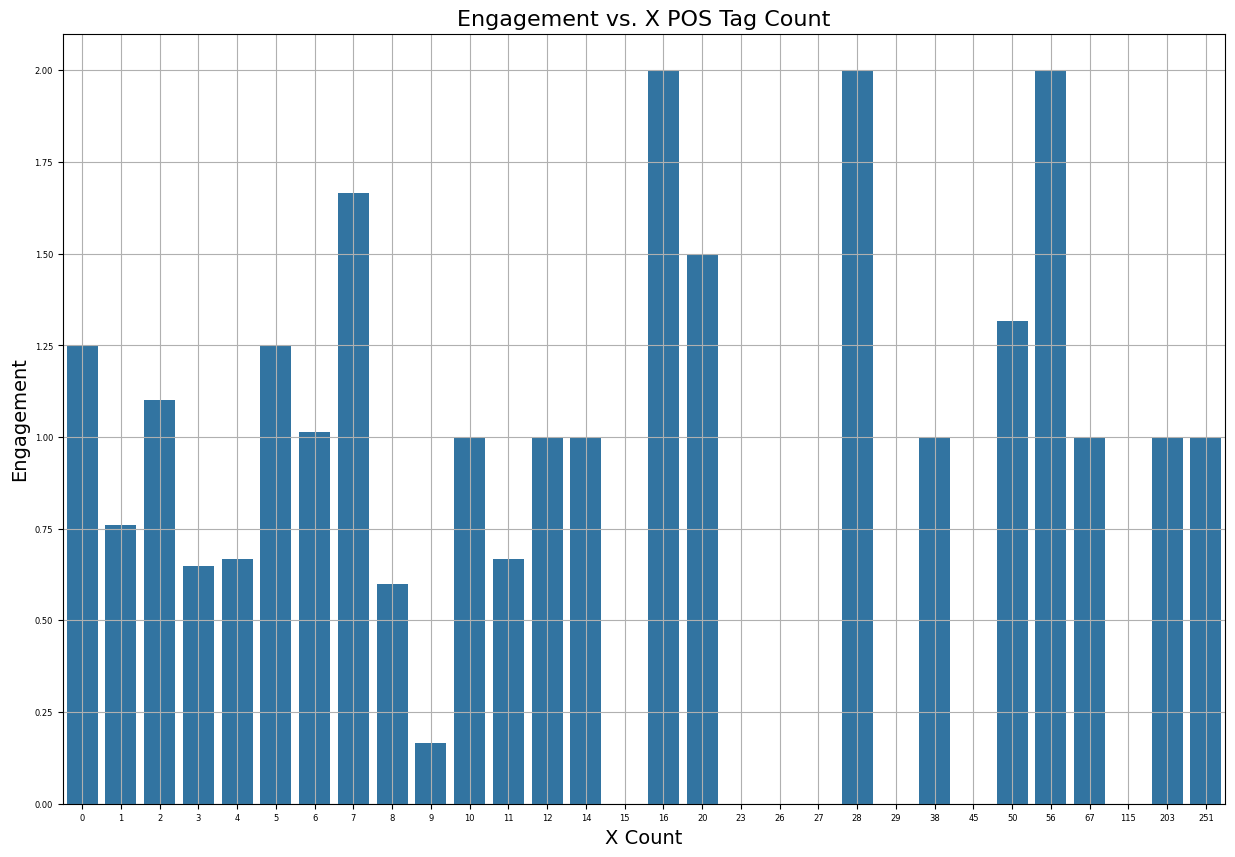

Max Value of current pos tag: 644, Associated engagement: 74    0.0
Name: engagement, dtype: float64


/var/folders/lp/thjl93cn1lg4b44b6kmtggvh0000gn/T/ipykernel_3503/2292812008.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=tag, y='engagement', data=engagement_adv_df, ci=None)


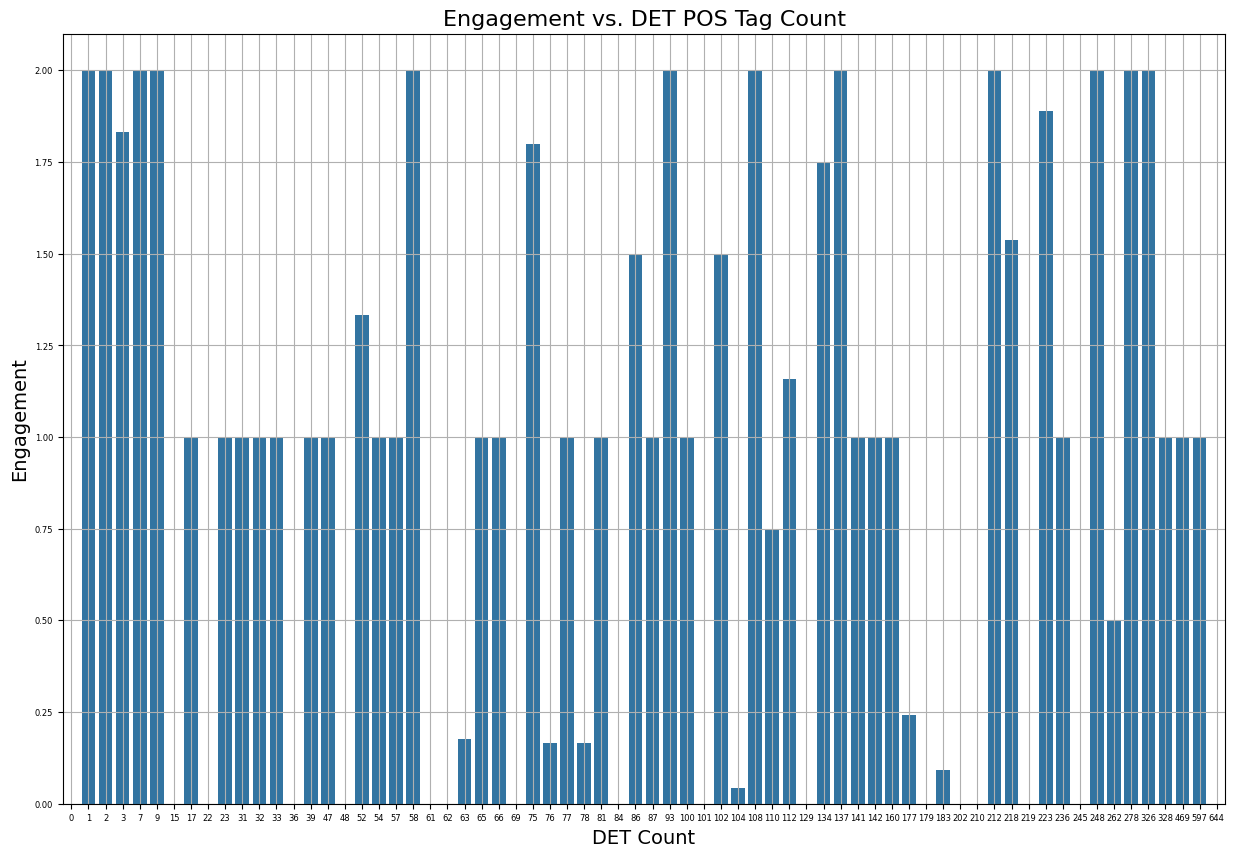

Max Value of current pos tag: 188, Associated engagement: 74    0.0
Name: engagement, dtype: float64


/var/folders/lp/thjl93cn1lg4b44b6kmtggvh0000gn/T/ipykernel_3503/2292812008.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=tag, y='engagement', data=engagement_adv_df, ci=None)


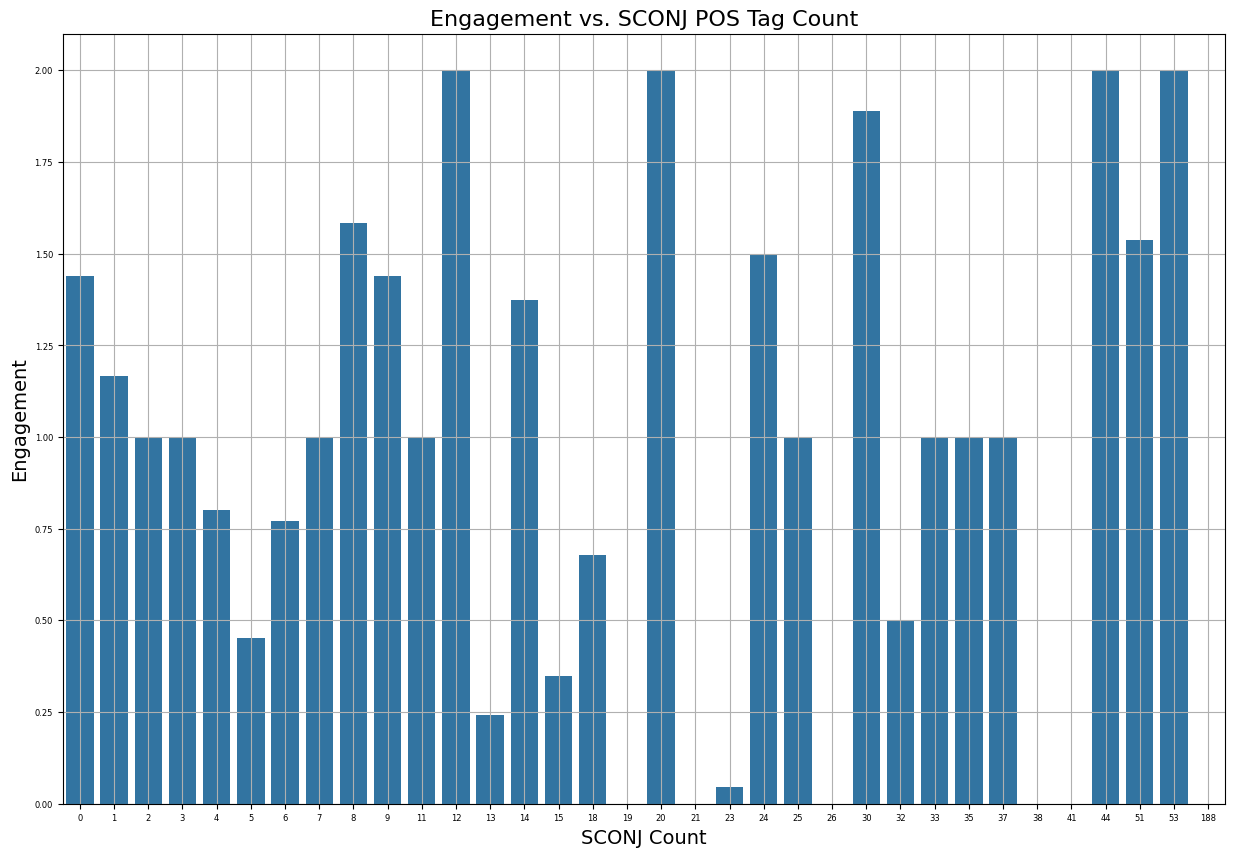

Max Value of current pos tag: 864, Associated engagement: 74    0.0
Name: engagement, dtype: float64


/var/folders/lp/thjl93cn1lg4b44b6kmtggvh0000gn/T/ipykernel_3503/2292812008.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=tag, y='engagement', data=engagement_adv_df, ci=None)


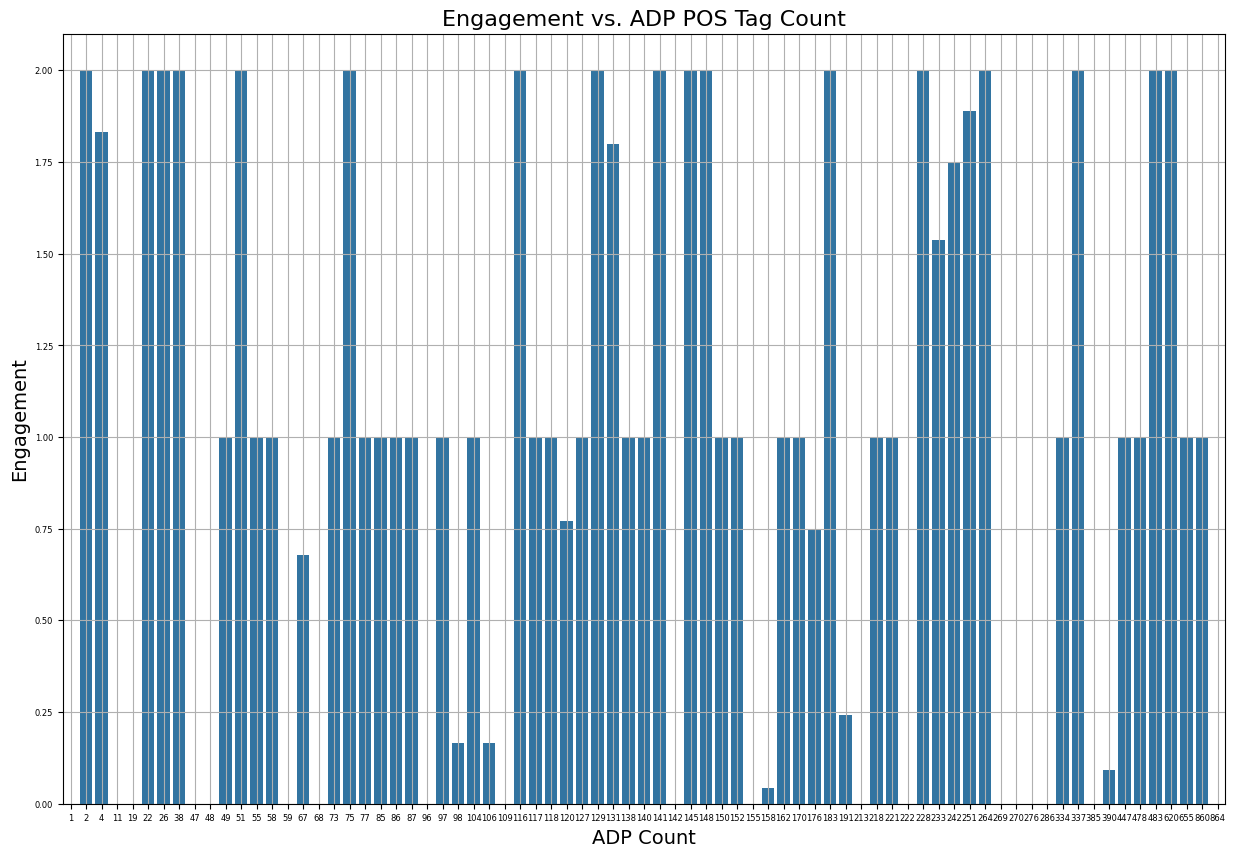

Max Value of current pos tag: 459, Associated engagement: 74    0.0
Name: engagement, dtype: float64


/var/folders/lp/thjl93cn1lg4b44b6kmtggvh0000gn/T/ipykernel_3503/2292812008.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=tag, y='engagement', data=engagement_adv_df, ci=None)


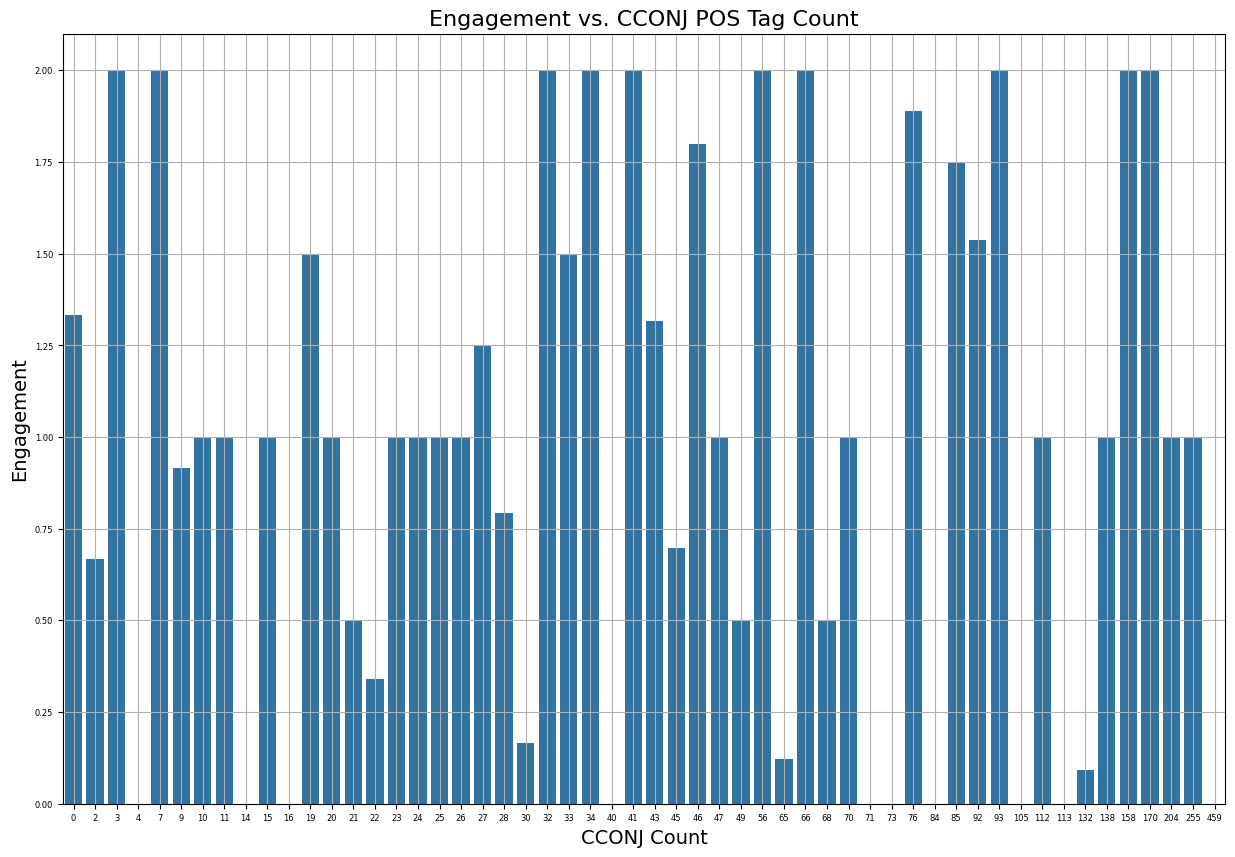

Max Value of current pos tag: 438, Associated engagement: 74    0.0
Name: engagement, dtype: float64


/var/folders/lp/thjl93cn1lg4b44b6kmtggvh0000gn/T/ipykernel_3503/2292812008.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=tag, y='engagement', data=engagement_adv_df, ci=None)


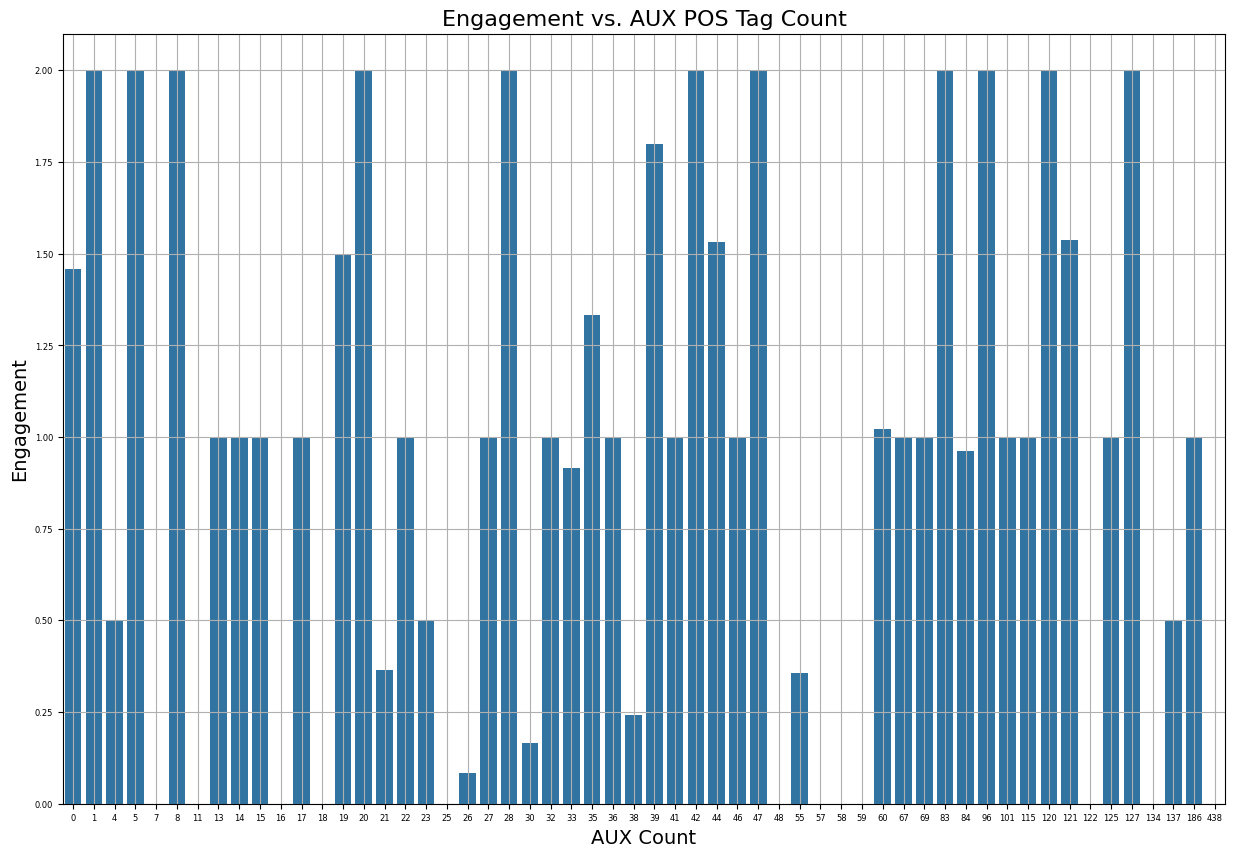

Max Value of current pos tag: 26, Associated engagement: 70    2.0
Name: engagement, dtype: float64


/var/folders/lp/thjl93cn1lg4b44b6kmtggvh0000gn/T/ipykernel_3503/2292812008.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=tag, y='engagement', data=engagement_adv_df, ci=None)


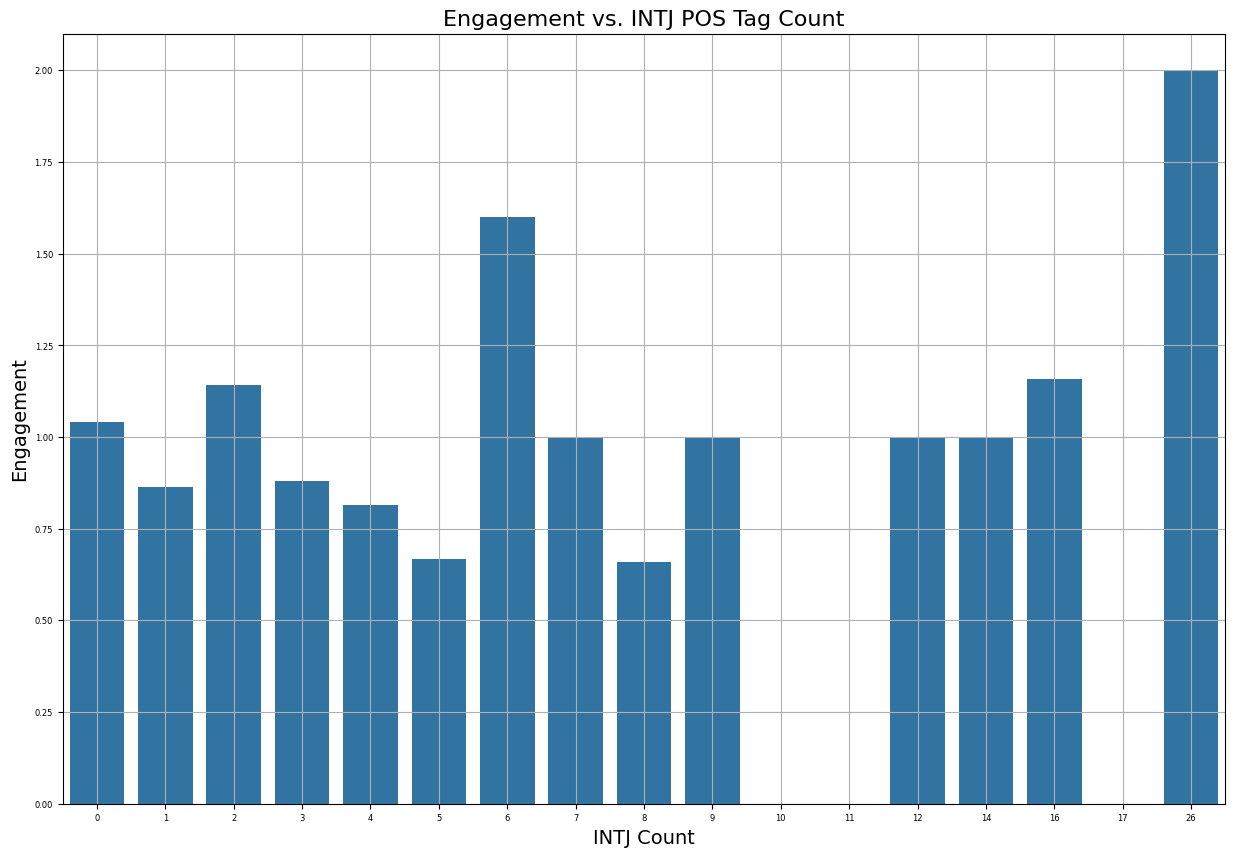

In [135]:
for tag in pos_tags:
    plotPosTags(auto_lower_engagement_df, tag)

Max Value of current pos tag: 740, Associated engagement: 17    30.826667
Name: engagement, dtype: float64


/var/folders/lp/thjl93cn1lg4b44b6kmtggvh0000gn/T/ipykernel_3503/2292812008.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=tag, y='engagement', data=engagement_adv_df, ci=None)


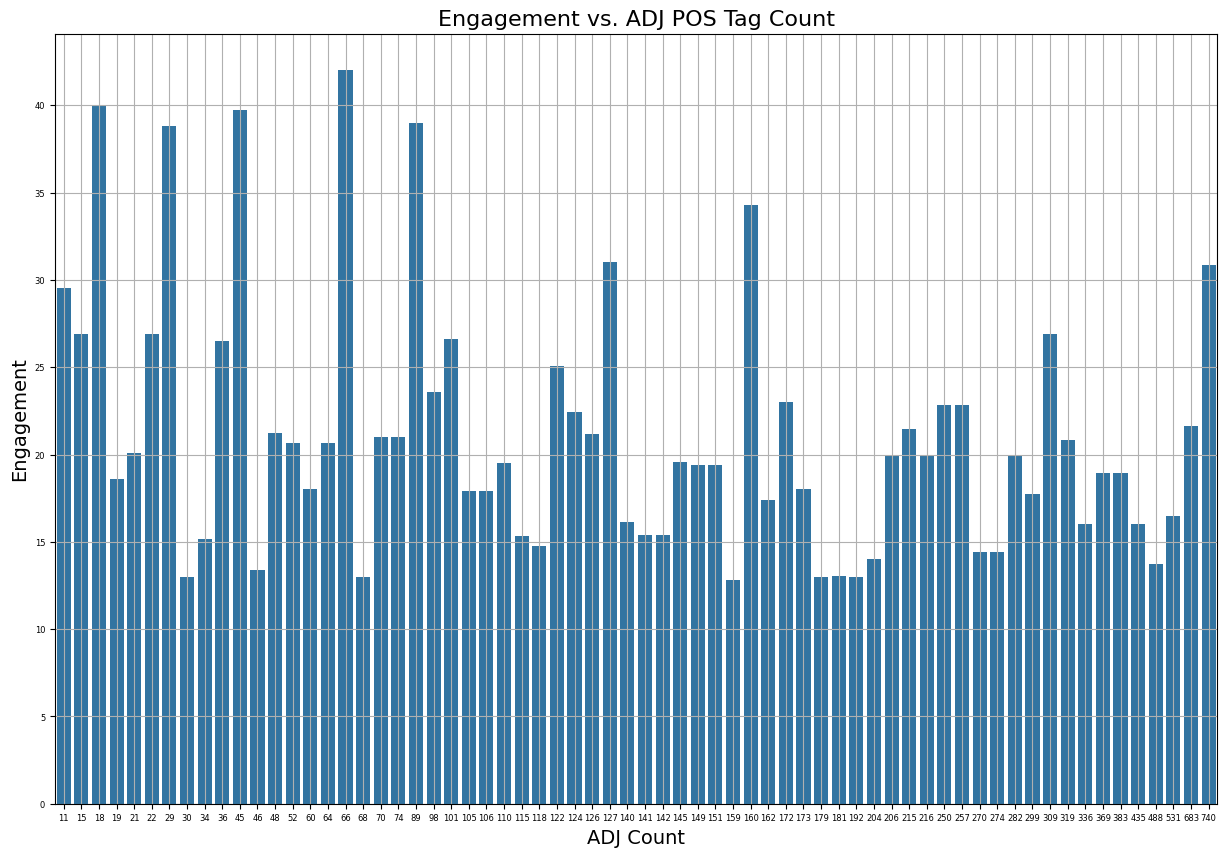

Max Value of current pos tag: 618, Associated engagement: 17    30.826667
Name: engagement, dtype: float64


/var/folders/lp/thjl93cn1lg4b44b6kmtggvh0000gn/T/ipykernel_3503/2292812008.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=tag, y='engagement', data=engagement_adv_df, ci=None)


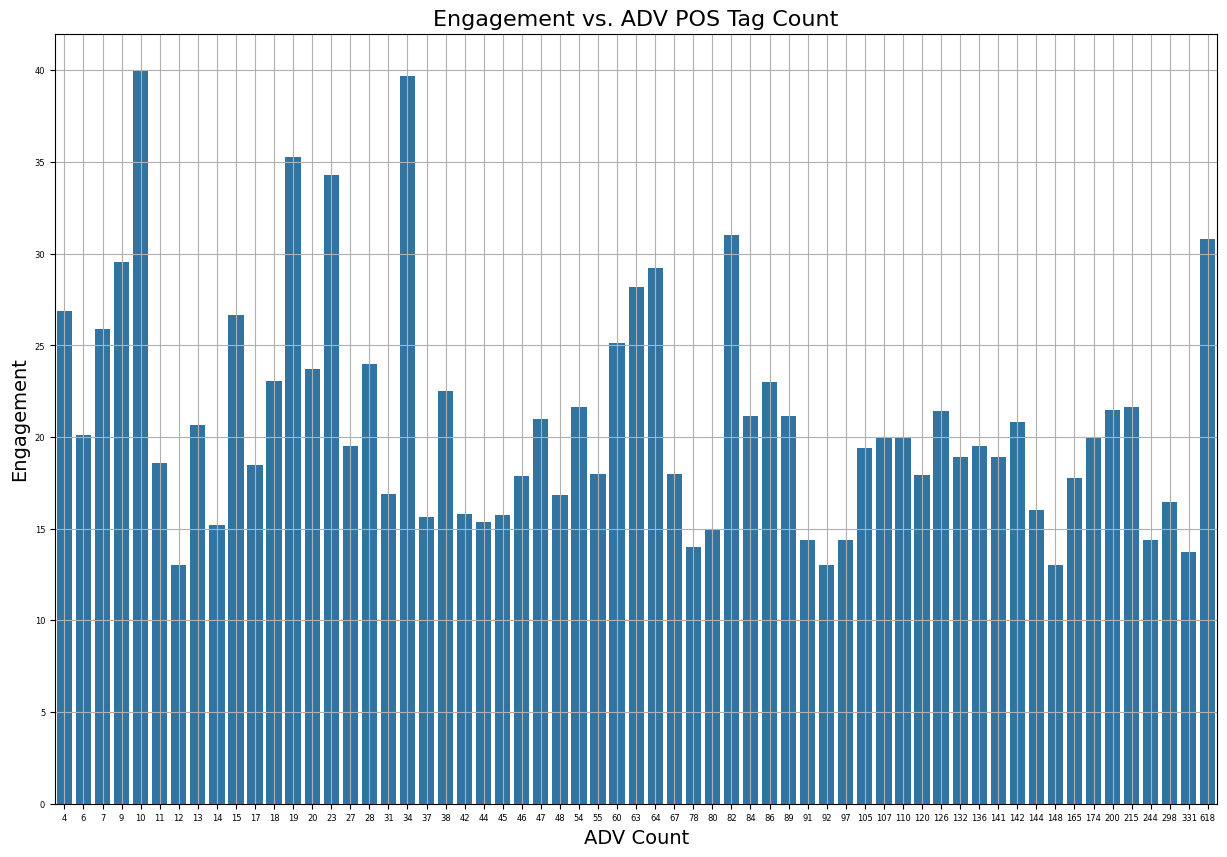

Max Value of current pos tag: 1245, Associated engagement: 17    30.826667
Name: engagement, dtype: float64


/var/folders/lp/thjl93cn1lg4b44b6kmtggvh0000gn/T/ipykernel_3503/2292812008.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=tag, y='engagement', data=engagement_adv_df, ci=None)


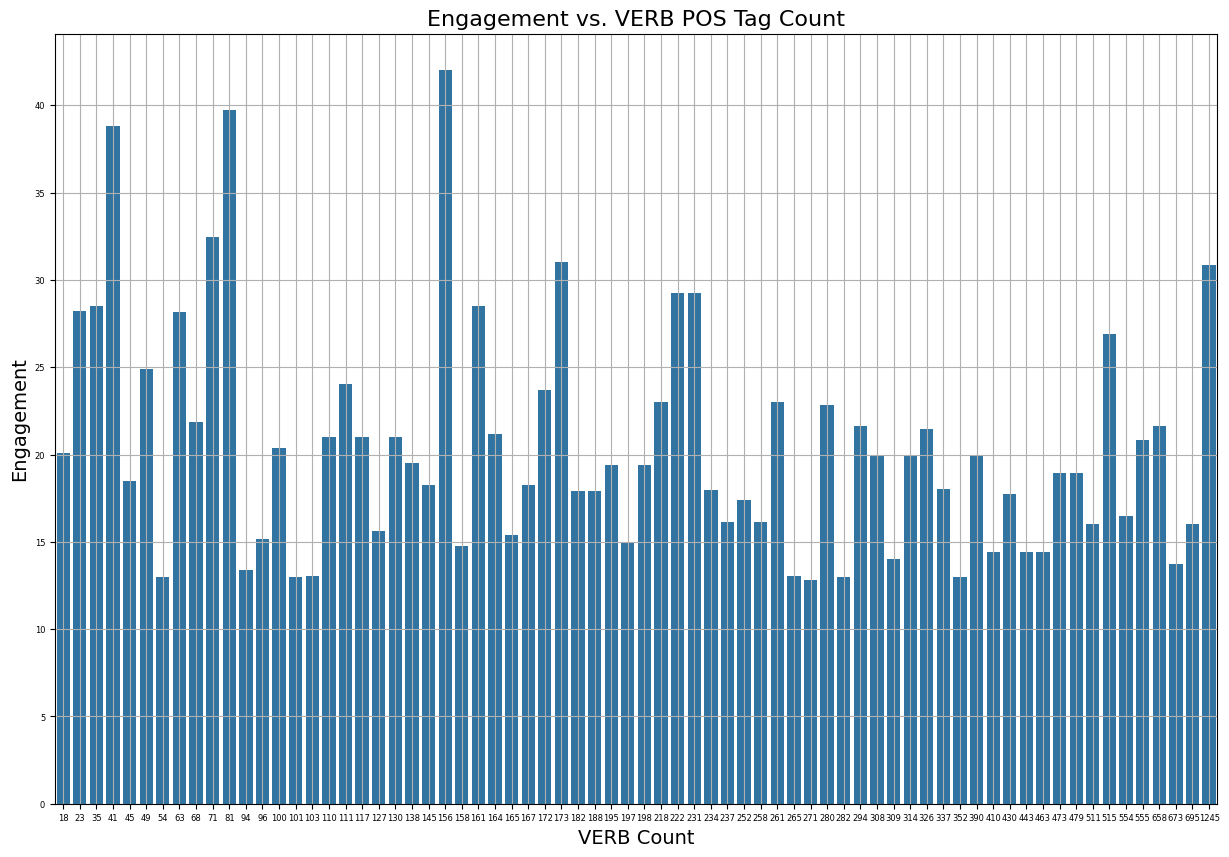

Max Value of current pos tag: 1212, Associated engagement: 17    30.826667
Name: engagement, dtype: float64


/var/folders/lp/thjl93cn1lg4b44b6kmtggvh0000gn/T/ipykernel_3503/2292812008.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=tag, y='engagement', data=engagement_adv_df, ci=None)


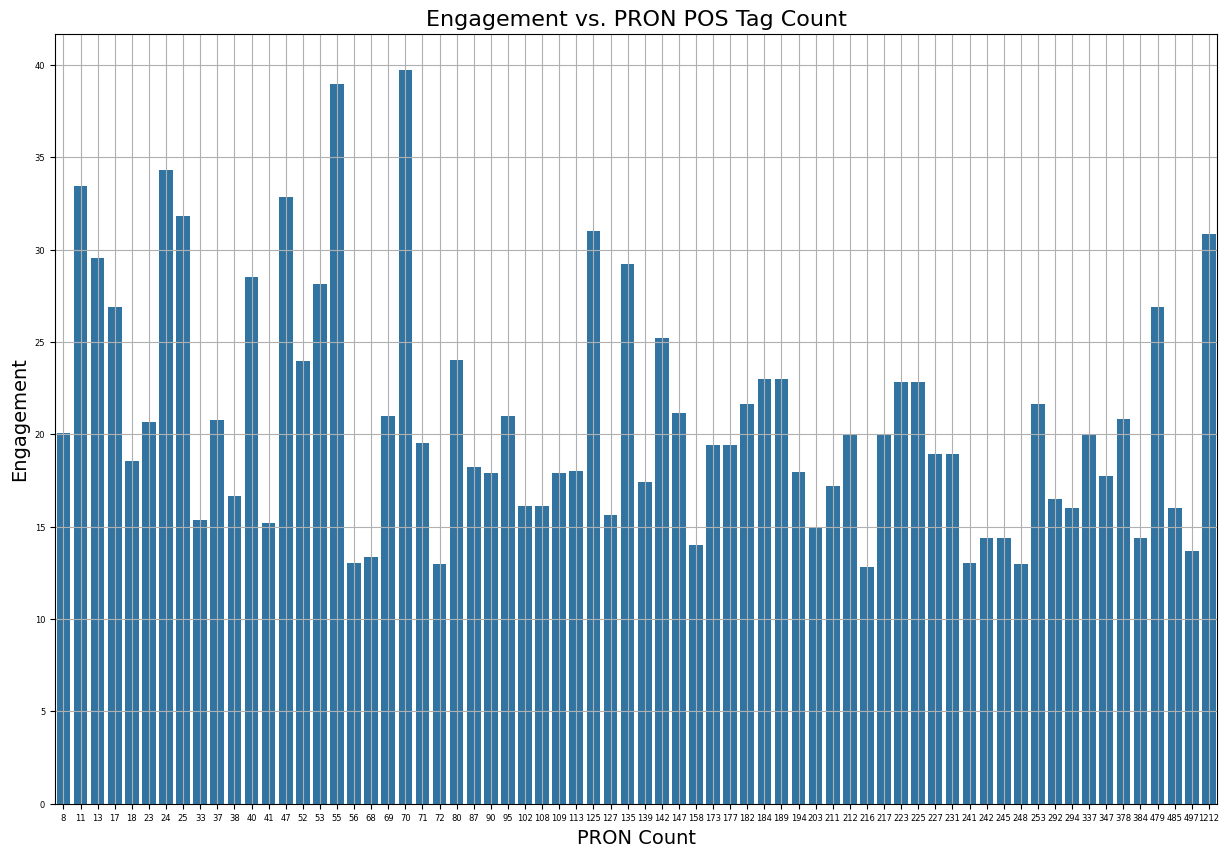

Max Value of current pos tag: 3078, Associated engagement: 67    20.826087
Name: engagement, dtype: float64


/var/folders/lp/thjl93cn1lg4b44b6kmtggvh0000gn/T/ipykernel_3503/2292812008.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=tag, y='engagement', data=engagement_adv_df, ci=None)


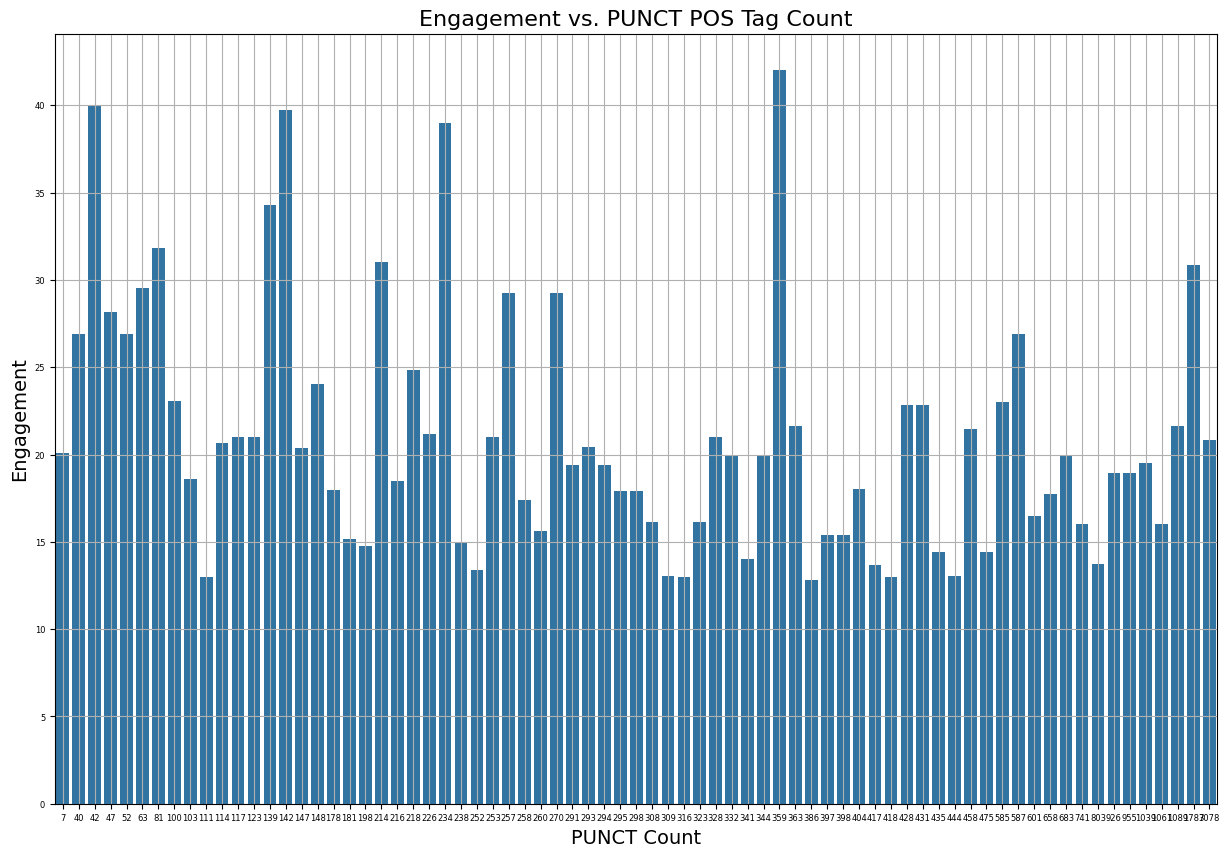

Max Value of current pos tag: 344, Associated engagement: 70    21.619403
Name: engagement, dtype: float64


/var/folders/lp/thjl93cn1lg4b44b6kmtggvh0000gn/T/ipykernel_3503/2292812008.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=tag, y='engagement', data=engagement_adv_df, ci=None)


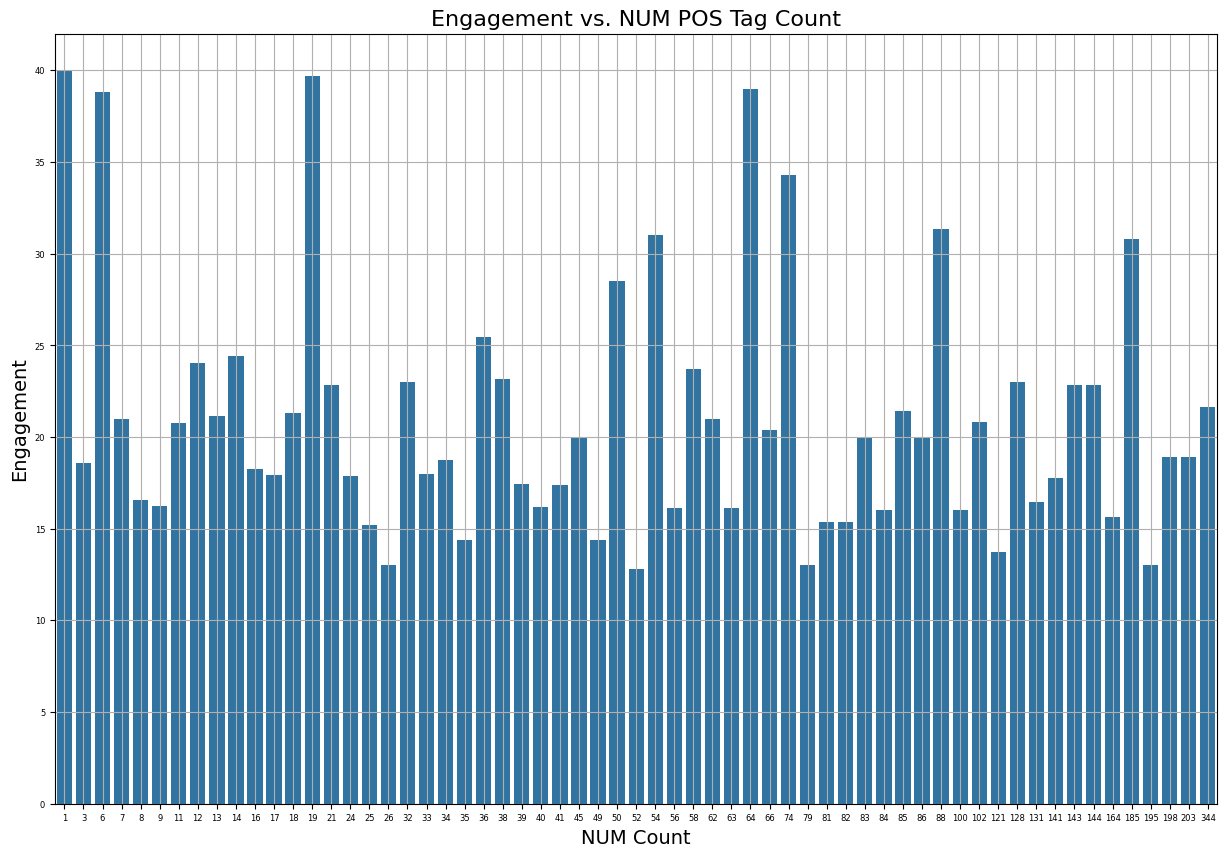

Max Value of current pos tag: 1664, Associated engagement: 70    21.619403
Name: engagement, dtype: float64


/var/folders/lp/thjl93cn1lg4b44b6kmtggvh0000gn/T/ipykernel_3503/2292812008.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=tag, y='engagement', data=engagement_adv_df, ci=None)


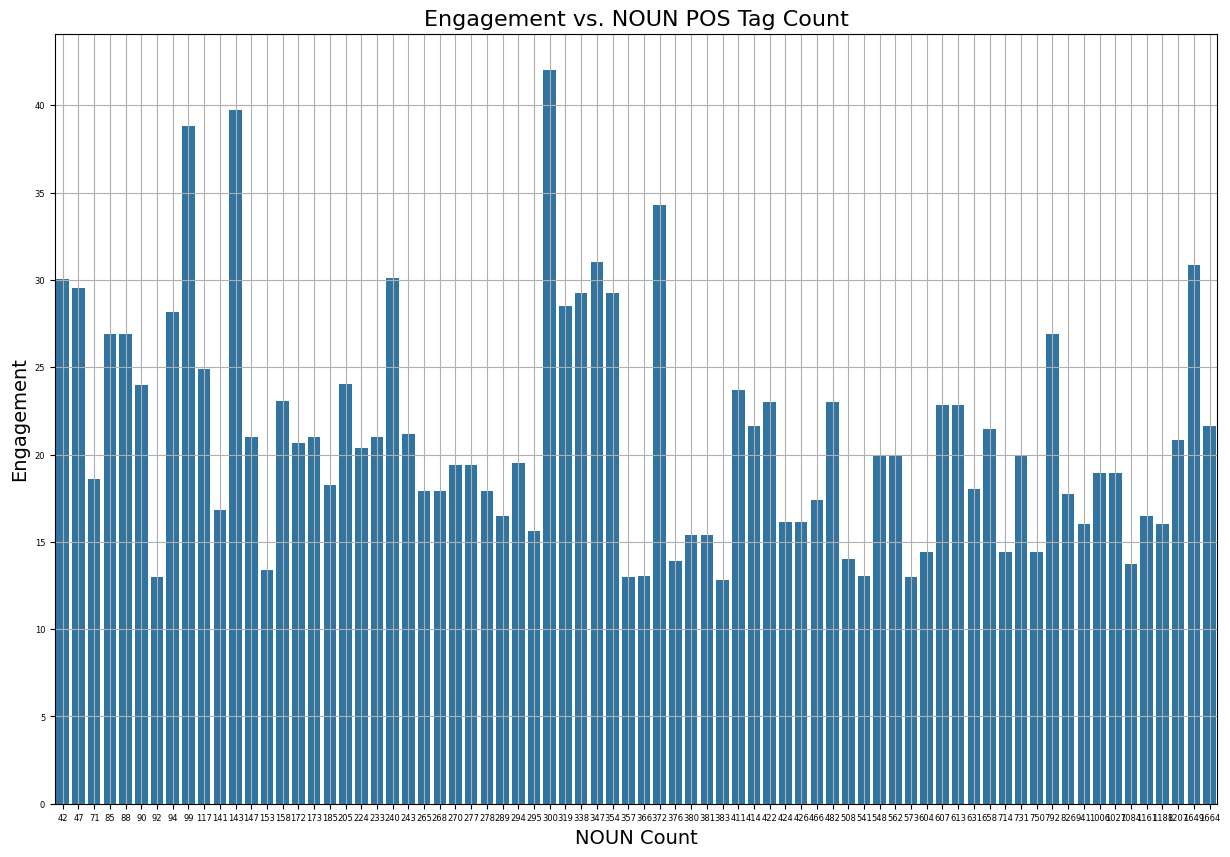

Max Value of current pos tag: 338, Associated engagement: 17    30.826667
Name: engagement, dtype: float64


/var/folders/lp/thjl93cn1lg4b44b6kmtggvh0000gn/T/ipykernel_3503/2292812008.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=tag, y='engagement', data=engagement_adv_df, ci=None)


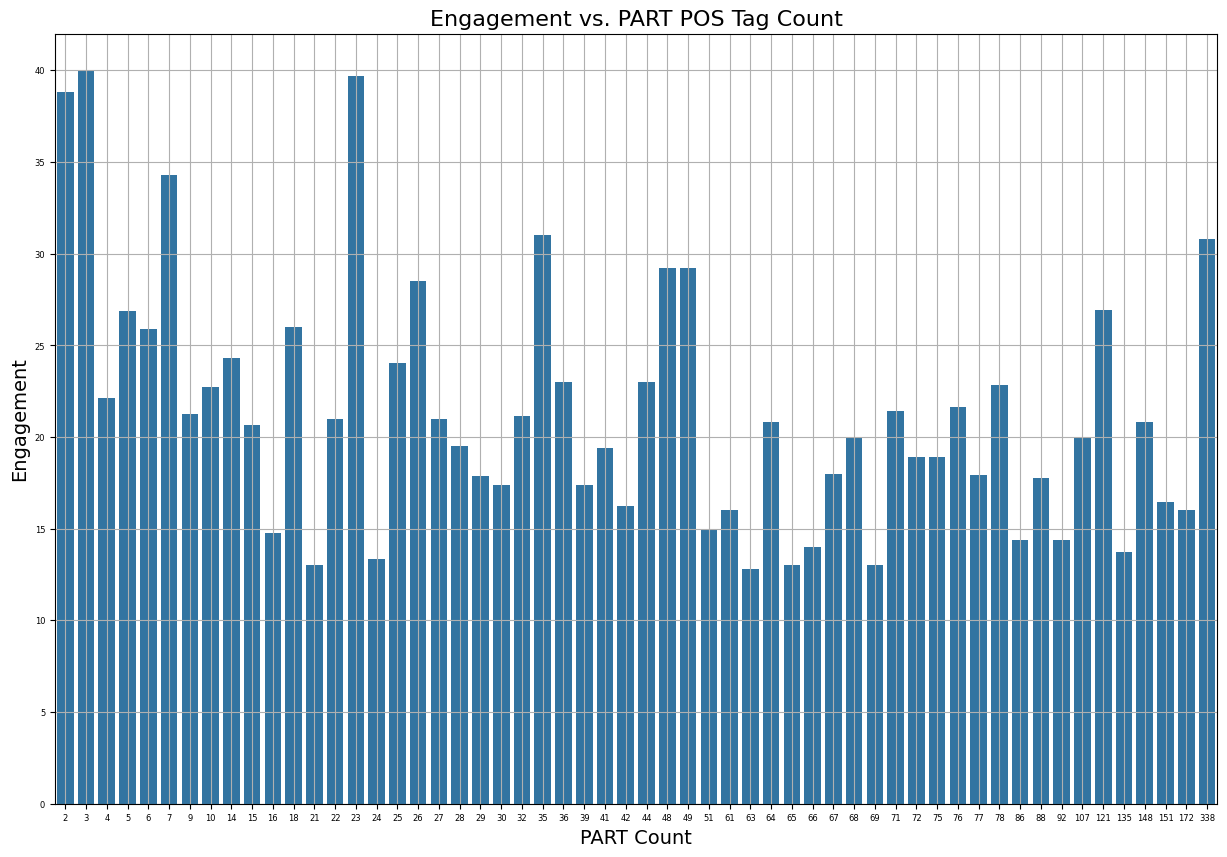

Max Value of current pos tag: 967, Associated engagement: 2    18.934426
Name: engagement, dtype: float64


/var/folders/lp/thjl93cn1lg4b44b6kmtggvh0000gn/T/ipykernel_3503/2292812008.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=tag, y='engagement', data=engagement_adv_df, ci=None)


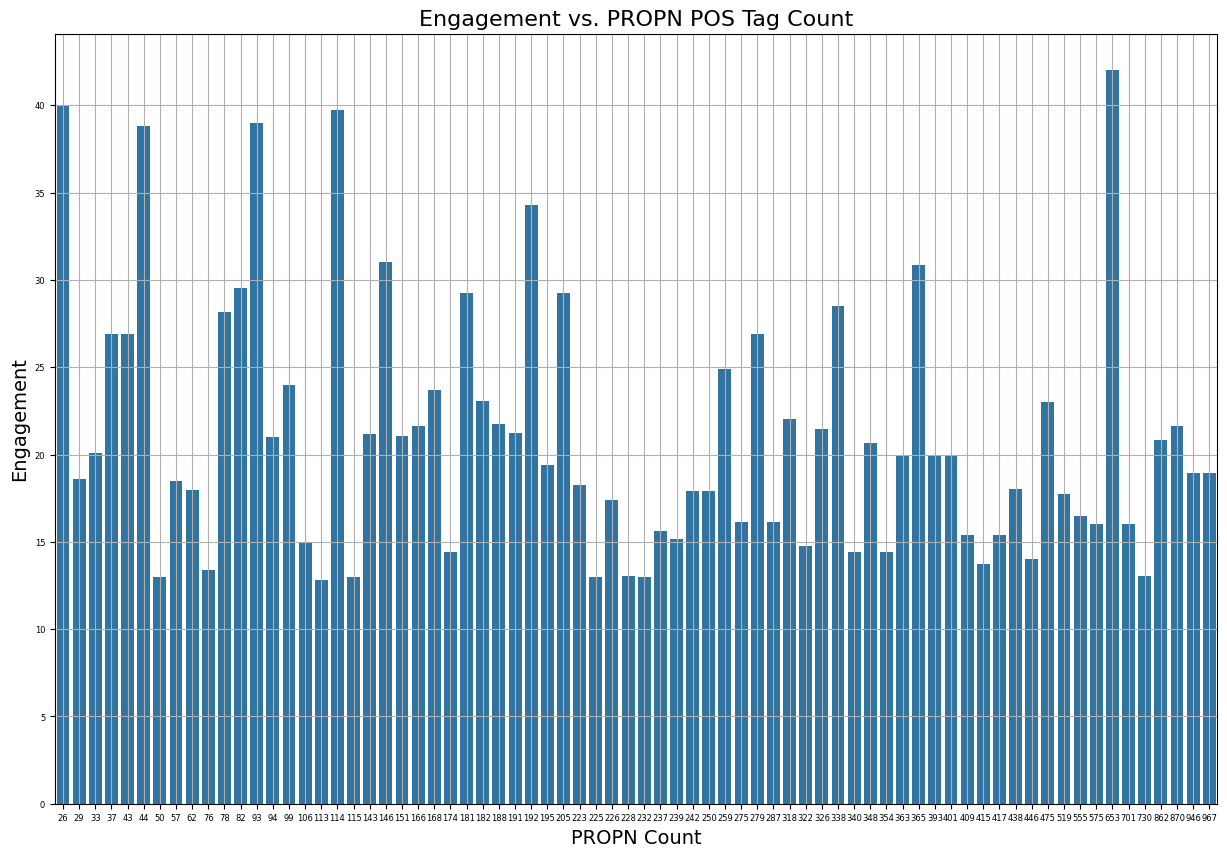

Max Value of current pos tag: 32, Associated engagement: 25    15.625
Name: engagement, dtype: float64


/var/folders/lp/thjl93cn1lg4b44b6kmtggvh0000gn/T/ipykernel_3503/2292812008.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=tag, y='engagement', data=engagement_adv_df, ci=None)


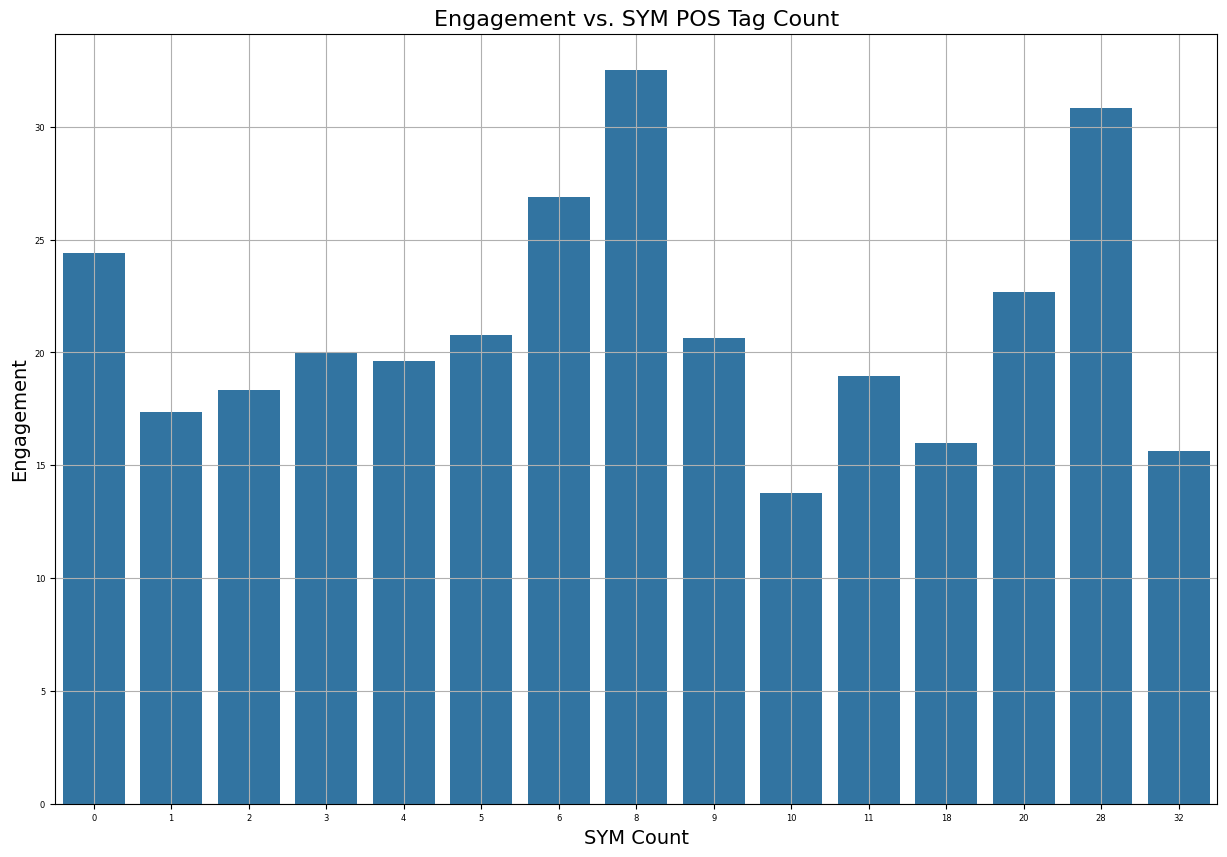

Max Value of current pos tag: 70, Associated engagement: 55    13.022388
Name: engagement, dtype: float64


/var/folders/lp/thjl93cn1lg4b44b6kmtggvh0000gn/T/ipykernel_3503/2292812008.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=tag, y='engagement', data=engagement_adv_df, ci=None)


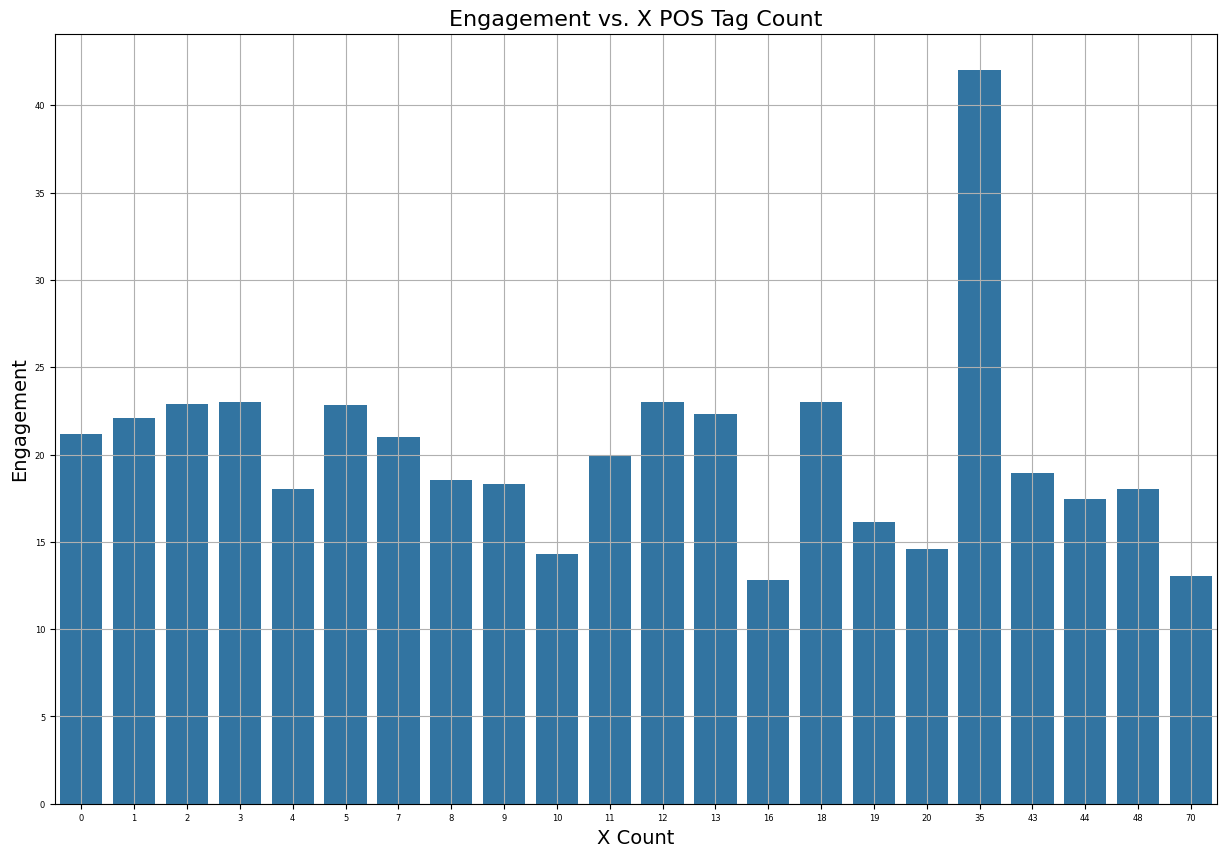

Max Value of current pos tag: 850, Associated engagement: 17    30.826667
Name: engagement, dtype: float64


/var/folders/lp/thjl93cn1lg4b44b6kmtggvh0000gn/T/ipykernel_3503/2292812008.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=tag, y='engagement', data=engagement_adv_df, ci=None)


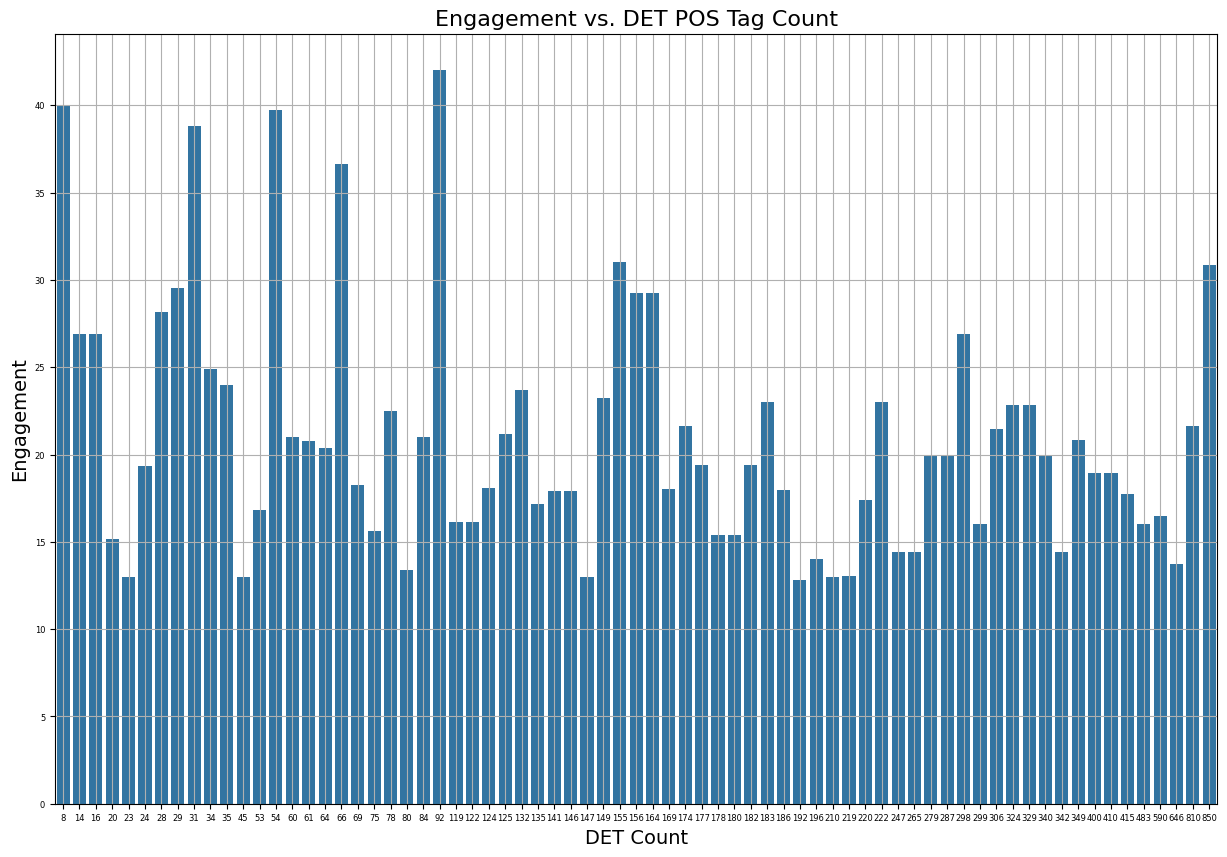

Max Value of current pos tag: 239, Associated engagement: 17    30.826667
Name: engagement, dtype: float64


/var/folders/lp/thjl93cn1lg4b44b6kmtggvh0000gn/T/ipykernel_3503/2292812008.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=tag, y='engagement', data=engagement_adv_df, ci=None)


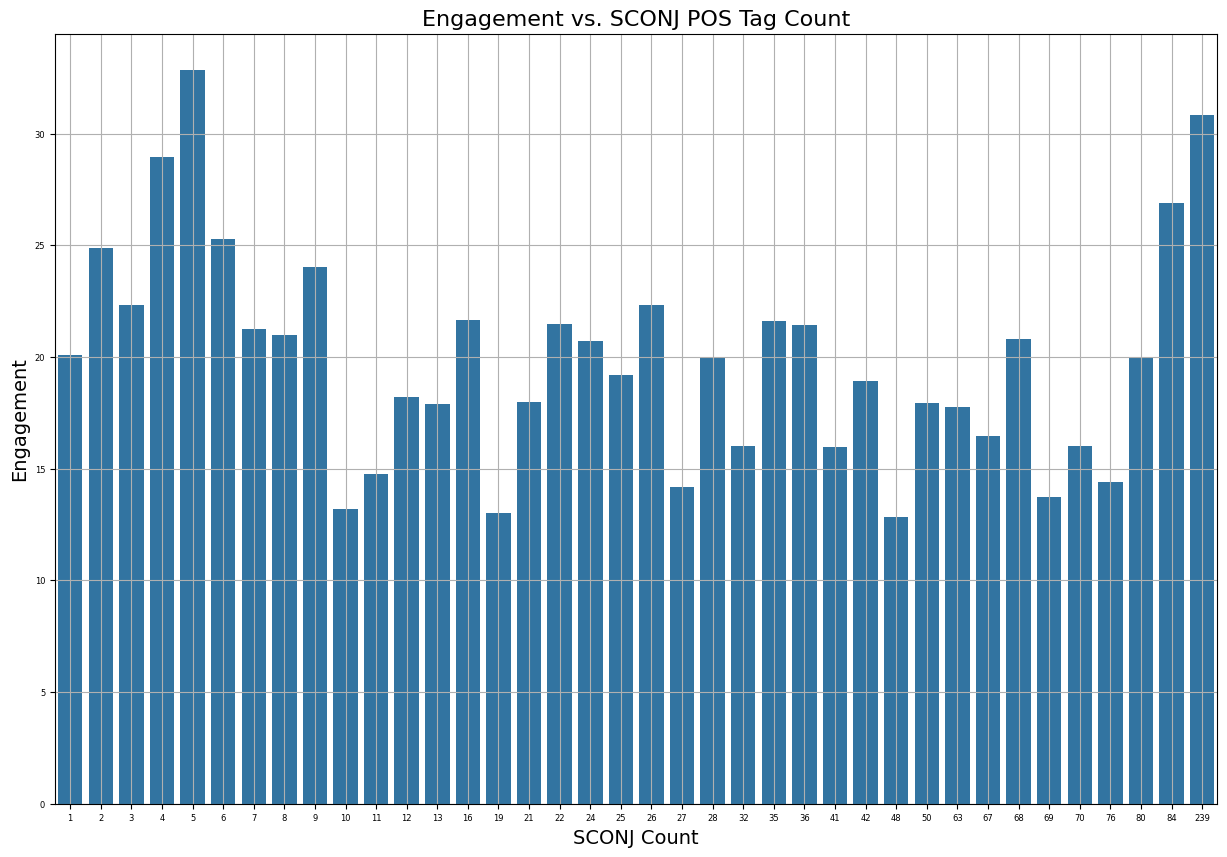

Max Value of current pos tag: 789, Associated engagement: 17    30.826667
Name: engagement, dtype: float64


/var/folders/lp/thjl93cn1lg4b44b6kmtggvh0000gn/T/ipykernel_3503/2292812008.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=tag, y='engagement', data=engagement_adv_df, ci=None)


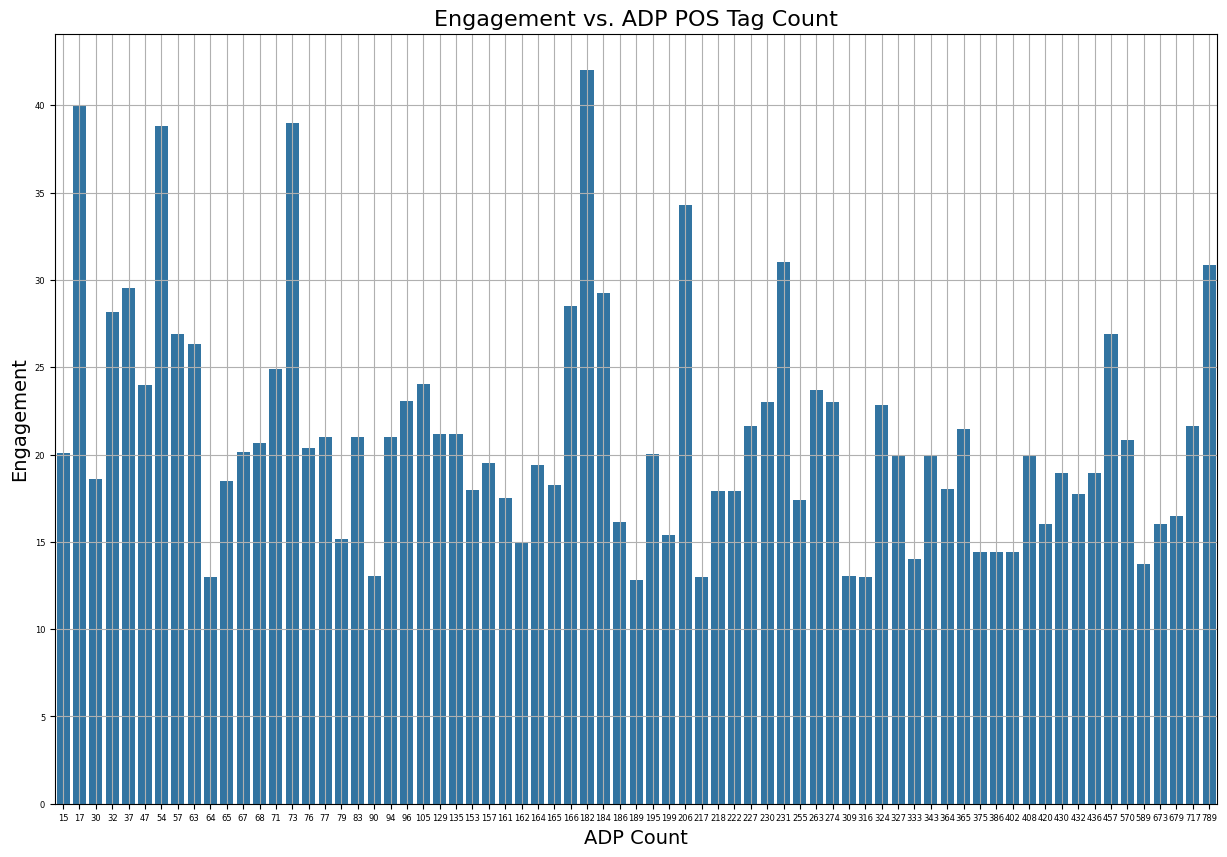

Max Value of current pos tag: 321, Associated engagement: 17    30.826667
Name: engagement, dtype: float64


/var/folders/lp/thjl93cn1lg4b44b6kmtggvh0000gn/T/ipykernel_3503/2292812008.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=tag, y='engagement', data=engagement_adv_df, ci=None)


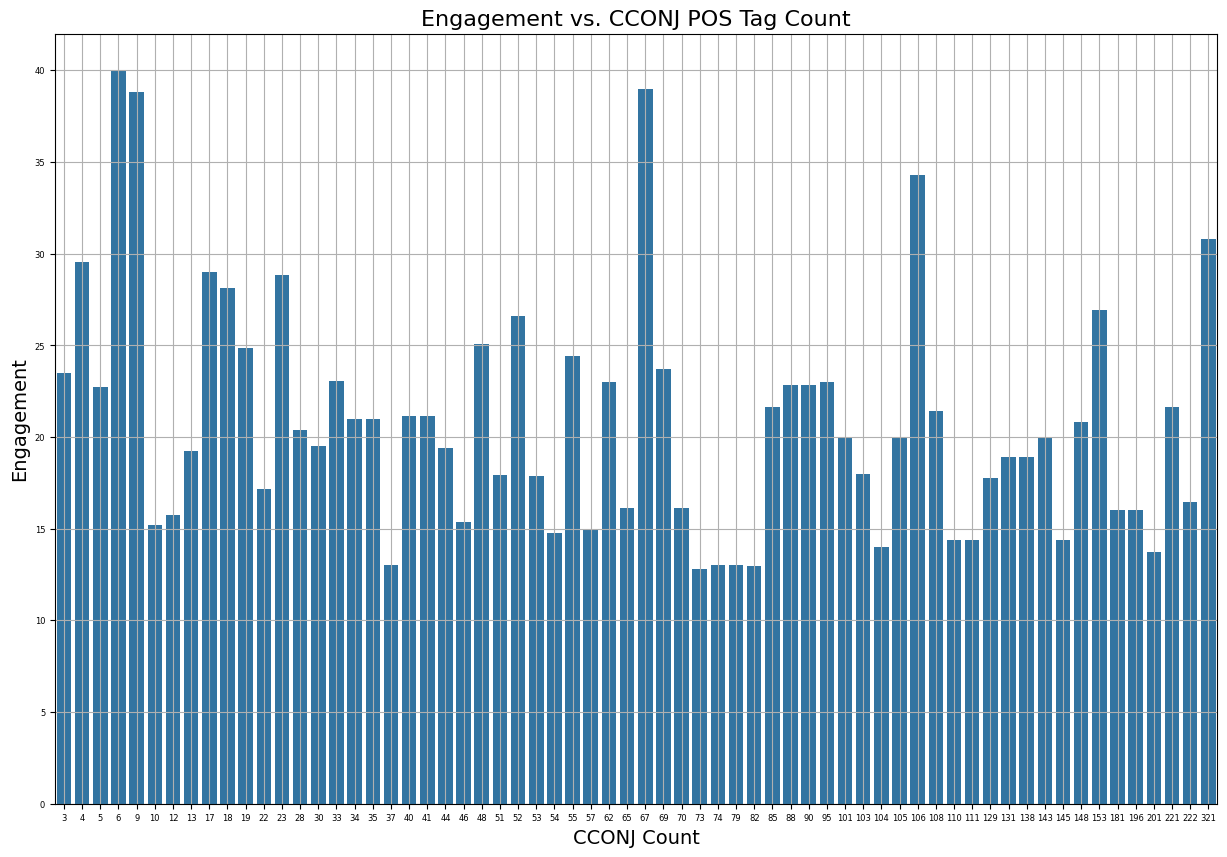

Max Value of current pos tag: 691, Associated engagement: 17    30.826667
Name: engagement, dtype: float64


/var/folders/lp/thjl93cn1lg4b44b6kmtggvh0000gn/T/ipykernel_3503/2292812008.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=tag, y='engagement', data=engagement_adv_df, ci=None)


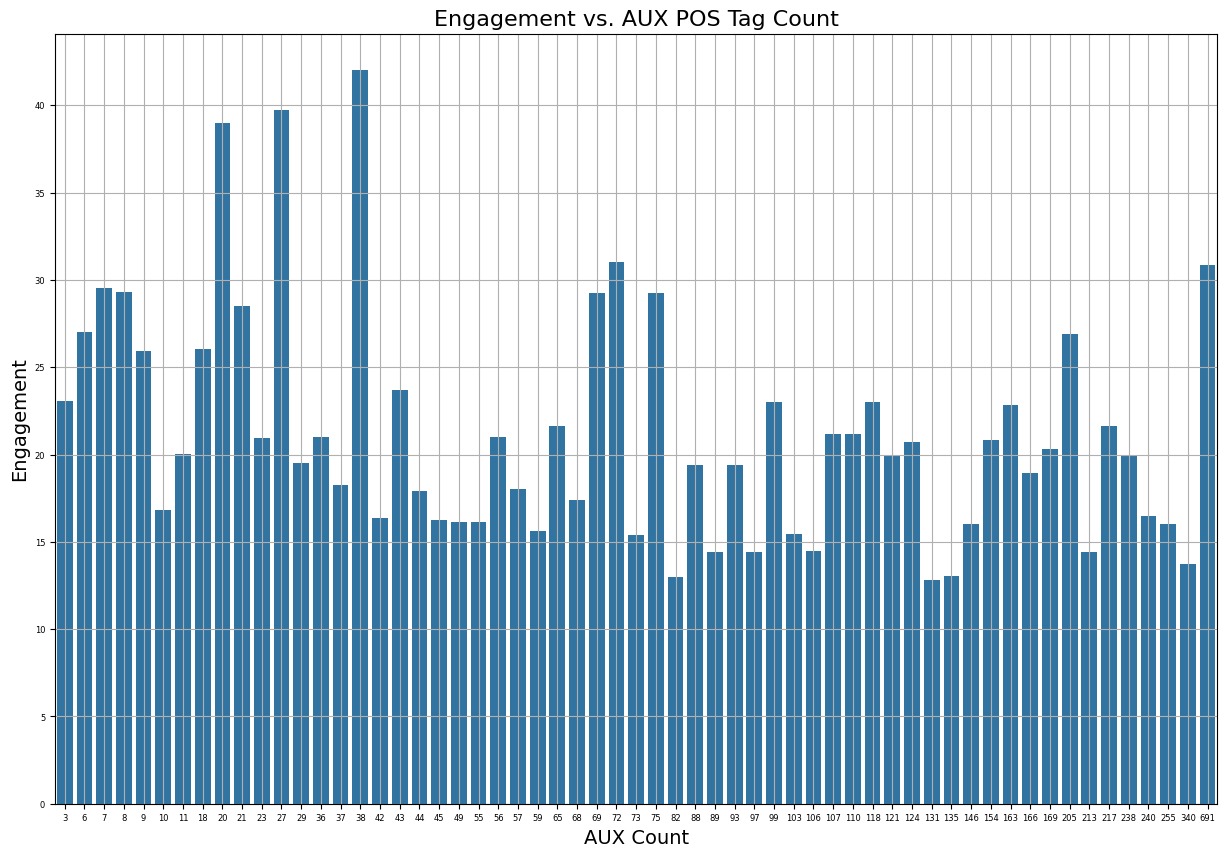

Max Value of current pos tag: 25, Associated engagement: 17    30.826667
Name: engagement, dtype: float64


/var/folders/lp/thjl93cn1lg4b44b6kmtggvh0000gn/T/ipykernel_3503/2292812008.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=tag, y='engagement', data=engagement_adv_df, ci=None)


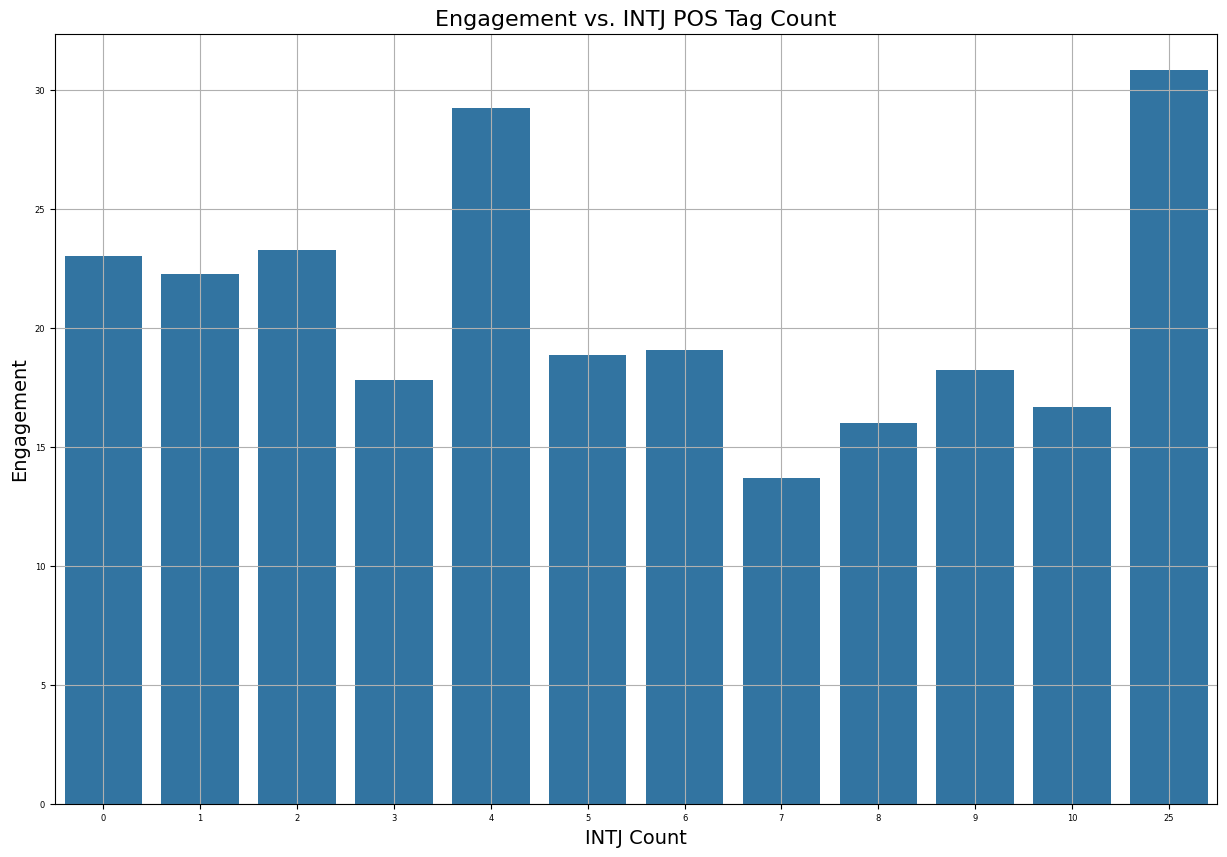

In [136]:
for tag in pos_tags:
    plotPosTags(auto_higher_engagement_df, tag)

Max Value of current pos tag: 799, Associated engagement: 5    0.003177
Name: engagement, dtype: float64


/var/folders/lp/thjl93cn1lg4b44b6kmtggvh0000gn/T/ipykernel_3503/2292812008.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=tag, y='engagement', data=engagement_adv_df, ci=None)


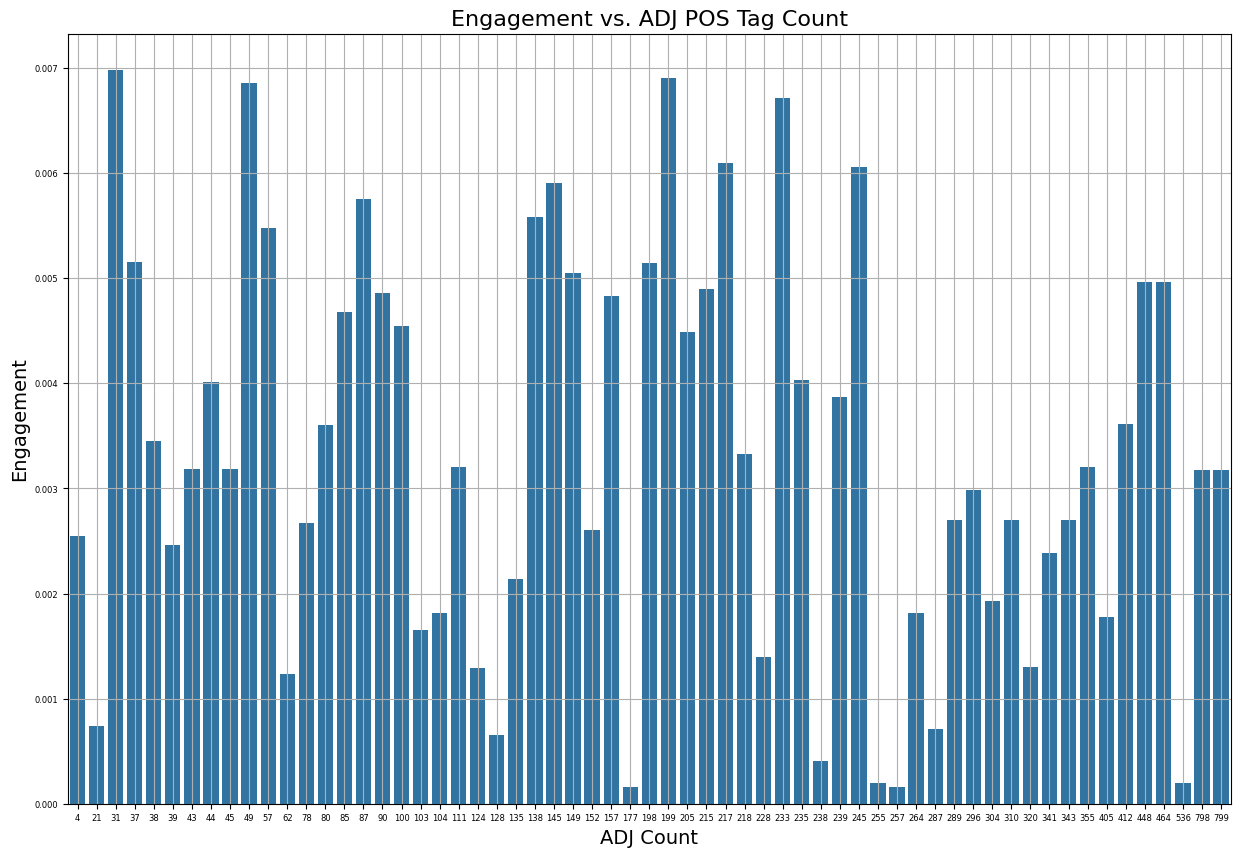

Max Value of current pos tag: 392, Associated engagement: 5    0.003177
Name: engagement, dtype: float64


/var/folders/lp/thjl93cn1lg4b44b6kmtggvh0000gn/T/ipykernel_3503/2292812008.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=tag, y='engagement', data=engagement_adv_df, ci=None)


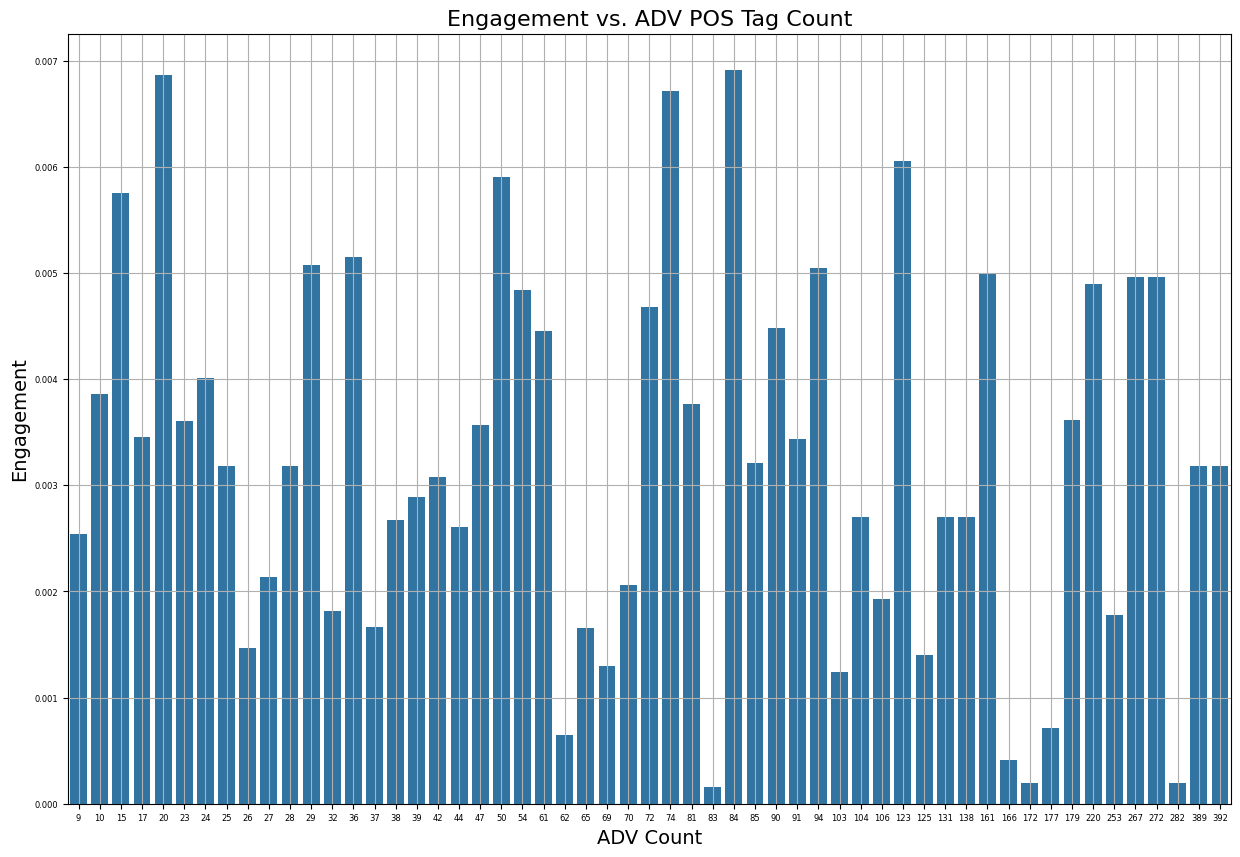

Max Value of current pos tag: 1106, Associated engagement: 48    0.003177
Name: engagement, dtype: float64


/var/folders/lp/thjl93cn1lg4b44b6kmtggvh0000gn/T/ipykernel_3503/2292812008.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=tag, y='engagement', data=engagement_adv_df, ci=None)


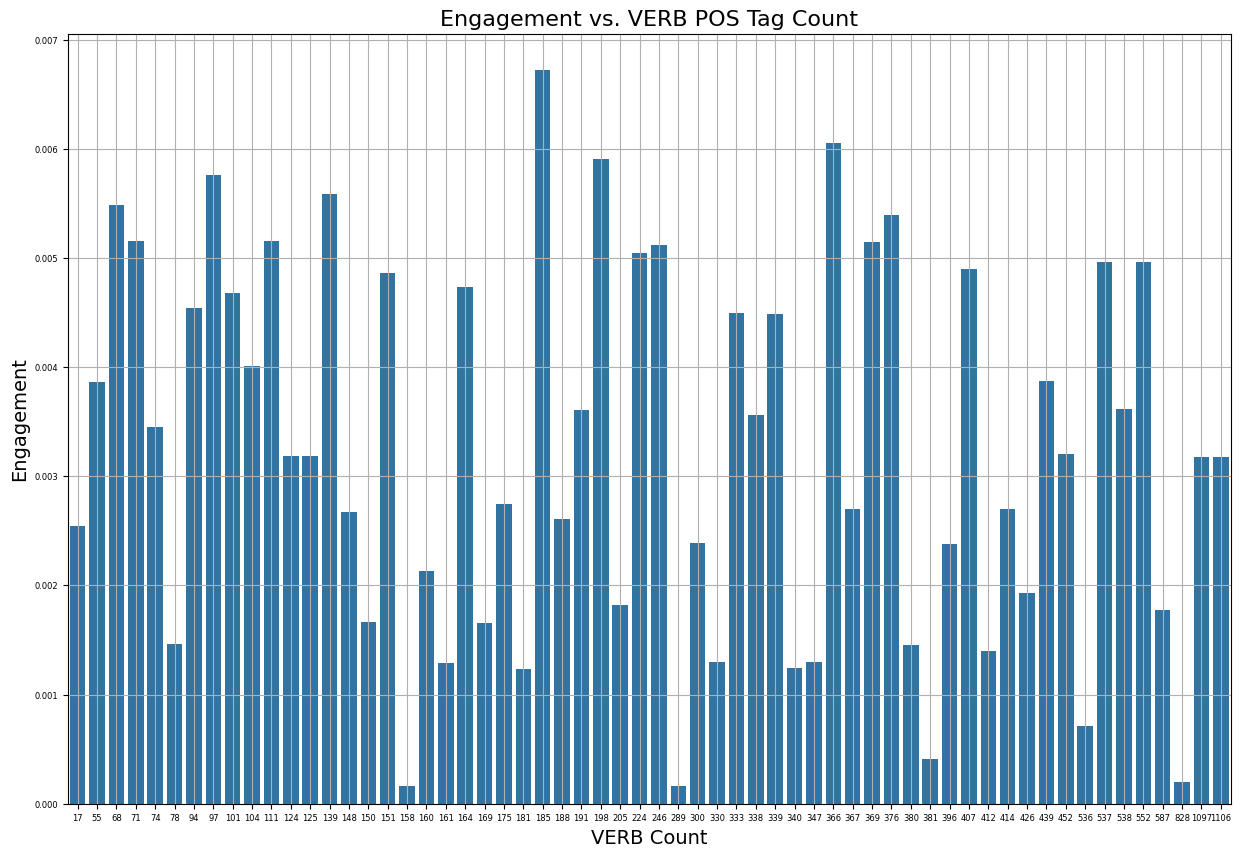

Max Value of current pos tag: 706, Associated engagement: 5    0.003177
Name: engagement, dtype: float64


/var/folders/lp/thjl93cn1lg4b44b6kmtggvh0000gn/T/ipykernel_3503/2292812008.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=tag, y='engagement', data=engagement_adv_df, ci=None)


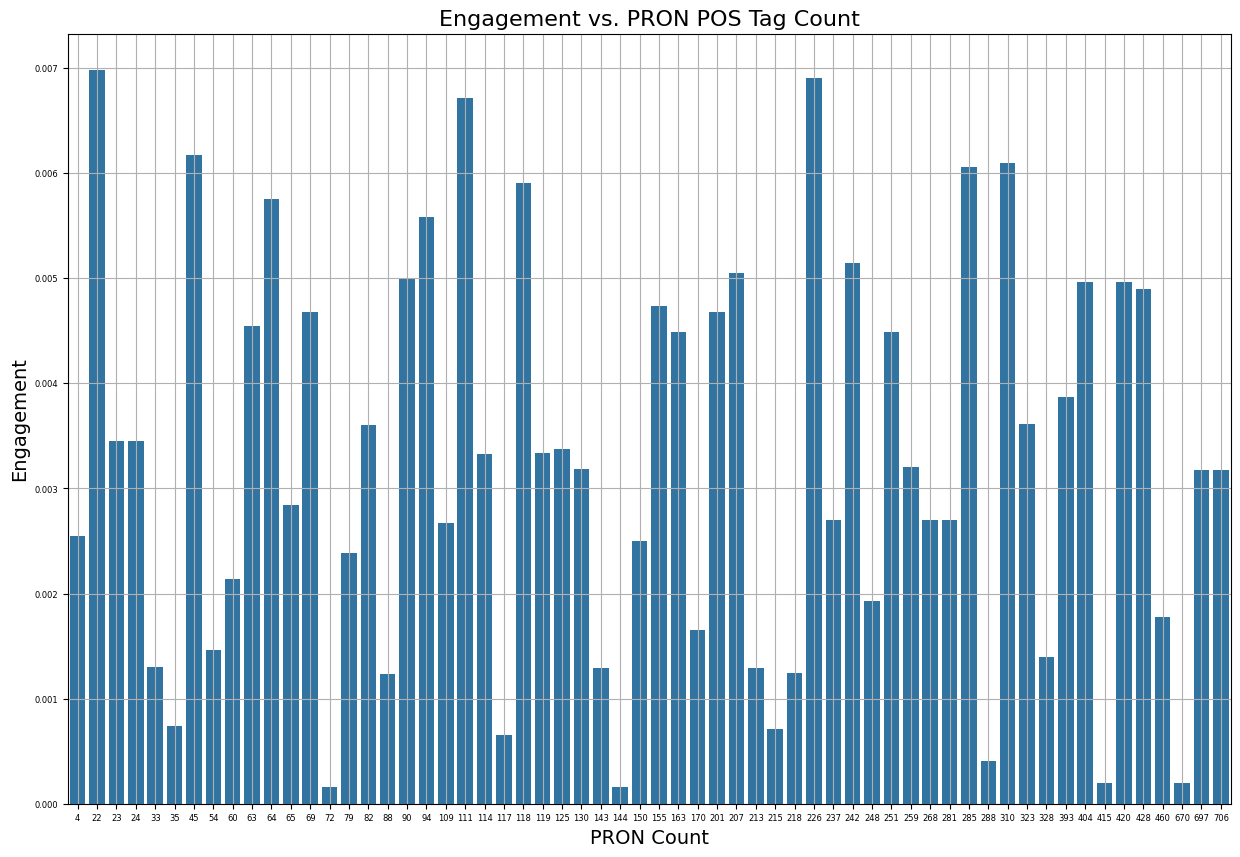

Max Value of current pos tag: 1675, Associated engagement: 9    0.002381
Name: engagement, dtype: float64


/var/folders/lp/thjl93cn1lg4b44b6kmtggvh0000gn/T/ipykernel_3503/2292812008.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=tag, y='engagement', data=engagement_adv_df, ci=None)


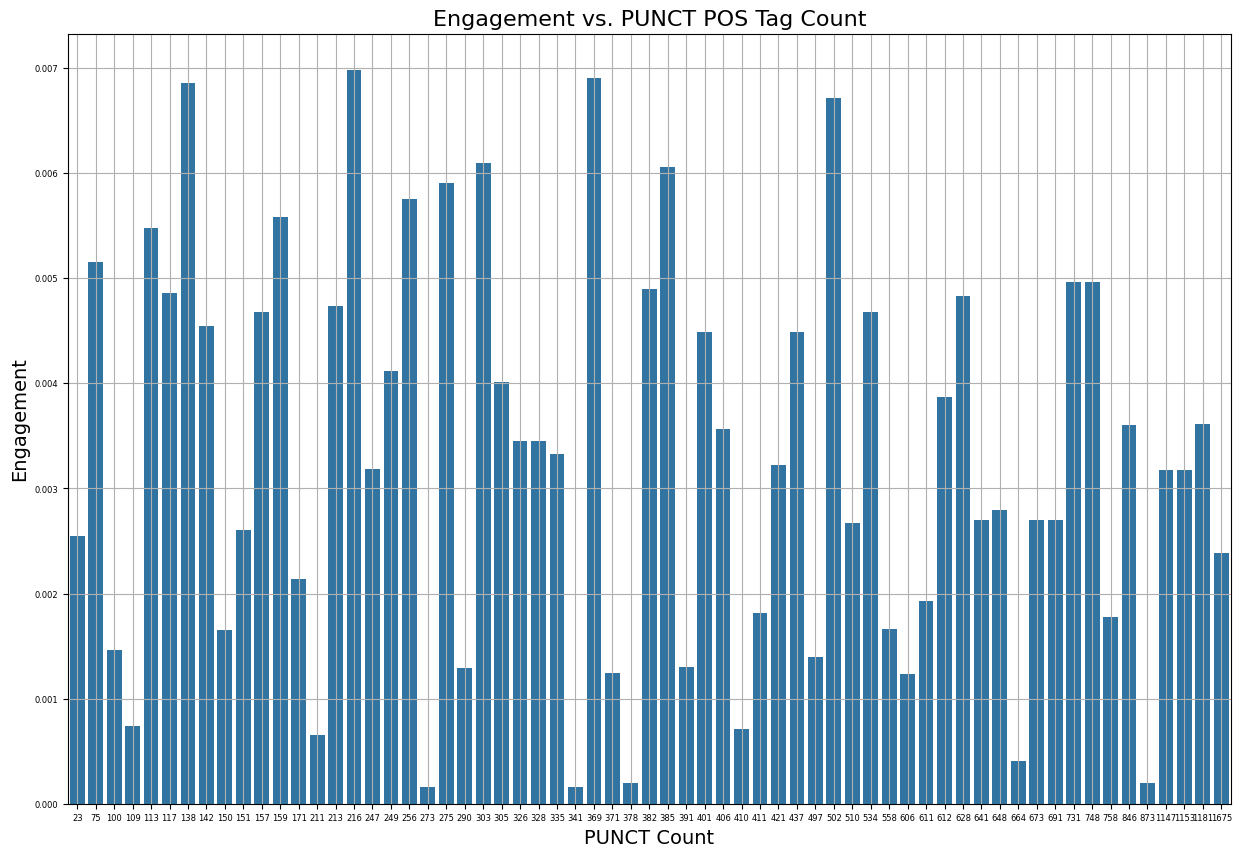

Max Value of current pos tag: 310, Associated engagement: 33    0.006718
Name: engagement, dtype: float64


/var/folders/lp/thjl93cn1lg4b44b6kmtggvh0000gn/T/ipykernel_3503/2292812008.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=tag, y='engagement', data=engagement_adv_df, ci=None)


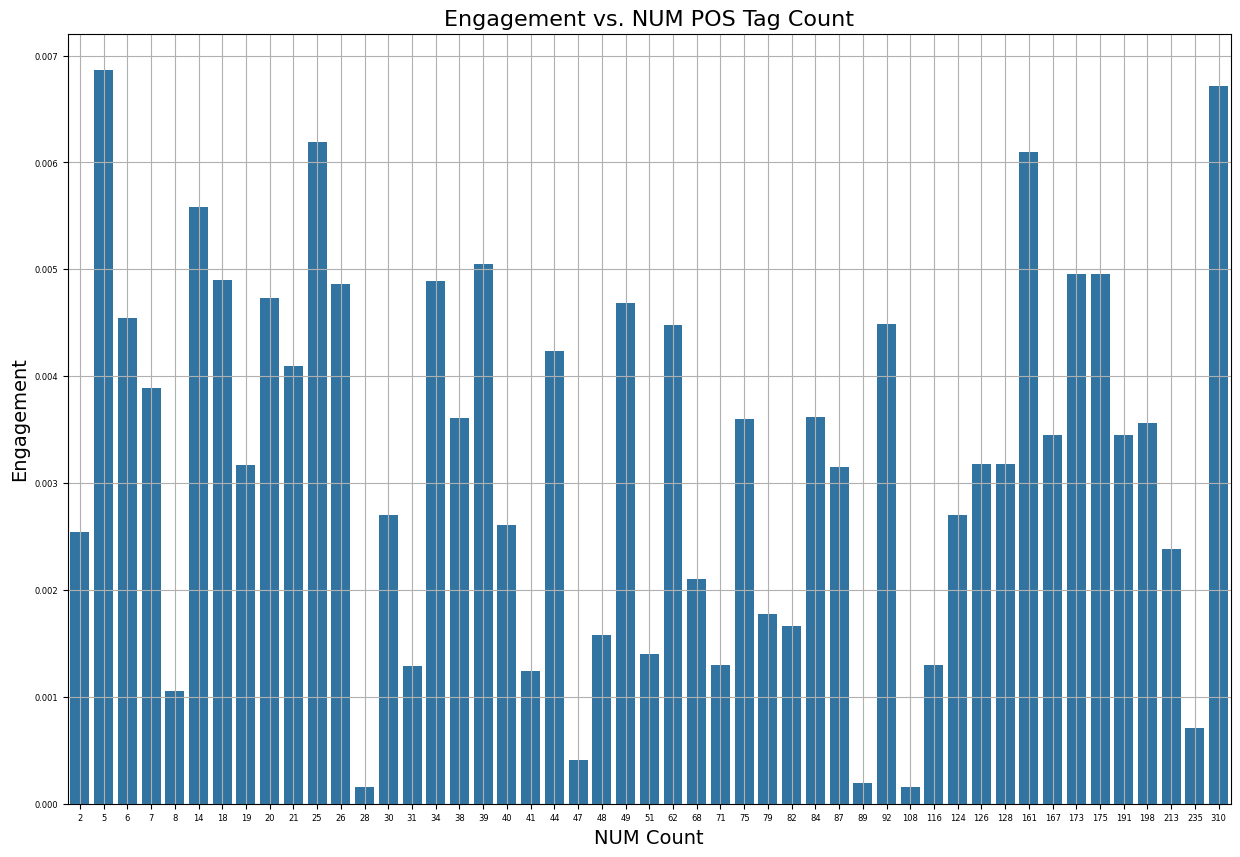

Max Value of current pos tag: 2105, Associated engagement: 48    0.003177
Name: engagement, dtype: float64


/var/folders/lp/thjl93cn1lg4b44b6kmtggvh0000gn/T/ipykernel_3503/2292812008.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=tag, y='engagement', data=engagement_adv_df, ci=None)


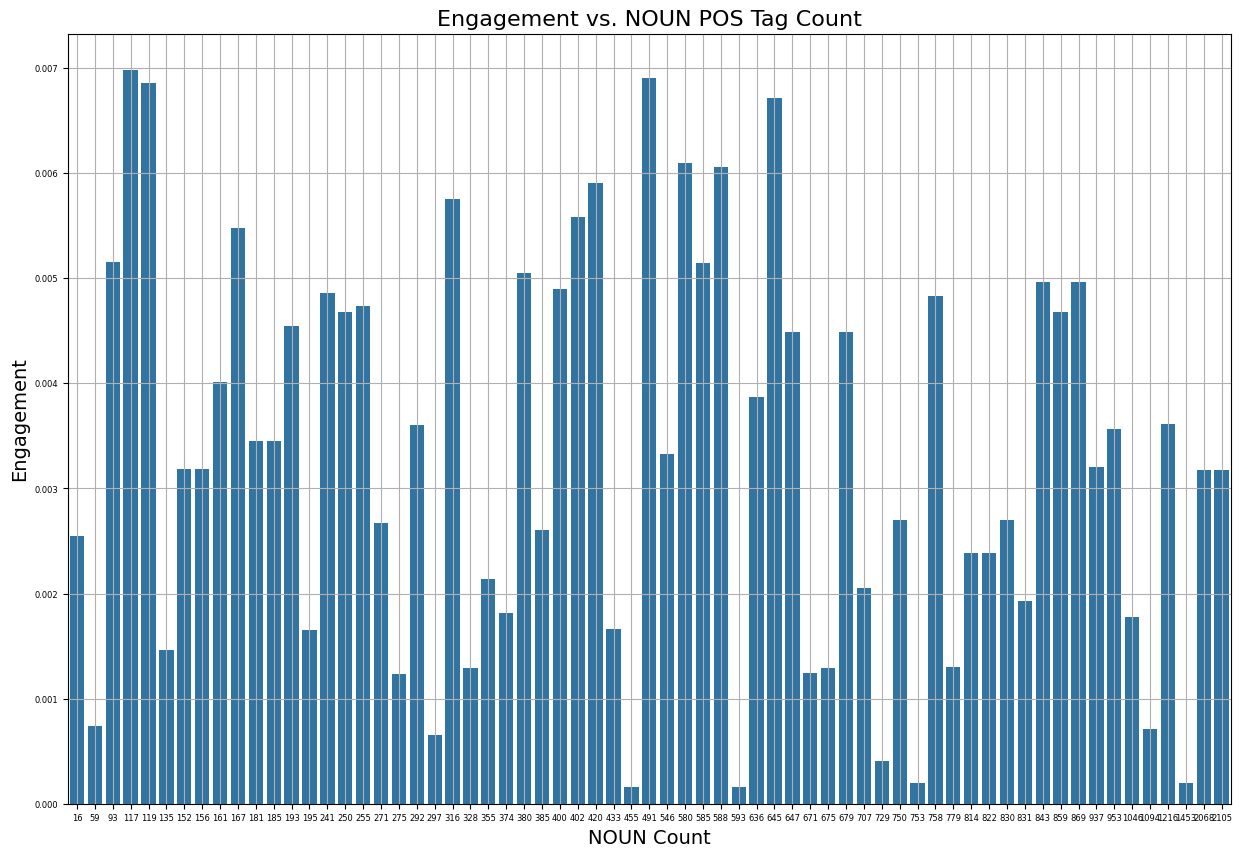

Max Value of current pos tag: 189, Associated engagement: 5    0.003177
Name: engagement, dtype: float64


/var/folders/lp/thjl93cn1lg4b44b6kmtggvh0000gn/T/ipykernel_3503/2292812008.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=tag, y='engagement', data=engagement_adv_df, ci=None)


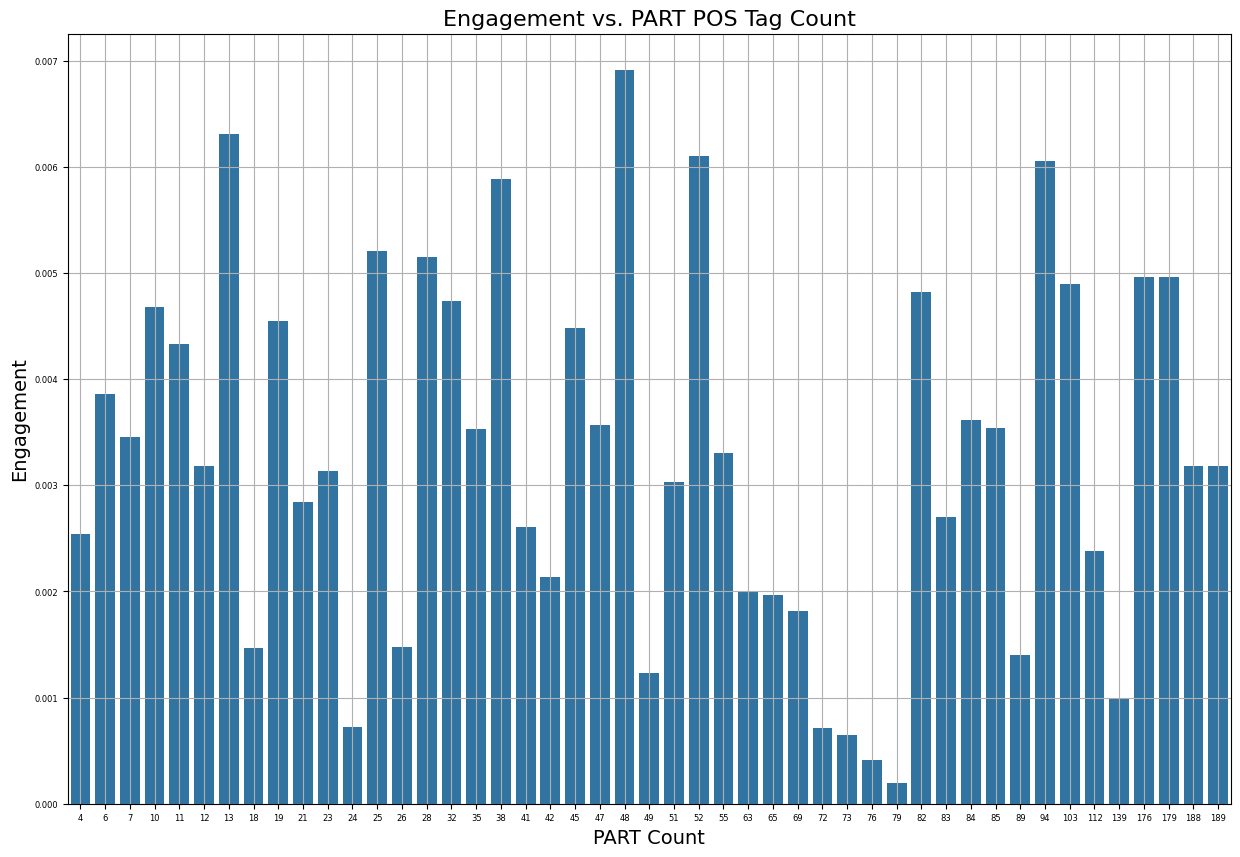

Max Value of current pos tag: 2126, Associated engagement: 49    0.002385
Name: engagement, dtype: float64


/var/folders/lp/thjl93cn1lg4b44b6kmtggvh0000gn/T/ipykernel_3503/2292812008.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=tag, y='engagement', data=engagement_adv_df, ci=None)


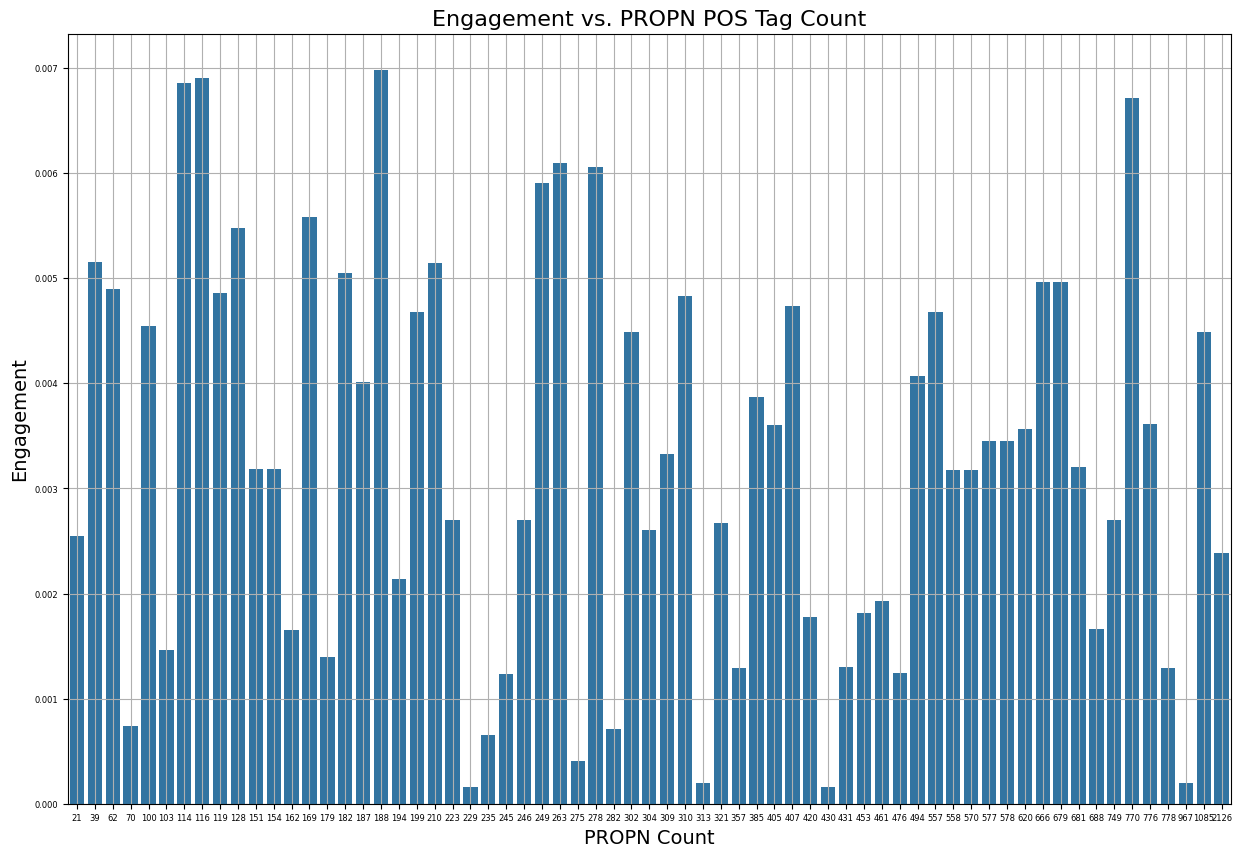

Max Value of current pos tag: 39, Associated engagement: 51    0.00496
63    0.00496
Name: engagement, dtype: float64


/var/folders/lp/thjl93cn1lg4b44b6kmtggvh0000gn/T/ipykernel_3503/2292812008.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=tag, y='engagement', data=engagement_adv_df, ci=None)


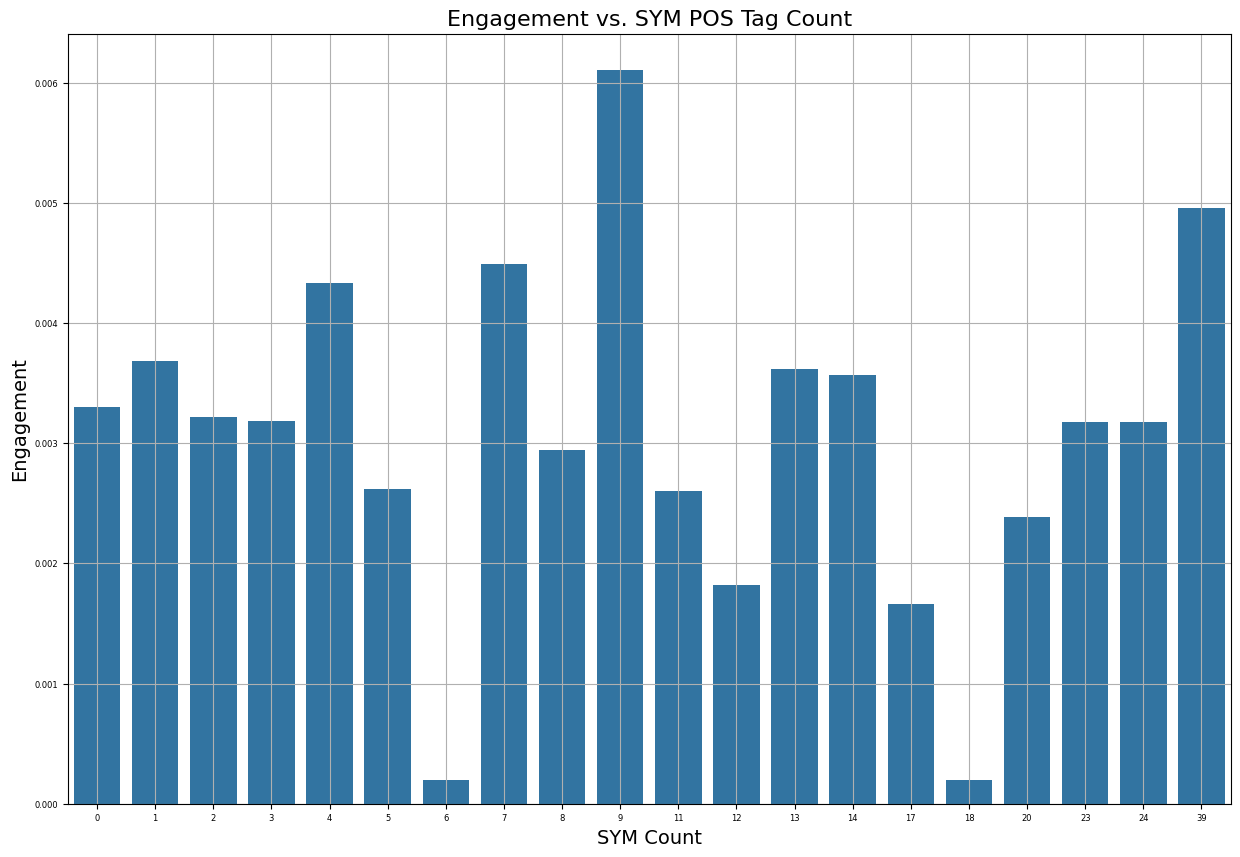

Max Value of current pos tag: 50, Associated engagement: 21    0.003618
39    0.001399
Name: engagement, dtype: float64


/var/folders/lp/thjl93cn1lg4b44b6kmtggvh0000gn/T/ipykernel_3503/2292812008.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=tag, y='engagement', data=engagement_adv_df, ci=None)


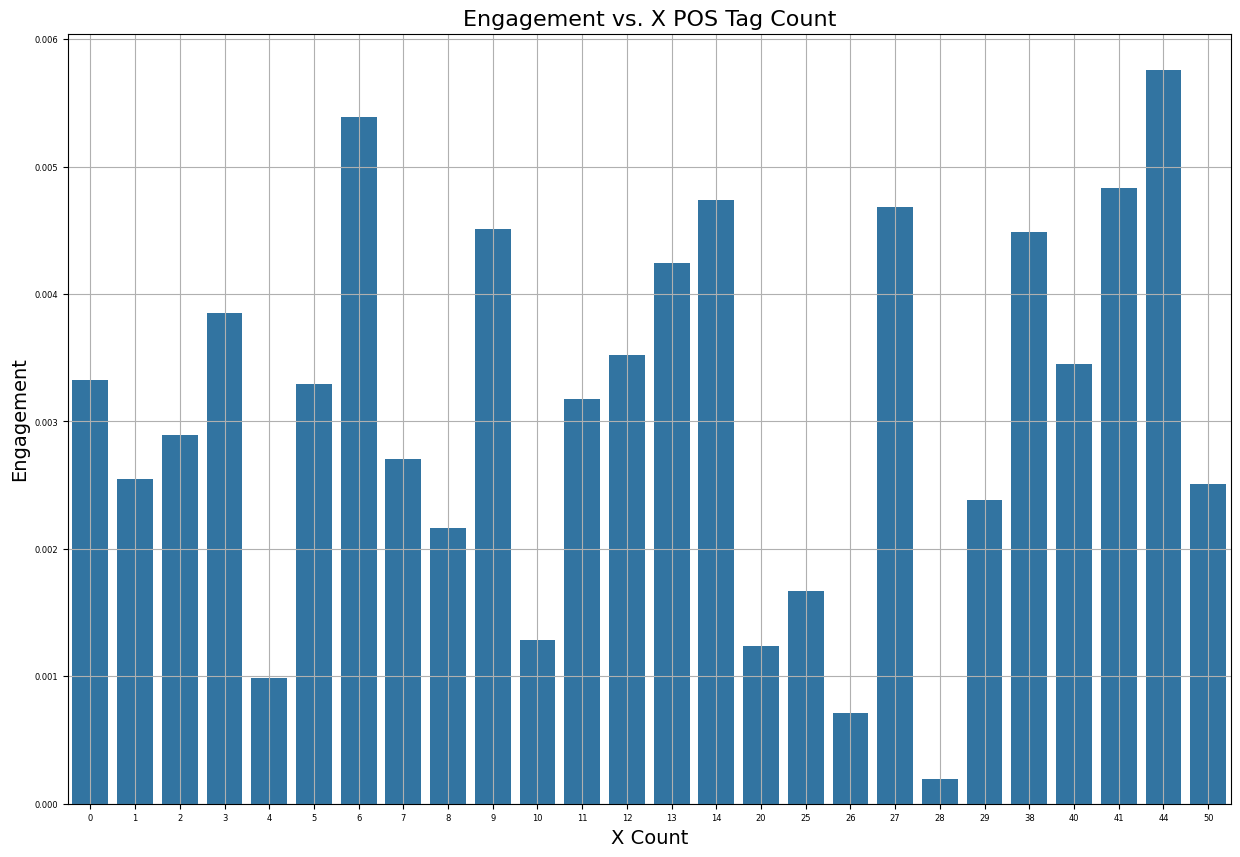

Max Value of current pos tag: 875, Associated engagement: 48    0.003177
Name: engagement, dtype: float64


/var/folders/lp/thjl93cn1lg4b44b6kmtggvh0000gn/T/ipykernel_3503/2292812008.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=tag, y='engagement', data=engagement_adv_df, ci=None)


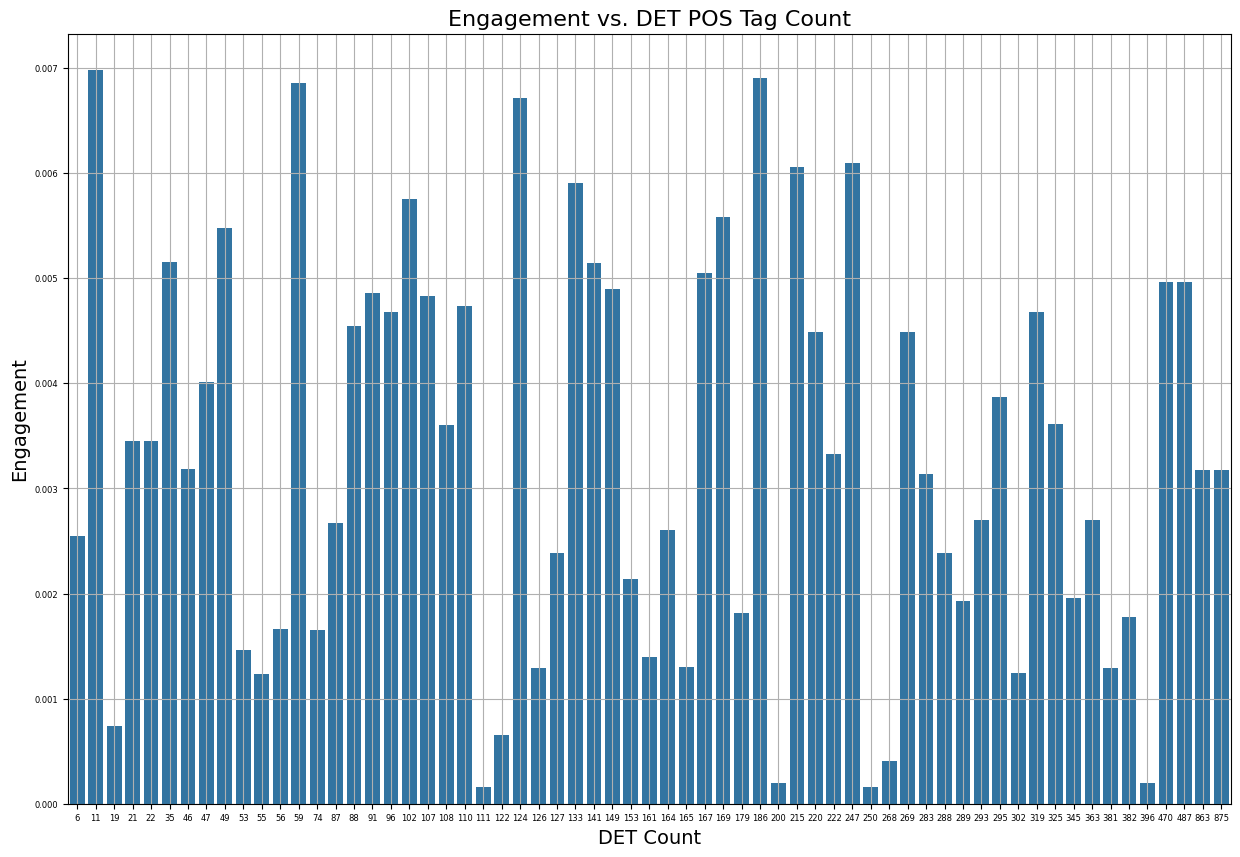

Max Value of current pos tag: 158, Associated engagement: 5    0.003177
Name: engagement, dtype: float64


/var/folders/lp/thjl93cn1lg4b44b6kmtggvh0000gn/T/ipykernel_3503/2292812008.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=tag, y='engagement', data=engagement_adv_df, ci=None)


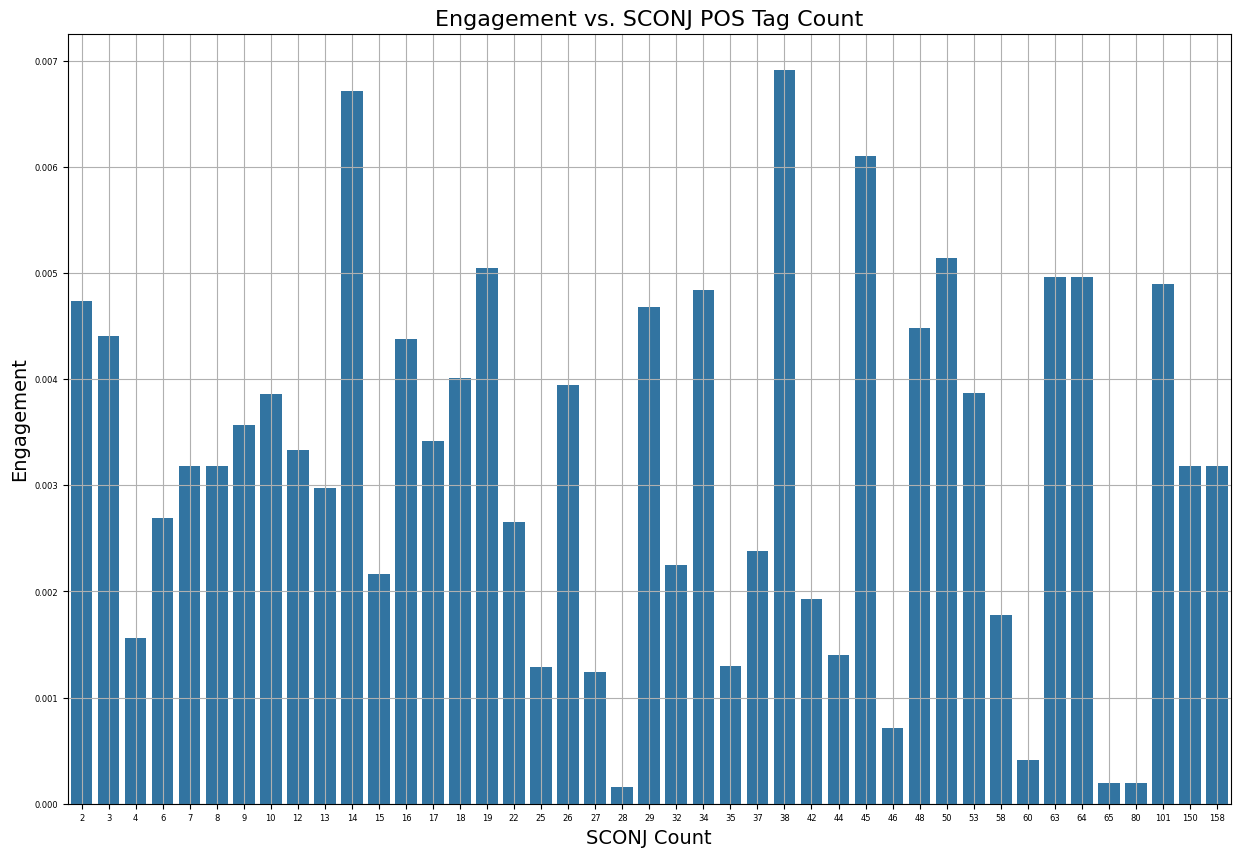

Max Value of current pos tag: 1075, Associated engagement: 48    0.003177
Name: engagement, dtype: float64


/var/folders/lp/thjl93cn1lg4b44b6kmtggvh0000gn/T/ipykernel_3503/2292812008.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=tag, y='engagement', data=engagement_adv_df, ci=None)


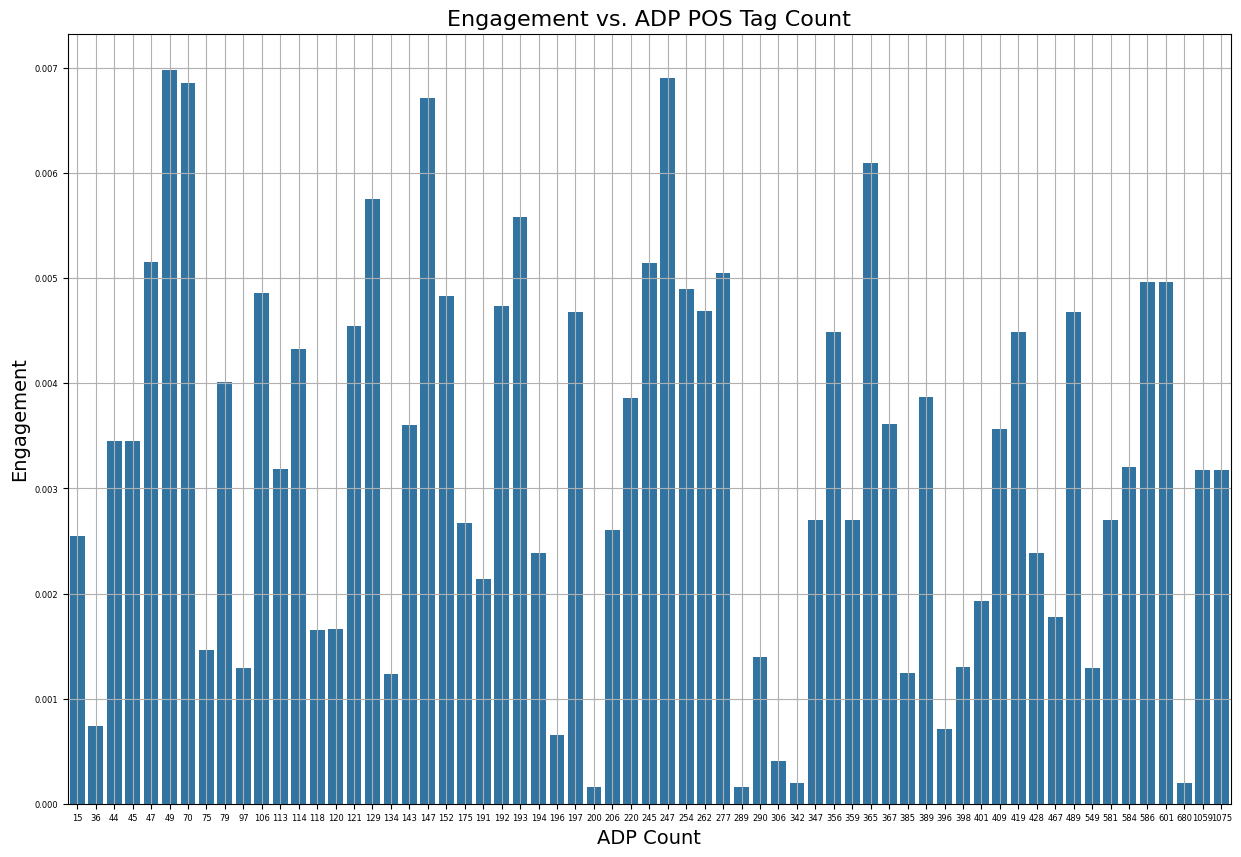

Max Value of current pos tag: 408, Associated engagement: 5    0.003177
Name: engagement, dtype: float64


/var/folders/lp/thjl93cn1lg4b44b6kmtggvh0000gn/T/ipykernel_3503/2292812008.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=tag, y='engagement', data=engagement_adv_df, ci=None)


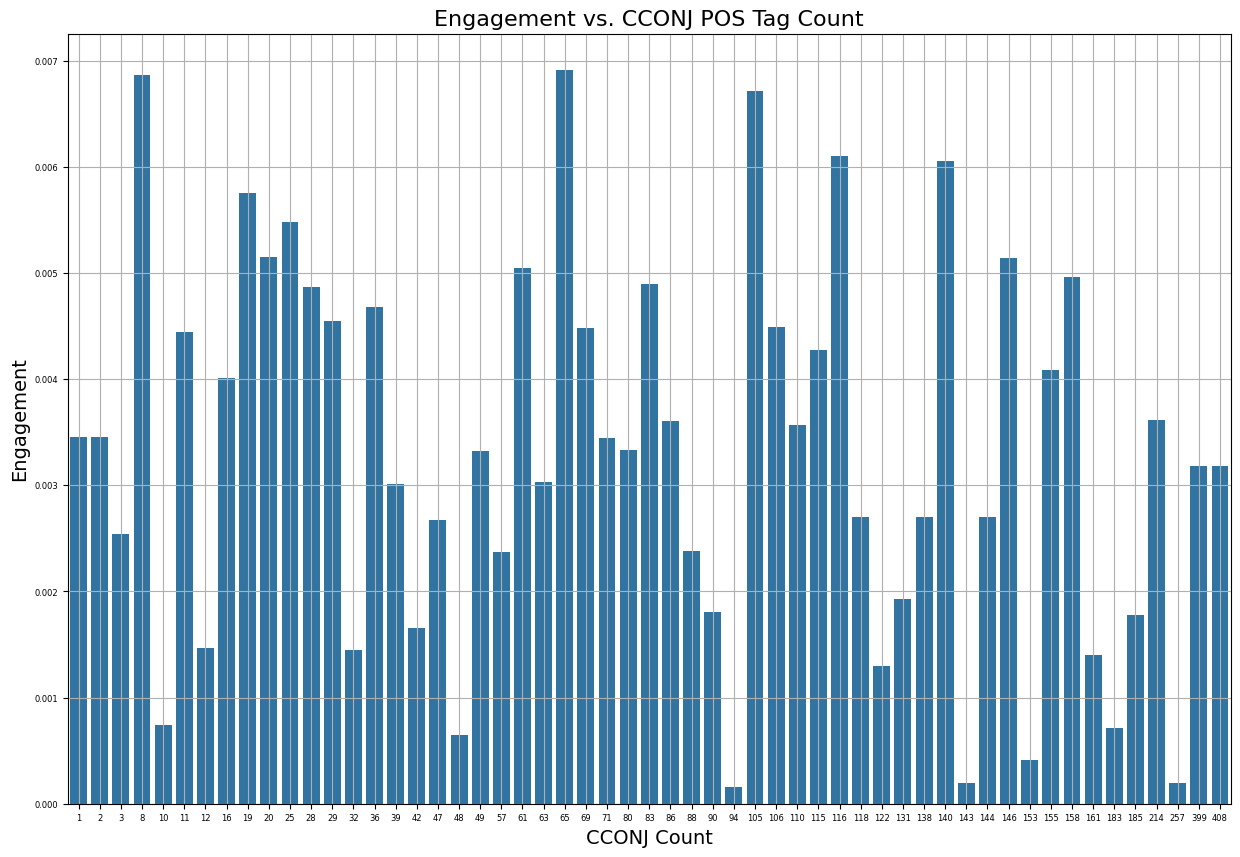

Max Value of current pos tag: 382, Associated engagement: 5    0.003177
Name: engagement, dtype: float64


/var/folders/lp/thjl93cn1lg4b44b6kmtggvh0000gn/T/ipykernel_3503/2292812008.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=tag, y='engagement', data=engagement_adv_df, ci=None)


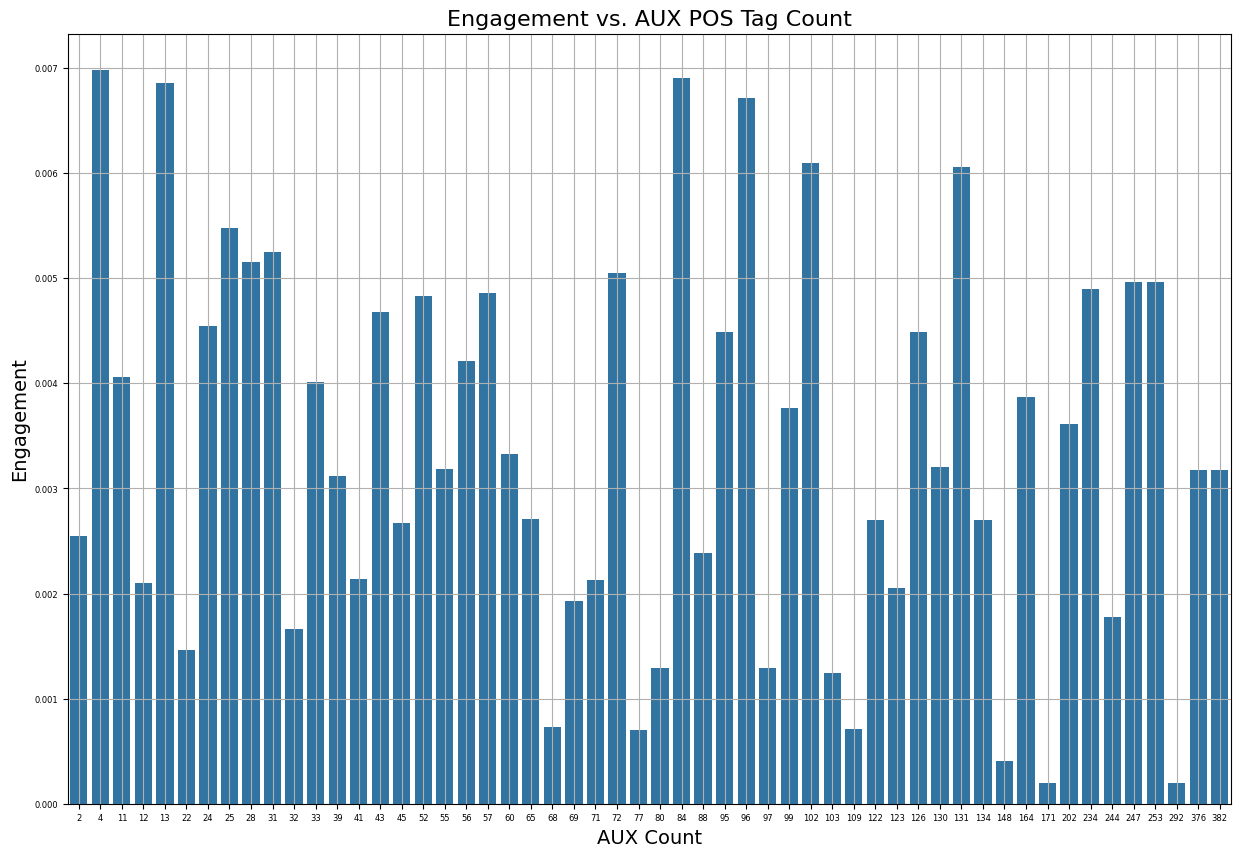

Max Value of current pos tag: 16, Associated engagement: 3    0.000198
Name: engagement, dtype: float64


/var/folders/lp/thjl93cn1lg4b44b6kmtggvh0000gn/T/ipykernel_3503/2292812008.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=tag, y='engagement', data=engagement_adv_df, ci=None)


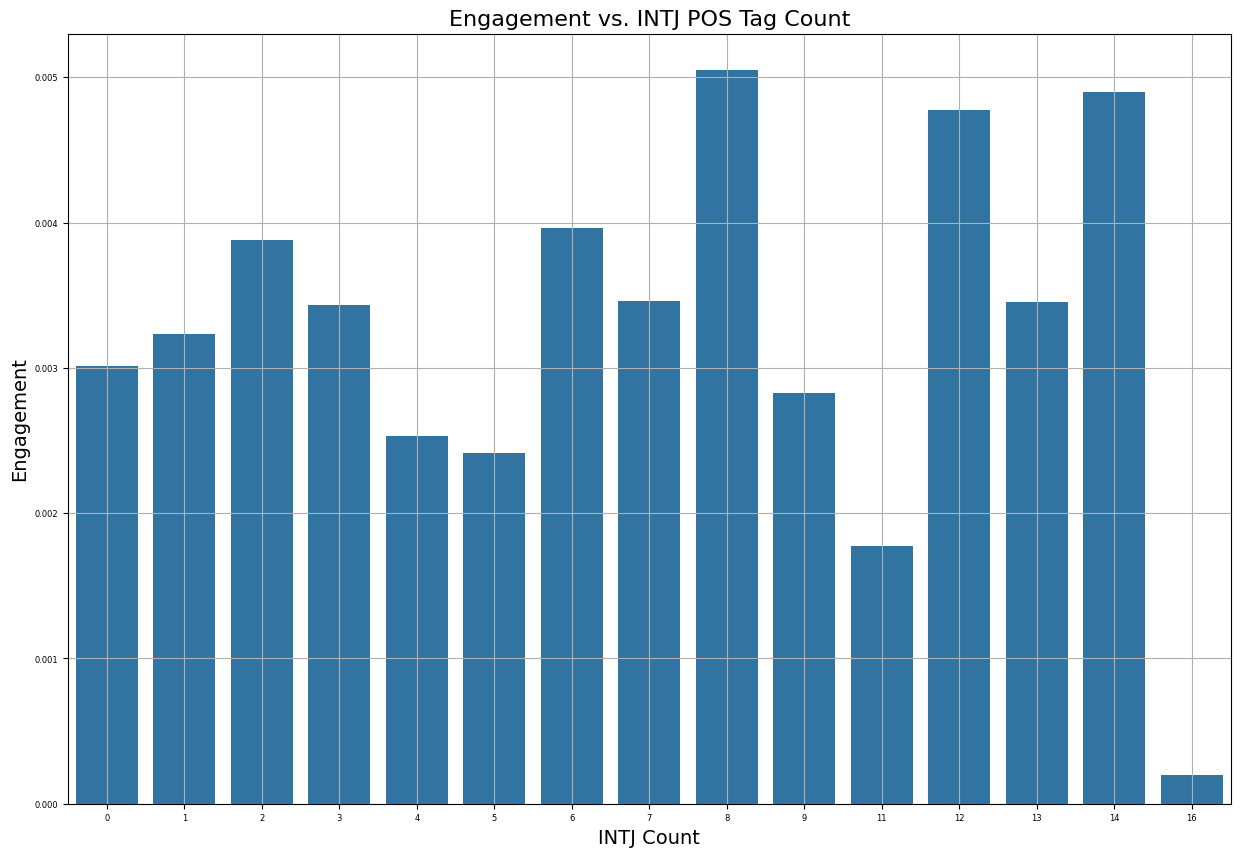

In [137]:
for tag in pos_tags:
    plotPosTags(bev_lower_engagement_df, tag)

Max Value of current pos tag: 442, Associated engagement: 55    0.087465
Name: engagement, dtype: float64


/var/folders/lp/thjl93cn1lg4b44b6kmtggvh0000gn/T/ipykernel_3503/2292812008.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=tag, y='engagement', data=engagement_adv_df, ci=None)


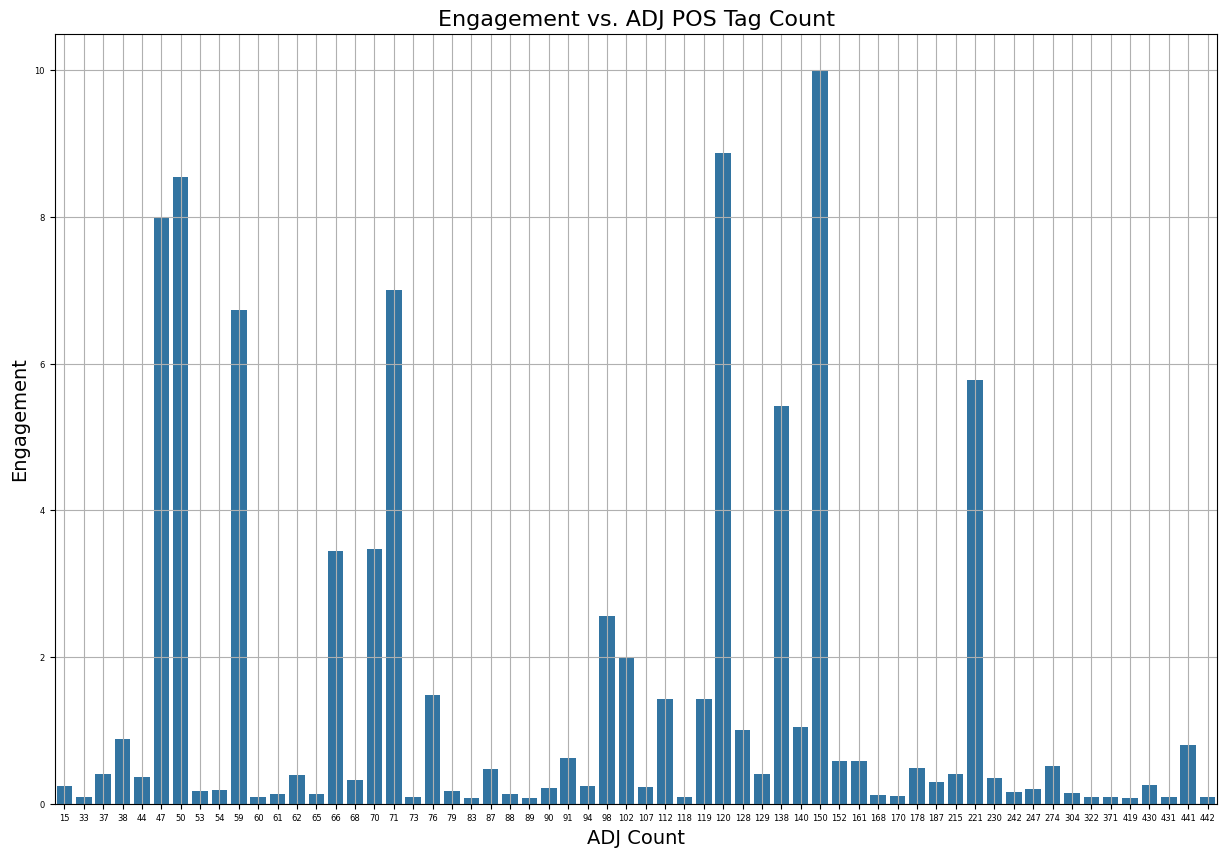

Max Value of current pos tag: 360, Associated engagement: 48    0.250078
Name: engagement, dtype: float64


/var/folders/lp/thjl93cn1lg4b44b6kmtggvh0000gn/T/ipykernel_3503/2292812008.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=tag, y='engagement', data=engagement_adv_df, ci=None)


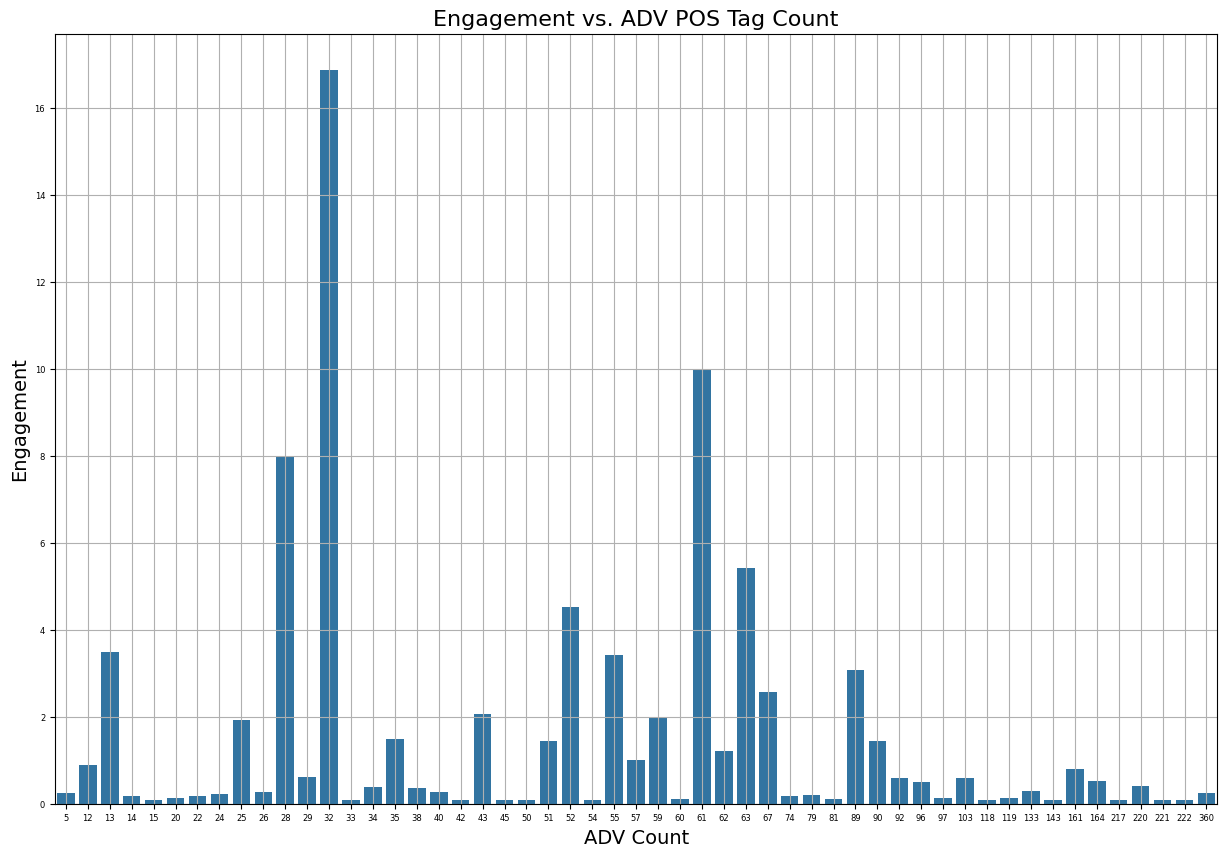

Max Value of current pos tag: 737, Associated engagement: 48    0.250078
Name: engagement, dtype: float64


/var/folders/lp/thjl93cn1lg4b44b6kmtggvh0000gn/T/ipykernel_3503/2292812008.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=tag, y='engagement', data=engagement_adv_df, ci=None)


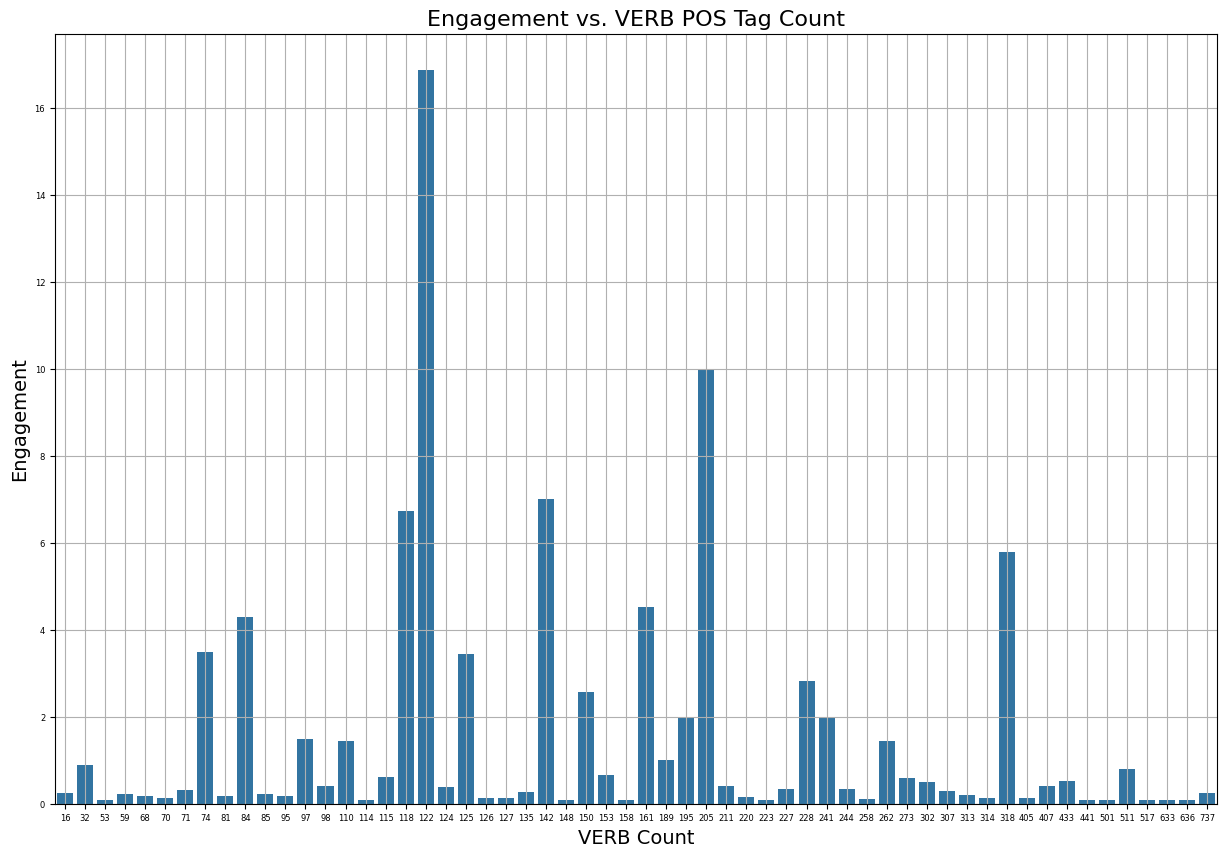

Max Value of current pos tag: 682, Associated engagement: 48    0.250078
Name: engagement, dtype: float64


/var/folders/lp/thjl93cn1lg4b44b6kmtggvh0000gn/T/ipykernel_3503/2292812008.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=tag, y='engagement', data=engagement_adv_df, ci=None)


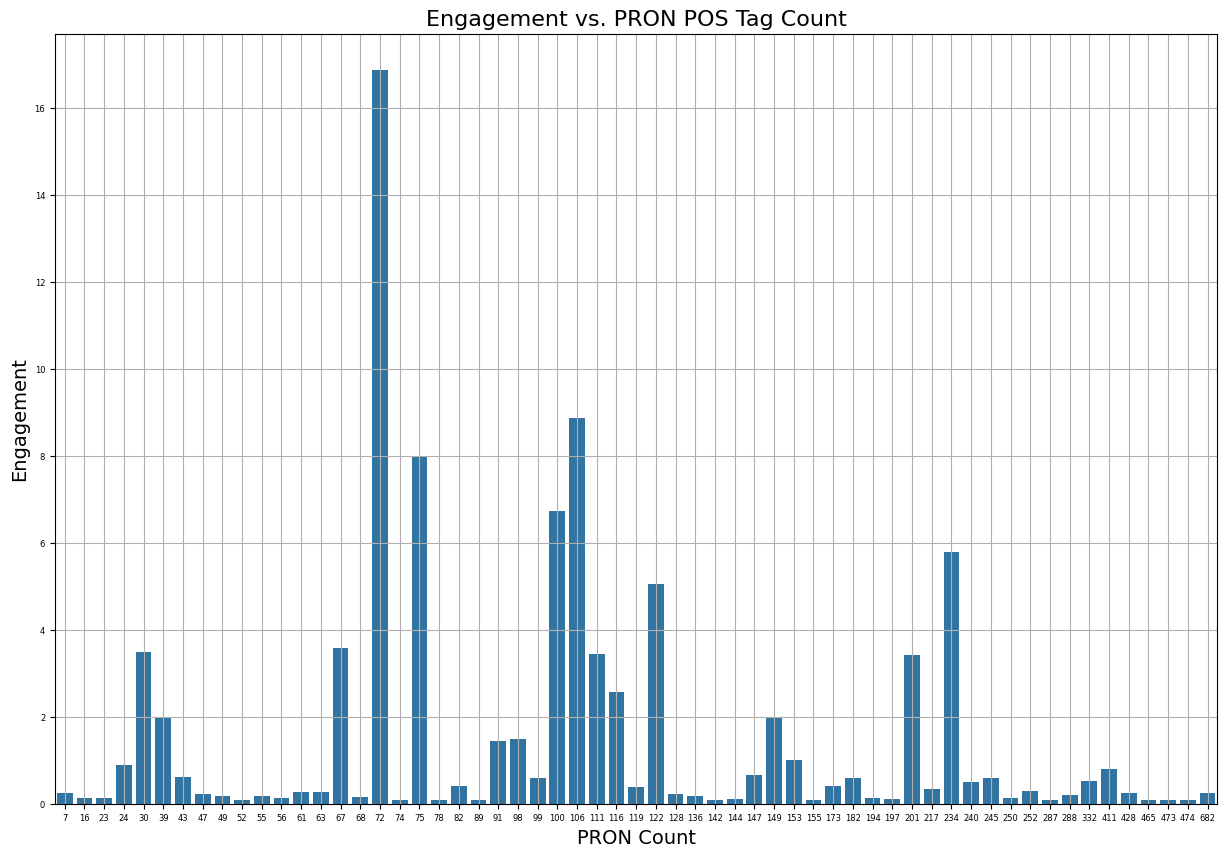

Max Value of current pos tag: 1103, Associated engagement: 7    1.434187
Name: engagement, dtype: float64


/var/folders/lp/thjl93cn1lg4b44b6kmtggvh0000gn/T/ipykernel_3503/2292812008.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=tag, y='engagement', data=engagement_adv_df, ci=None)


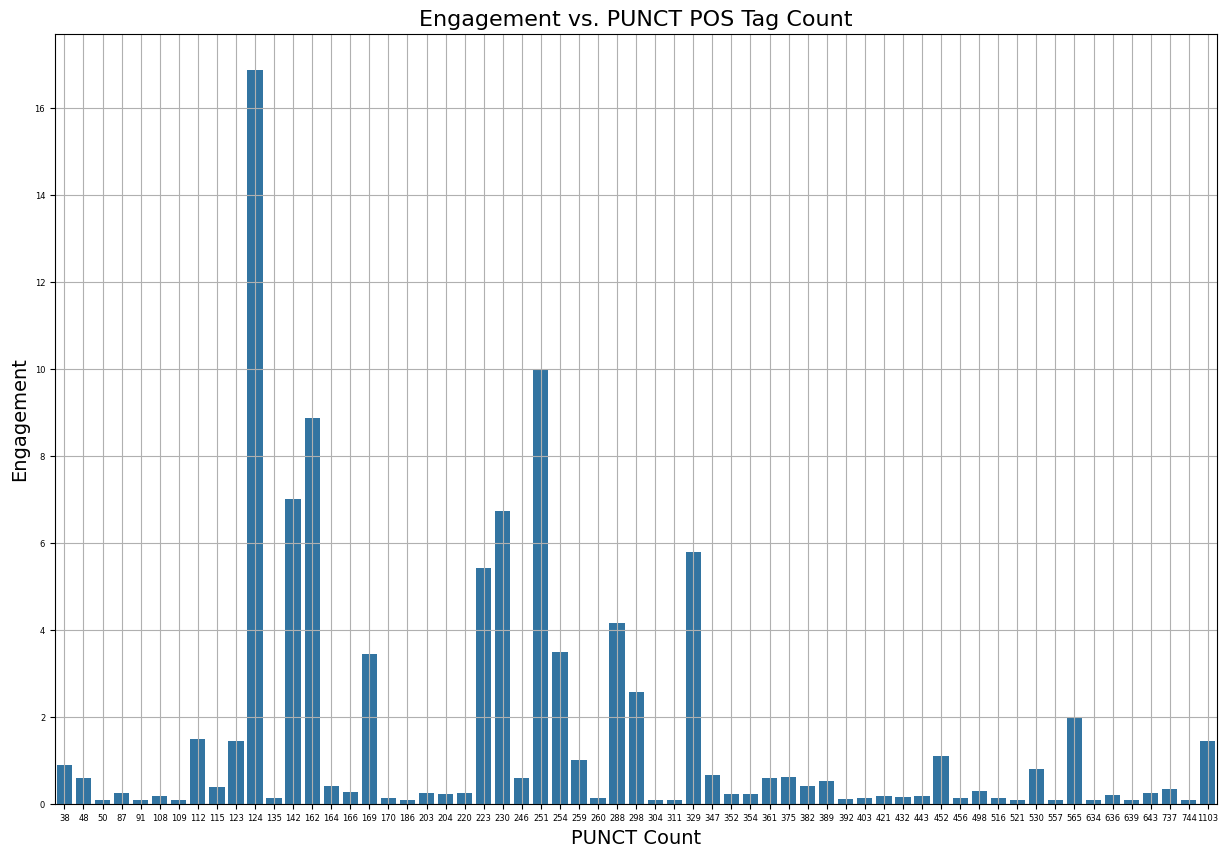

Max Value of current pos tag: 136, Associated engagement: 47    0.140898
Name: engagement, dtype: float64


/var/folders/lp/thjl93cn1lg4b44b6kmtggvh0000gn/T/ipykernel_3503/2292812008.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=tag, y='engagement', data=engagement_adv_df, ci=None)


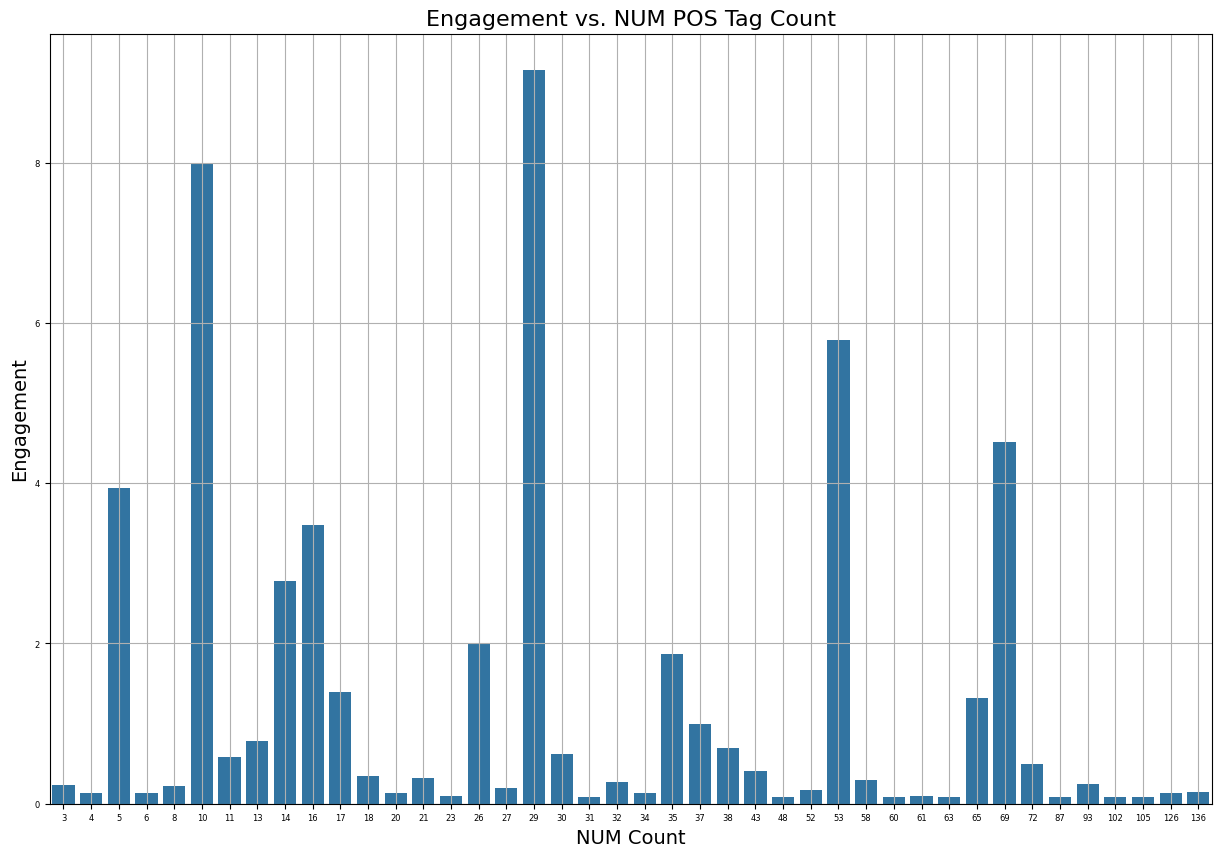

Max Value of current pos tag: 1107, Associated engagement: 61    0.795575
Name: engagement, dtype: float64


/var/folders/lp/thjl93cn1lg4b44b6kmtggvh0000gn/T/ipykernel_3503/2292812008.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=tag, y='engagement', data=engagement_adv_df, ci=None)


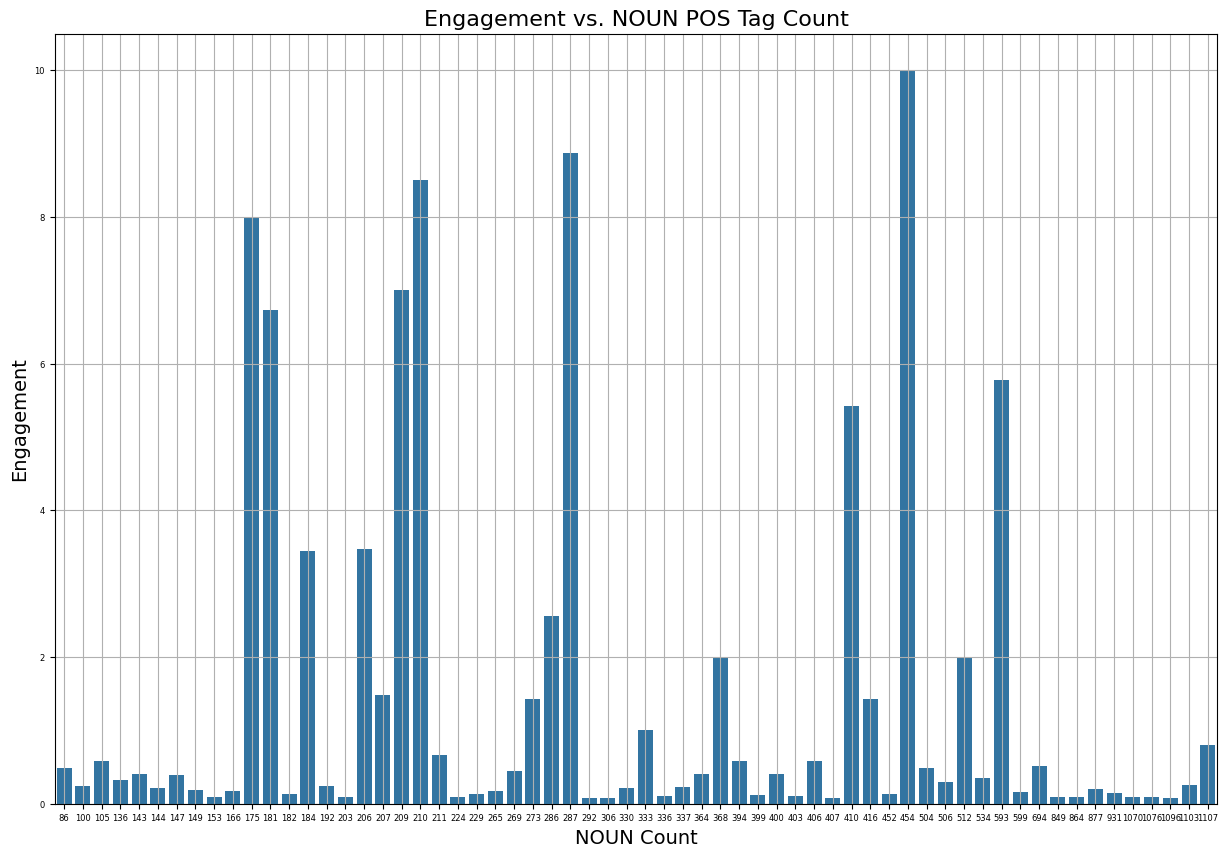

Max Value of current pos tag: 163, Associated engagement: 48    0.250078
Name: engagement, dtype: float64


/var/folders/lp/thjl93cn1lg4b44b6kmtggvh0000gn/T/ipykernel_3503/2292812008.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=tag, y='engagement', data=engagement_adv_df, ci=None)


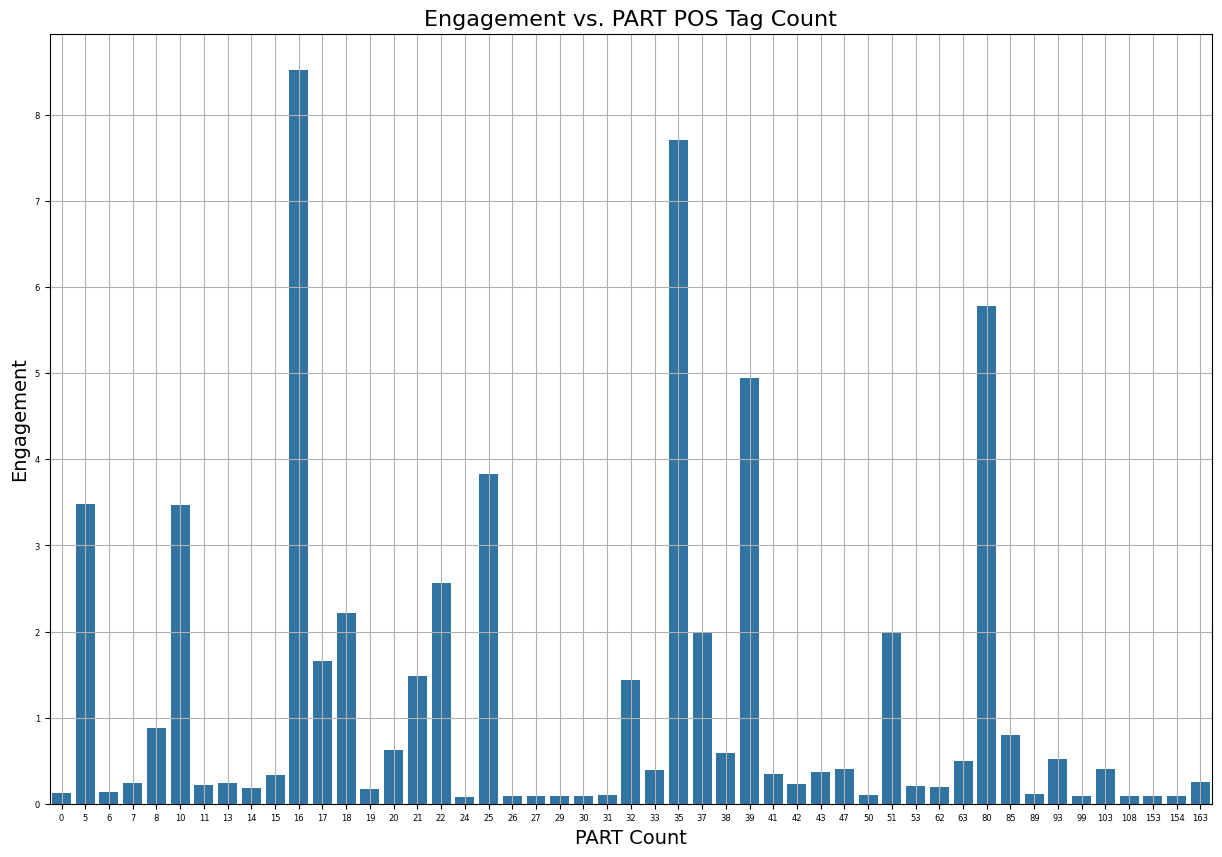

Max Value of current pos tag: 1995, Associated engagement: 20    0.129926
Name: engagement, dtype: float64


/var/folders/lp/thjl93cn1lg4b44b6kmtggvh0000gn/T/ipykernel_3503/2292812008.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=tag, y='engagement', data=engagement_adv_df, ci=None)


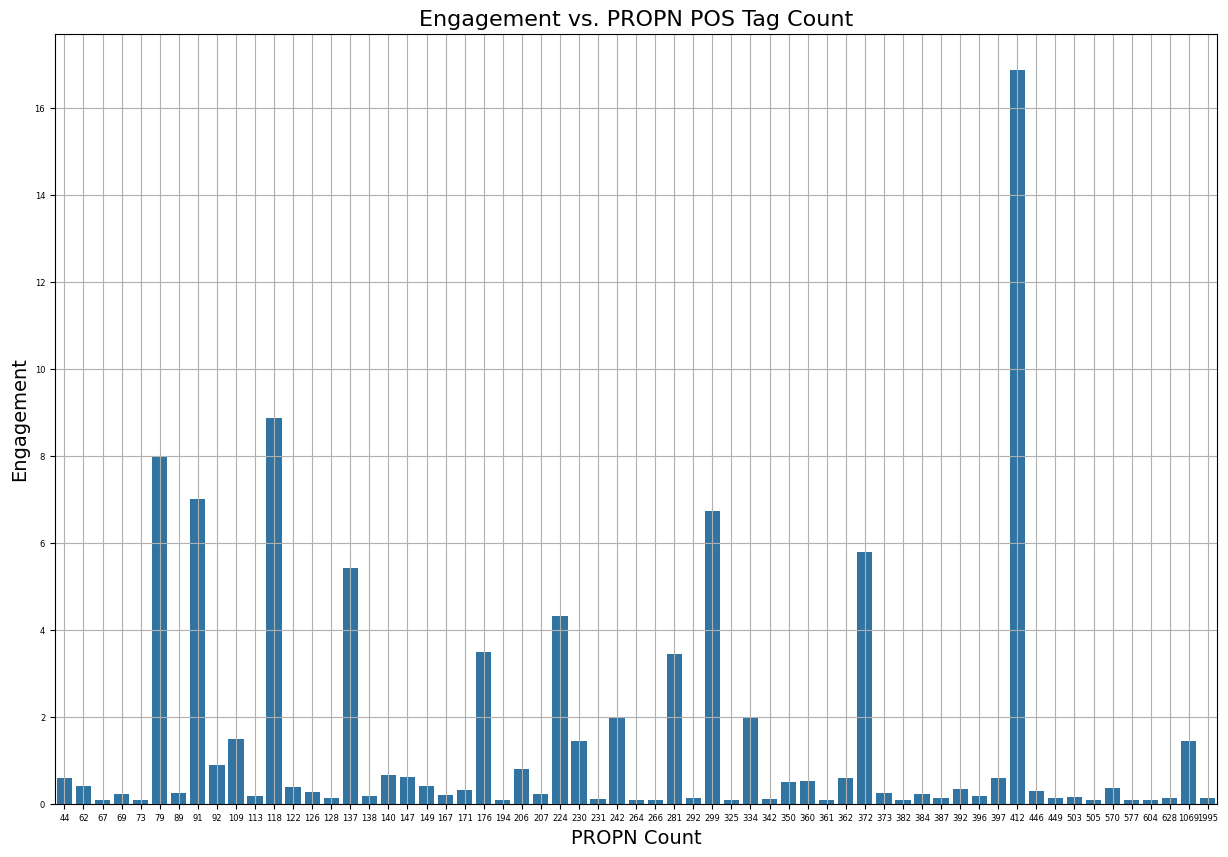

Max Value of current pos tag: 34, Associated engagement: 11    0.086141
Name: engagement, dtype: float64


/var/folders/lp/thjl93cn1lg4b44b6kmtggvh0000gn/T/ipykernel_3503/2292812008.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=tag, y='engagement', data=engagement_adv_df, ci=None)


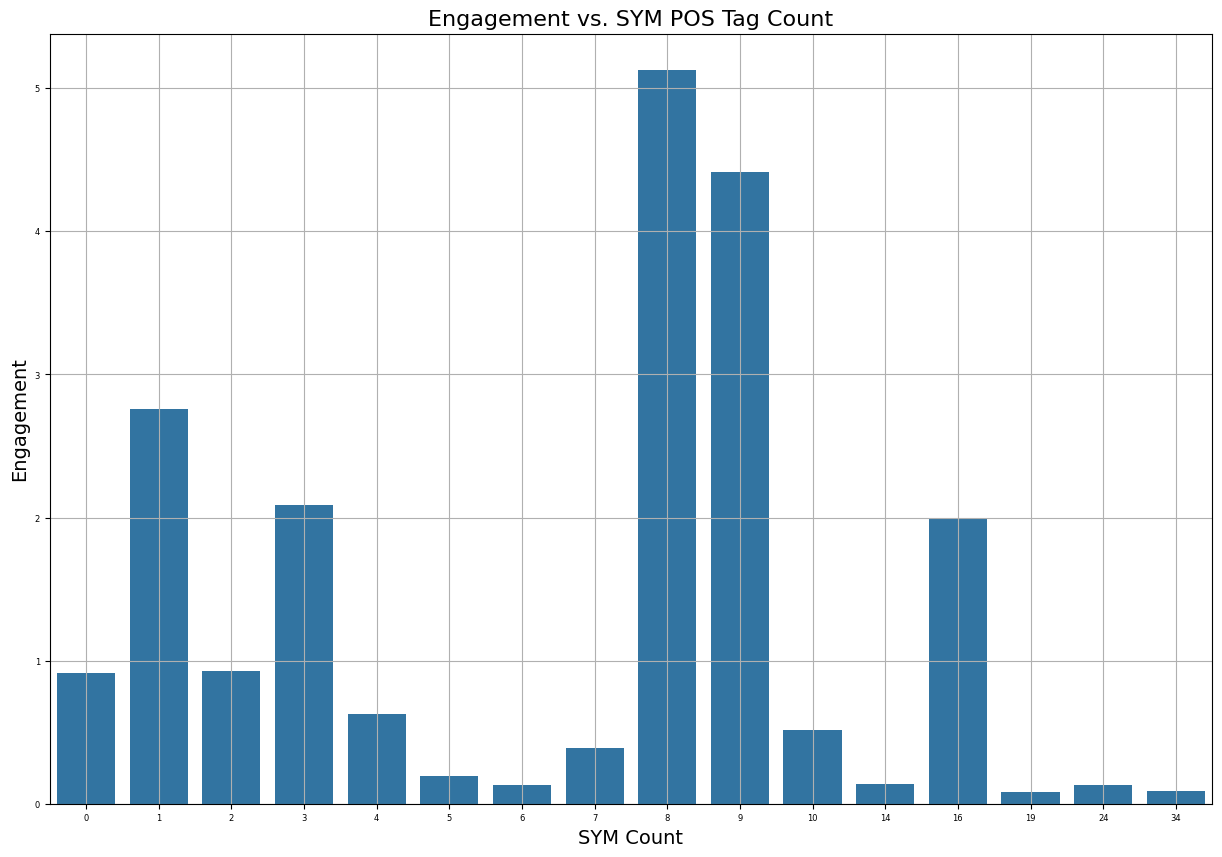

Max Value of current pos tag: 156, Associated engagement: 20    0.129926
Name: engagement, dtype: float64


/var/folders/lp/thjl93cn1lg4b44b6kmtggvh0000gn/T/ipykernel_3503/2292812008.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=tag, y='engagement', data=engagement_adv_df, ci=None)


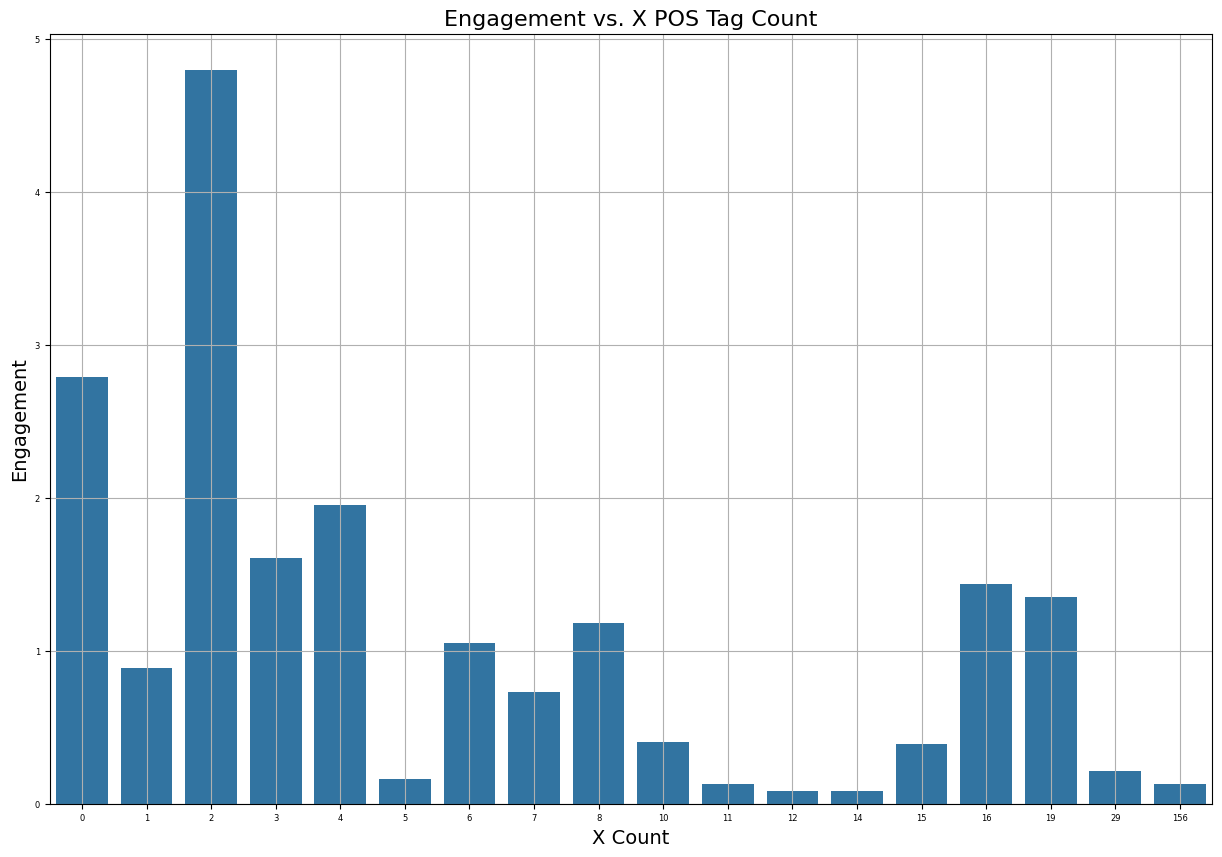

Max Value of current pos tag: 588, Associated engagement: 61    0.795575
Name: engagement, dtype: float64


/var/folders/lp/thjl93cn1lg4b44b6kmtggvh0000gn/T/ipykernel_3503/2292812008.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=tag, y='engagement', data=engagement_adv_df, ci=None)


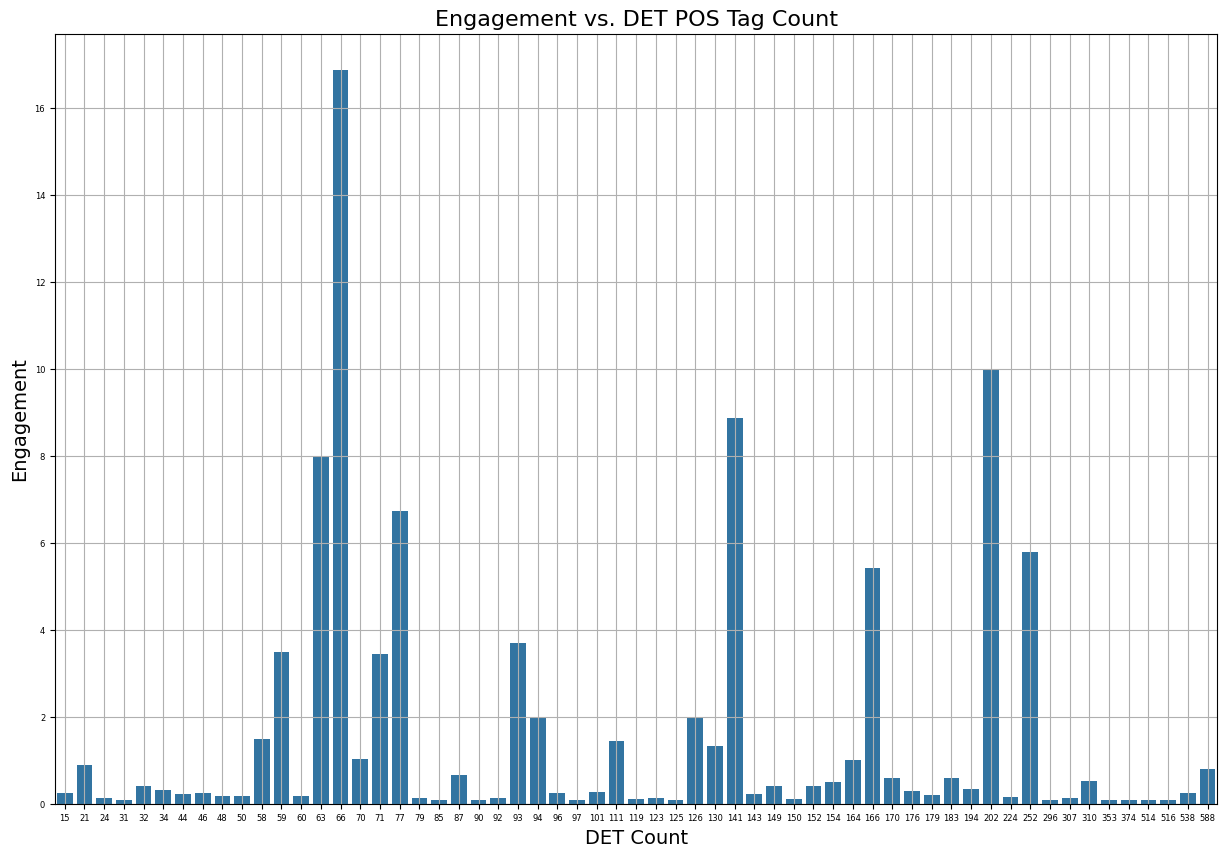

Max Value of current pos tag: 101, Associated engagement: 45    0.398976
Name: engagement, dtype: float64


/var/folders/lp/thjl93cn1lg4b44b6kmtggvh0000gn/T/ipykernel_3503/2292812008.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=tag, y='engagement', data=engagement_adv_df, ci=None)


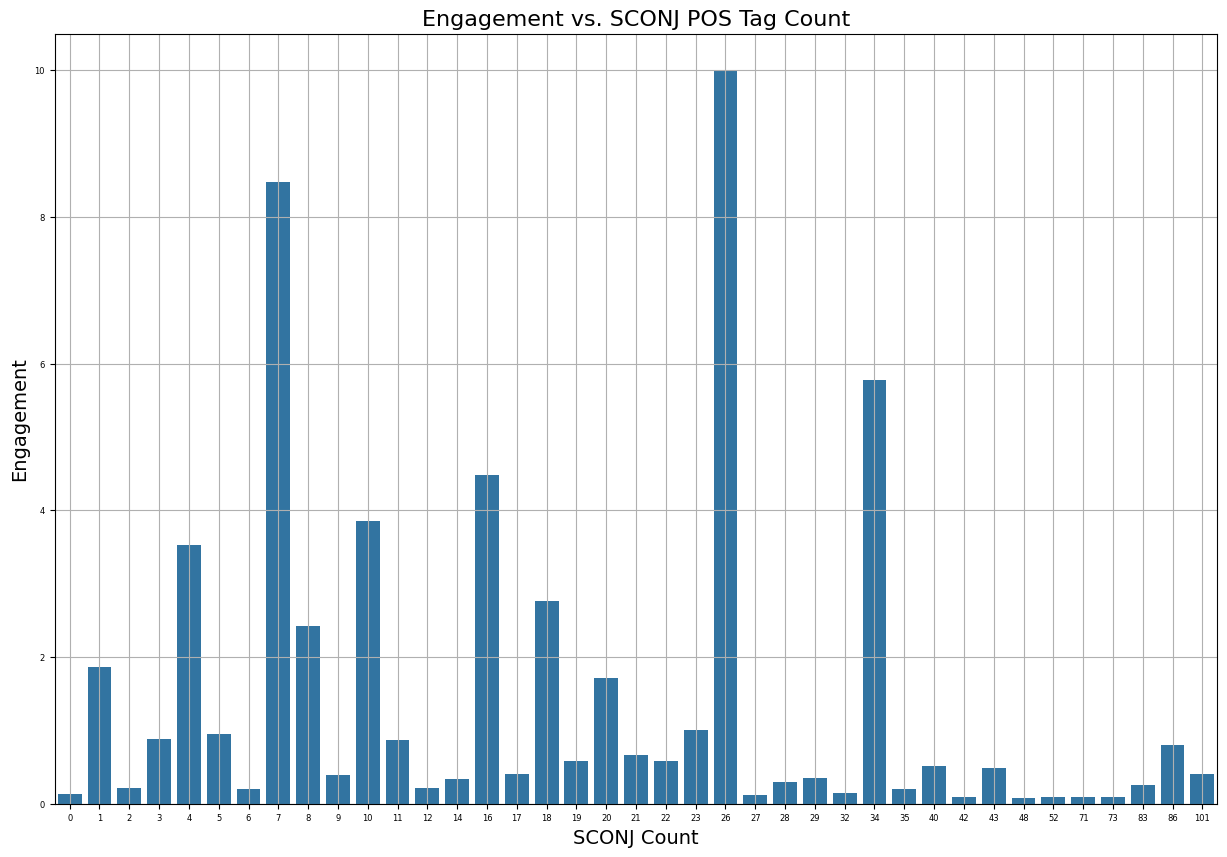

Max Value of current pos tag: 705, Associated engagement: 48    0.250078
Name: engagement, dtype: float64


/var/folders/lp/thjl93cn1lg4b44b6kmtggvh0000gn/T/ipykernel_3503/2292812008.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=tag, y='engagement', data=engagement_adv_df, ci=None)


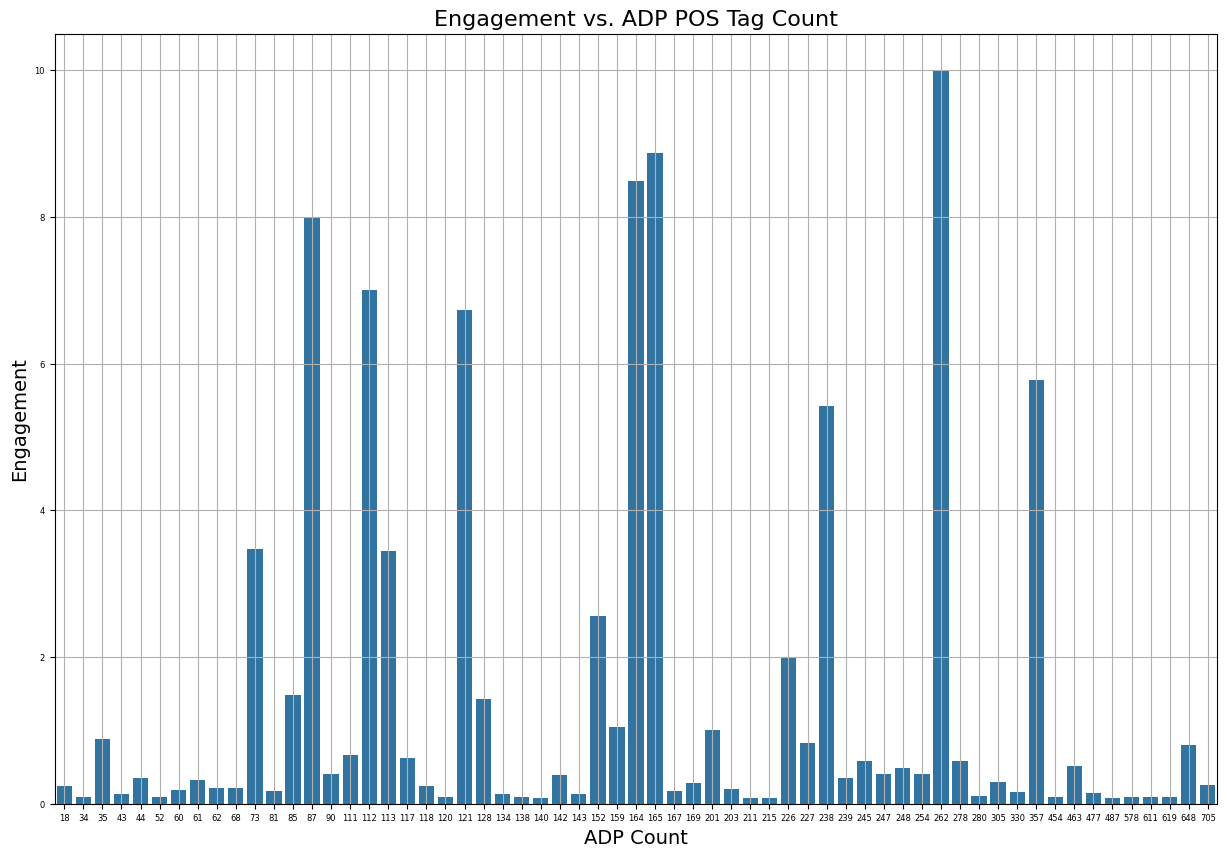

Max Value of current pos tag: 223, Associated engagement: 48    0.250078
Name: engagement, dtype: float64


/var/folders/lp/thjl93cn1lg4b44b6kmtggvh0000gn/T/ipykernel_3503/2292812008.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=tag, y='engagement', data=engagement_adv_df, ci=None)


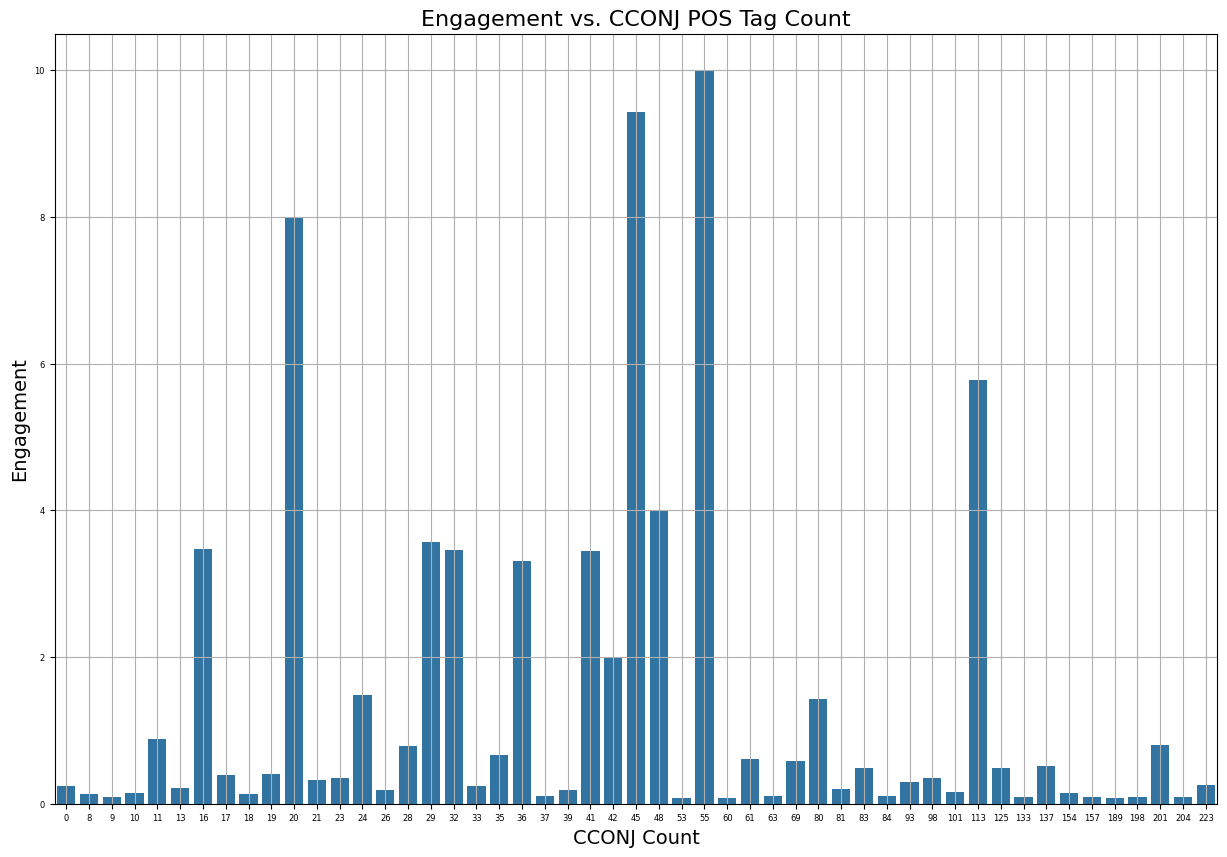

Max Value of current pos tag: 286, Associated engagement: 48    0.250078
Name: engagement, dtype: float64


/var/folders/lp/thjl93cn1lg4b44b6kmtggvh0000gn/T/ipykernel_3503/2292812008.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=tag, y='engagement', data=engagement_adv_df, ci=None)


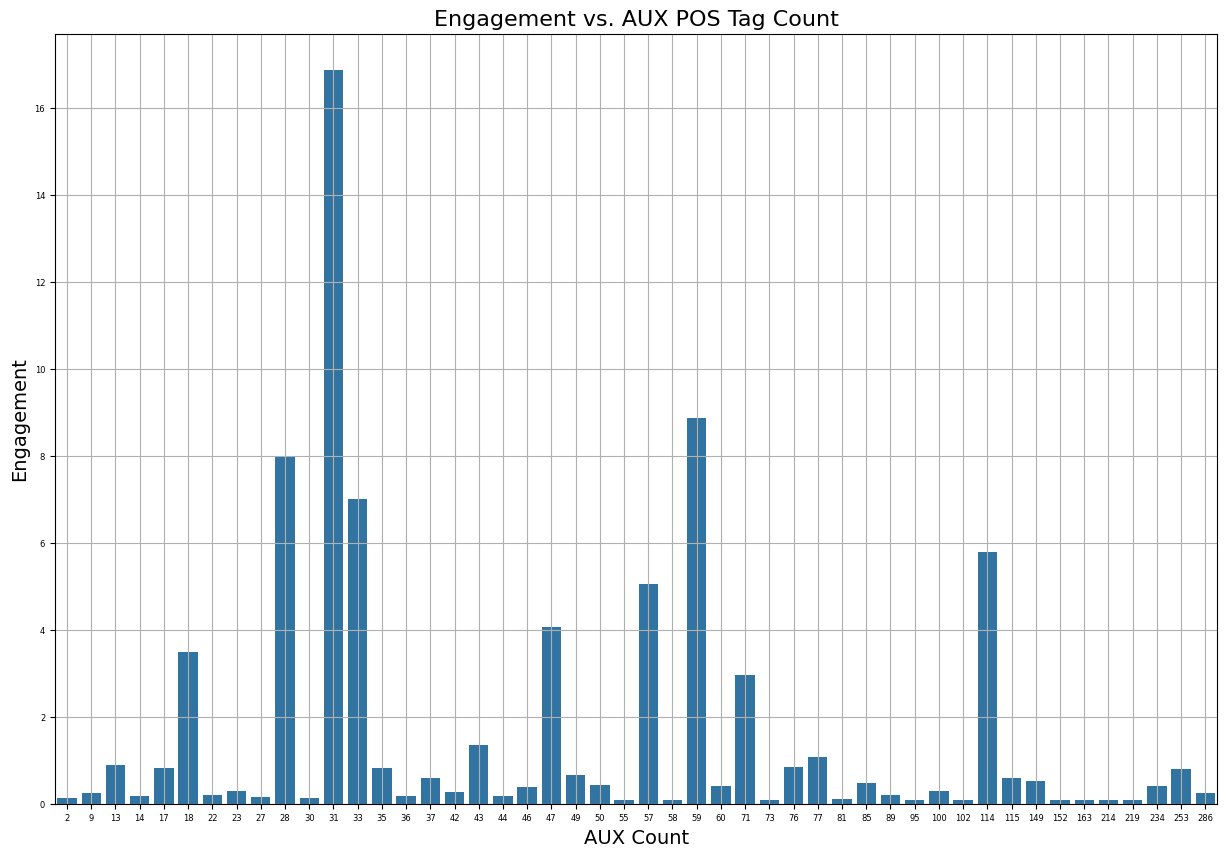

Max Value of current pos tag: 18, Associated engagement: 20    0.129926
Name: engagement, dtype: float64


/var/folders/lp/thjl93cn1lg4b44b6kmtggvh0000gn/T/ipykernel_3503/2292812008.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=tag, y='engagement', data=engagement_adv_df, ci=None)


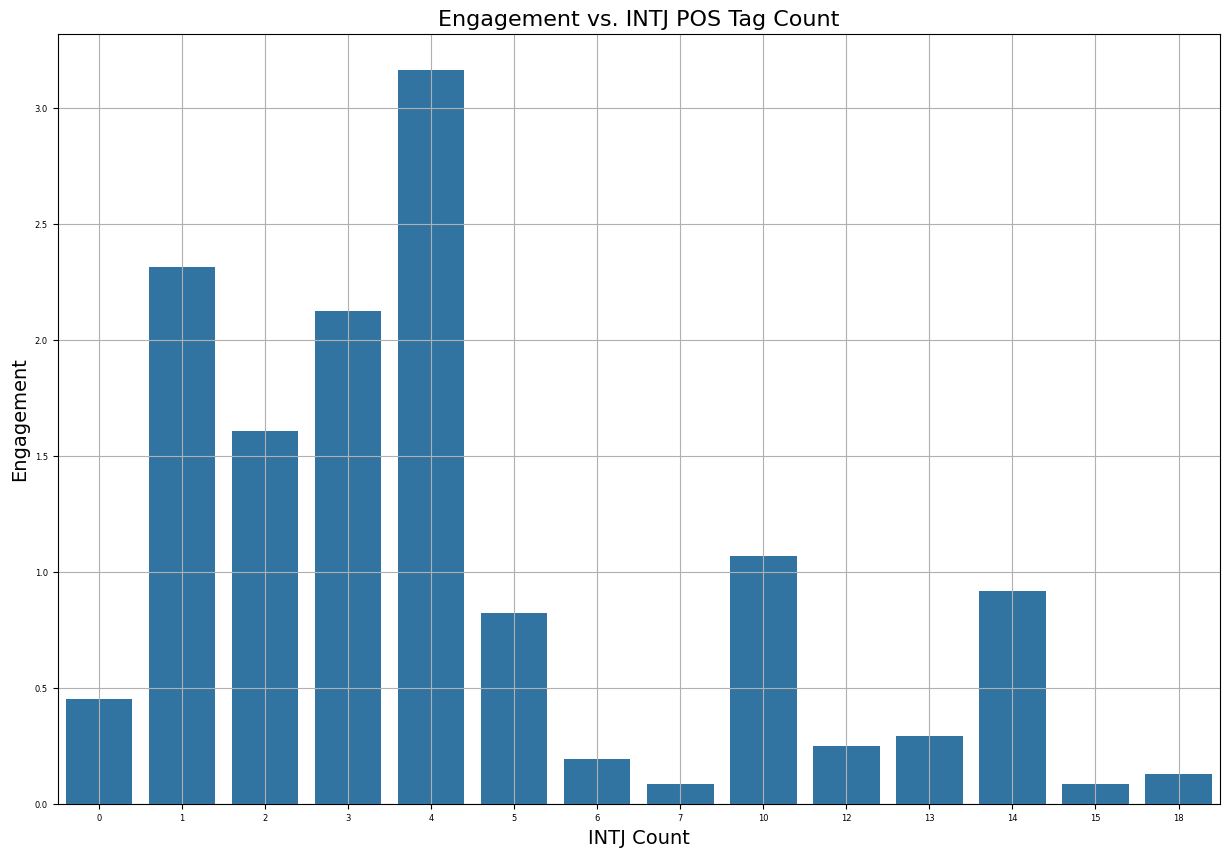

In [138]:
for tag in pos_tags:
    plotPosTags(bev_higher_engagement_df, tag)

In [ ]:
# import ast
# import seaborn as sns

# def plotNamedEntityTags(df, tag):
#     curr = []

#     for index, row in df.iterrows():
#         pos_tags = row['Top 50 Captions Pos Tags']
#         pos_tags_dict = ast.literal_eval(pos_tags)
#         d = {
#             tag: pos_tags_dict.get(tag, 0),
#             'engagement': row['engagement']
#         }
#         curr.append(d)

#     engagement_adv_df = pd.DataFrame(curr)
#     maxtag = engagement_adv_df[tag].max()
#     maxtagEngagement = engagement_adv_df[engagement_adv_df[tag] == maxtag]['engagement']
#     print(f"Max Value of current pos tag: {maxtag}, Associated engagement: {maxtagEngagement}")

#     # Increase the size of the plot
#     plt.figure(figsize=(15, 10))
#     sns.barplot(x=tag, y='engagement', data=engagement_adv_df, ci=None)
#     plt.xlabel(f'{tag} Count', fontsize=14)
#     plt.ylabel('Engagement', fontsize=14)
#     plt.title(f'Engagement vs. {tag} POS Tag Count', fontsize=16)
#     plt.xticks(fontsize=6)
#     plt.yticks(fontsize=6)
#     plt.grid(True)
#     plt.show()

### **OLD Code**

In [16]:
caption_folder_path = '/Users/viru/Documents/MP_I/data/captions_folders'

final_data = []


for category, brands in influencer_list.items():
    print(f"Category: {category}")
    curr_category_path = os.path.join(caption_folder_path, category)

    for brand, influencers in brands.items():
        print(f"Brand: {brand}")
        curr_brand_path = os.path.join(curr_category_path, brand)

        for influencer in influencers:

            if influencer != '.DS_Store':
                cur_influencer_path = os.path.join(curr_brand_path, influencer.split('.xlsx')[0]+'_captions.xlsx')

                df = pd.read_excel(cur_influencer_path)
                captions = df['caption'].iloc[:50]
                captions.fillna('', inplace=True)

                influencer_name = influencer.split('.xlsx')[0]
                
                read_ease_score = calculate_readability_scores(captions)
                lexical_diversity_score = calculate_lexical_diversity(captions)
                sentiment_score = calculate_sentiment(captions)
                overall_score = get_overall_captions_quality(captions)
                
                curr_row = {
                    'category': category,
                    'brand': brand,
                    'influencer': influencer_name,
                    'read_ease_score': read_ease_score,
                    'lexical_diversity_score': lexical_diversity_score,
                    'sentiment_score': sentiment_score,
                    'overall_caption_score': overall_score
                }

                final_data.append(curr_row)

Category: automobile
Brand: skodaindia
Brand: marutisuzukiofficial
Brand: harleydavidson_india
Brand: renaultindia
Brand: tvsmotorcompany
Brand: ashokleyland_official
Brand: mercedesbenzind
Brand: volkswagen_india
Brand: atherenergy
Brand: hondacarindia
Brand: indiatriumph
Brand: toyotaindia
Brand: jeepindia
Brand: mgmotorin
Brand: volvocarsin
Brand: tatamotorsgroup
Brand: audiin
Brand: nissan_india
Brand: hyundaiindia
Brand: yamahamotorindia
Brand: olaelectric
Category: beverages
Brand: greaterthangin
Brand: tropicanaindia
Brand: cocacola
Brand: kingfisherultra
Brand: amrutmalt
Brand: redbullindia
Brand: pepsiindia
Brand: sosyoworld
Brand: keventers
Brand: sula_vineyards
Brand: chaayos
Brand: dunkinindia
Brand: bluetokaicoffee
Brand: jimmyscocktails
Brand: bira91beer
Brand: svamidrinks
Brand: pauljohnwhisky
Brand: hapusagin
Brand: oldmonkkarnataka
Brand: rampursinglemalt
Brand: mountaundewin


In [17]:
final_data

[{'category': 'automobile',
  'brand': 'skodaindia',
  'influencer': 'madhura__balaji',
  'read_ease_score': 0.682062,
  'lexical_diversity_score': 0.9235473510684719,
  'sentiment_score': 0.5535885719439291,
  'overall_caption_score': 0.7159655769037202},
 {'category': 'automobile',
  'brand': 'skodaindia',
  'influencer': 'globalncap',
  'read_ease_score': 0.5738360000000001,
  'lexical_diversity_score': 0.8248606380856909,
  'sentiment_score': 0.5938808336971152,
  'overall_caption_score': 0.6551568415348419},
 {'category': 'automobile',
  'brand': 'skodaindia',
  'influencer': 'prithwi',
  'read_ease_score': 0.8165779999999999,
  'lexical_diversity_score': 0.9482432533701567,
  'sentiment_score': 0.5584157377344877,
  'overall_caption_score': 0.7786288973313933},
 {'category': 'automobile',
  'brand': 'skodaindia',
  'influencer': 'arppithaandaa',
  'read_ease_score': 0.7831720000000001,
  'lexical_diversity_score': 0.8814079004557513,
  'sentiment_score': 0.590708295969903,
  'ove

In [18]:
final_df = pd.DataFrame(data=final_data)
final_df.head()

category       brand       influencer  read_ease_score  \
0  automobile  skodaindia  madhura__balaji         0.682062   
1  automobile  skodaindia       globalncap         0.573836   
2  automobile  skodaindia          prithwi         0.816578   
3  automobile  skodaindia    arppithaandaa         0.783172   
4  automobile  skodaindia    rachit.hirani         0.836972   

   lexical_diversity_score  sentiment_score  overall_caption_score  
0                 0.923547         0.553589               0.715966  
1                 0.824861         0.593881               0.655157  
2                 0.948243         0.558416               0.778629  
3                 0.881408         0.590708               0.754904  
4                 0.890474         0.634428               0.792259

In [20]:
final_df['sentiment_score'].max()

0.9730000000000001

In [21]:
final_df.to_excel('/Users/viru/Documents/MP_I/data/caption_quality_scores_df1.xlsx')

In [23]:
from urllib.parse import urljoin
import requests
import pandas as pd
import json
import os
import numpy as np

influencer_list = None

with open('/Users/viru/Documents/MP_I/data/category-brand-influencer-list.json', '+r') as json_file:
    influencer_list = json.load(json_file)

image_folders_path = '/Users/viru/Documents/MP_I/data/image_url_folders'

def download_image(url, folder_path, index):
    try:
        # Add the query parameter to the URL
        new_url = urljoin(url, 'media/?size=l')
        
        response = requests.get(new_url, stream=True)
        if response.status_code == 200:
            # Create a unique file name for each image
            file_name = f"image_{index}.jpg"
            file_path = os.path.join(folder_path, file_name)
            
            with open(file_path, 'wb') as file:
                for chunk in response.iter_content(1024):
                    file.write(chunk)
            print(f"Downloaded: {file_path}")
        else:
            print(f"Failed to download: {new_url}")
    except Exception as e:
        print(f"Error downloading {new_url}: {e}")


new_base_images_folder_path = '/Users/viru/Documents/MP_I/data/images'

for category, brands in influencer_list.items():
    print(f"Category: {category}")
    curr_category_path = os.path.join(image_folders_path, category)


    for brand, influencers in brands.items():
        print(f"Brand: {brand}")
        curr_brand_path = os.path.join(curr_category_path, brand)
        if brand not in ['indiatriumph', 'toyotaindia', 'volkswagen_india', 'mercedesbenzind', 'harleydavidson_india', 'marutisuzukiofficial', 'renaultindia', 'skodaindia', 'tvsmotorcompany', 'ashokleyland_official', 'atherenergy', 'hondacarindia']:
            for influencer in influencers:
                if influencer != ".DS_Store":
                    print(f"Influencer: {influencer}")
                    
                    cur_influencer_path = os.path.join(curr_brand_path, influencer.split('.xlsx')[0] + '_url.xlsx')
                    df = pd.read_excel(cur_influencer_path)
                    img_urls = list(df['image_urls'])
                    img_urls = [url for url in img_urls if not pd.isna(url)]

                    new_category_path = os.path.join(new_base_images_folder_path, category)
                    new_brand_path = os.path.join(new_category_path, brand)
                    new_influencer_folder_path = os.path.join(new_brand_path, influencer.split('.xlsx')[0])

                    os.makedirs(new_influencer_folder_path, exist_ok=True)

                    # Download all images
                    for index, url in enumerate(img_urls):
                        imgs = os.listdir(new_influencer_folder_path)
                        length = len(imgs)

                        if (length > 55):
                            break

                        download_image(url, new_influencer_folder_path, index)
    break

Category: automobile
Brand: skodaindia
Brand: marutisuzukiofficial
Brand: harleydavidson_india
Brand: renaultindia
Brand: tvsmotorcompany
Brand: ashokleyland_official
Brand: mercedesbenzind
Brand: volkswagen_india
Brand: atherenergy
Brand: hondacarindia
Brand: indiatriumph
Brand: toyotaindia
Brand: jeepindia
Brand: mgmotorin
Brand: volvocarsin
Brand: tatamotorsgroup
Brand: audiin
Brand: nissan_india
Brand: hyundaiindia
Brand: yamahamotorindia
Brand: olaelectric
